In [248]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
data_dir = '../data/'
#data_dir = 'Trading-Strategy-Project-main\Trading-Strategy-Project-main\data'
price_history_dir = f'{data_dir}price_history/'
sentiment_dir = f'{data_dir}sentiments/'
ti_dir = f'{data_dir}technical_indicators/'

### Load Ticker Pair list

In [250]:
import glob

tickers_list = [file.split('/')[-1].strip('.csv') for file in glob.glob(price_history_dir + '*.csv')]
tickers_list
pairs_df = pd.read_csv(data_dir + 'ranked_pairs_snp.csv')
pairs = pairs_df[['ticker_0', 'ticker_1']].values

unique_pairs= pairs_df[['ticker_0', 'ticker_1']].drop_duplicates('ticker_0', keep='first').drop_duplicates('ticker_1', keep='first')

In [251]:
data_dir

'../data/'

### Config Data From Files

In [252]:
ticker = 'AAPL'
'''
price_history = pd.read_csv( f'{ticker}.csv')
sentiment = pd.read_csv(f'{ticker}.csv')
ti = pd.read_csv(f'{ticker}.csv')
'''

data = {}
tickers_list = [path.replace('\\', '/') for path in tickers_list]


class TickerData:
    def __init__(self, ticker):
        self.ticker = ticker
        #self.history = pd.read_csv(price_history_dir + f'{ticker}.csv', index_col='Date', date_format='%Y-%m-%d')
        #self.sentiment = pd.read_csv(sentiment_dir + f'{ticker}.csv', index_col='Date', date_format='%Y-%m-%d')
        #self.ti = pd.read_csv(ti_dir + f'{ticker}.csv', index_col='Date', date_format='%Y-%m-%d')
        self.history = pd.read_csv(f'{ticker}.csv', index_col='Date')
        self.sentiment = pd.read_csv(f'{ticker}.csv', index_col='Date')
        self.ti = pd.read_csv(f'{ticker}.csv', index_col='Date')
    def __repr__(self):
        return repr(self.history['Adj Close'])

class DATA:
    pass
tickers_list = [path.replace('\\', '/') for path in tickers_list]
for ticker in tickers_list:
    setattr(DATA, ticker, TickerData(ticker))

    data[ticker] = TickerData(ticker)
    

In [253]:
tickers_list
tickers_list = [ticker.replace("price_history/", "") for ticker in tickers_list]


['price_history/AAPL',
 'price_history/AXP',
 'price_history/BAC',
 'price_history/BLK',
 'price_history/C',
 'price_history/CRM',
 'price_history/DE',
 'price_history/FDX',
 'price_history/GE',
 'price_history/GOOGL',
 'price_history/GS',
 'price_history/HON',
 'price_history/INTC',
 'price_history/JPM',
 'price_history/MS',
 'price_history/UNP',
 'price_history/WFC']

In [236]:
display(DATA.AAPL.history.head(2))
display(DATA.AAPL.sentiment.head(2))
display(DATA.AAPL.ti.head(2))


AttributeError: type object 'DATA' has no attribute 'AAPL'

In [237]:
def add_moving_averages(df, moving_averages, columns):
    df = df.copy()
    for ma in moving_averages:
        for col in columns:
            new_col = f'{col}_ma{ma}'
            df[new_col] = df[col].rolling(window=ma).mean()
    # ffill na
    df.fillna(method='ffill', inplace=True)
    return df


### Load and Merge Data for Pair
change PAIR_IDX to the pair you want to analyze

In [241]:
PAIR_IDX = 0

pair = pairs[PAIR_IDX]

print(pair)
data = {key.replace('price_history/', ''): value for key, value in data.items()}
ADD_SENTIMENT_MA = False

# Join Sentiment and add Sentiment Moving Averages if ADD_SENTIMENT_MA is True
pair_sentiment_df = pd.merge(
    data[pair[0]].sentiment,
    data[pair[1]].sentiment,
    left_index=True,
    right_index=True,
    suffixes=("_S1", "_S2"),
)
if ADD_SENTIMENT_MA:
    pair_sentiment_df = add_moving_averages(
        pair_sentiment_df, [5, 10, 20], columns=pair_sentiment_df.columns
    )

# Join Technical Indicators
pair_ti_df = pd.merge(
    data[pair[0]].ti,
    data[pair[1]].ti,
    left_index=True,
    right_index=True,
    suffixes=("_S1", "_S2"),
)

pair_df = pd.merge(
    pair_ti_df, pair_sentiment_df, left_index=True, right_index=True, how="left"
)

print(pair_df.shape, pair_df.shape[0] * pair_df.shape[1])
pair_df

['GS' 'BLK']
(815, 20) 16300


High_S1_x  Low_S1_x  Open_S1_x  Volume_S1_x  Adj Close_S1_x  \
Date                                                                      
2021-01-04   267.5800    260.16     267.00    3572043.0          265.00   
2021-01-05   273.5000    262.57     263.88    4207081.0          270.93   
2021-01-06   288.3800    273.10     276.29    6383530.0          285.55   
2021-01-07   295.8894    286.68     287.77    4009730.0          291.65   
2021-01-08   292.2800    285.06     292.00    2800784.0          290.08   
...               ...       ...        ...          ...             ...   
2024-03-25   410.4600    403.86     406.87    1683977.0          404.94   
2024-03-26   409.3300    404.52     406.09    1406974.0          406.18   
2024-03-27   415.4900    408.37     409.62    2353629.0          415.25   
2024-03-28   419.2000    414.98     416.21    2409718.0          417.69   
2024-04-01   417.9500    412.00     416.68    1863918.0          413.51   

            High_S2_x  Low_S2_x  Open_S2_x  Volume_S2_x  Adj Close_S2_x  \
Date                                                                      
2021-01-04   730.6000    702.04     730.60     623613.0          710.82   
2021-01-05   717.2100    705.26     708.81     431450.0          714.58   
2021-01-06   744.7900    716.10     718.76     730705.0          734.96   
2021-01-07   753.2700    743.01     748.34     655965.0          750.42   
2021-01-08   759.3664    747.42     757.15     623026.0          756.45   
...               ...       ...        ...          ...             ...   
2024-03-25   826.9900    815.17     820.44     378197.0          816.21   
2024-03-26   823.8763    817.93     819.47     374110.0          820.20   
2024-03-27   835.5100    822.49     826.80     466671.0          835.12   
2024-03-28   838.6800    831.02     836.22     532198.0          833.70   
2024-04-01   835.1200    825.24     834.98     395890.0          826.77   

            High_S1_y  Low_S1_y  Open_S1_y  Volume_S1_y  Adj Close_S1_y  \
Date                                                                      
2021-01-04   267.5800    260.16     267.00    3572043.0          265.00   
2021-01-05   273.5000    262.57     263.88    4207081.0          270.93   
2021-01-06   288.3800    273.10     276.29    6383530.0          285.55   
2021-01-07   295.8894    286.68     287.77    4009730.0          291.65   
2021-01-08   292.2800    285.06     292.00    2800784.0          290.08   
...               ...       ...        ...          ...             ...   
2024-03-25   410.4600    403.86     406.87    1683977.0          404.94   
2024-03-26   409.3300    404.52     406.09    1406974.0          406.18   
2024-03-27   415.4900    408.37     409.62    2353629.0          415.25   
2024-03-28   419.2000    414.98     416.21    2409718.0          417.69   
2024-04-01   417.9500    412.00     416.68    1863918.0          413.51   

            High_S2_y  Low_S2_y  Open_S2_y  Volume_S2_y  Adj Close_S2_y  
Date                                                                     
2021-01-04   730.6000    702.04     730.60     623613.0          710.82  
2021-01-05   717.2100    705.26     708.81     431450.0          714.58  
2021-01-06   744.7900    716.10     718.76     730705.0          734.96  
2021-01-07   753.2700    743.01     748.34     655965.0          750.42  
2021-01-08   759.3664    747.42     757.15     623026.0          756.45  
...               ...       ...        ...          ...             ...  
2024-03-25   826.9900    815.17     820.44     378197.0          816.21  
2024-03-26   823.8763    817.93     819.47     374110.0          820.20  
2024-03-27   835.5100    822.49     826.80     466671.0          835.12  
2024-03-28   838.6800    831.02     836.22     532198.0          833.70  
2024-04-01   835.1200    825.24     834.98     395890.0          826.77  

[815 rows x 20 columns]


### calculate spread


<Axes: title={'center': 'Spread'}, xlabel='Date'>

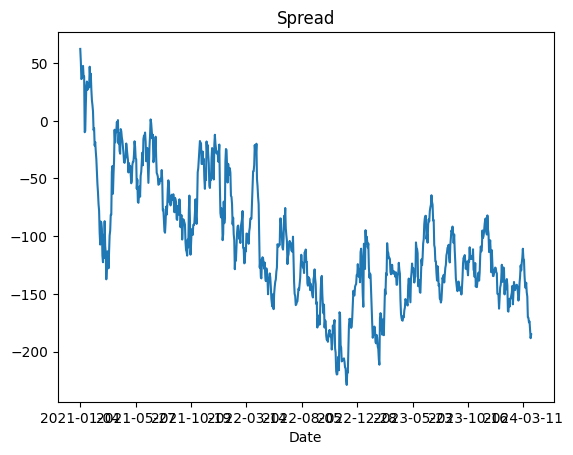

In [243]:
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

# If window param is set, then spread is calculated on a rolling basis
def get_spread(S1, S2, window=None):
    s1_ols = sm.add_constant(S1)
    if window:
        spread_model = sm.regression.rolling.RollingOLS(S2, s1_ols, window=window).fit()
    else:
        spread_model = sm.OLS(S2, s1_ols).fit()
    beta = spread_model.params[S1.name]
    spread = S2 - beta * S1
    return spread


def norm_plot(df):
    df=df.copy()
    df = (df - df.mean()) / df.std()
    return df



SPREAD_WINDOW = None
spread = get_spread(pair_df['Adj Close_S1_x'], pair_df['Adj Close_S2_y'], window=SPREAD_WINDOW)
pair_df['spread'] = spread

pair_df['spread'].plot(title='Spread')


### Create Target 

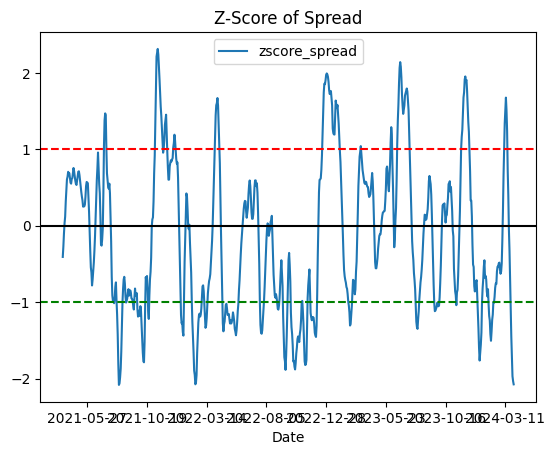

High_S1_x  Low_S1_x  Open_S1_x  Volume_S1_x  Adj Close_S1_x  \
Date                                                                      
2021-01-04   267.5800    260.16     267.00    3572043.0          265.00   
2021-01-05   273.5000    262.57     263.88    4207081.0          270.93   
2021-01-06   288.3800    273.10     276.29    6383530.0          285.55   
2021-01-07   295.8894    286.68     287.77    4009730.0          291.65   
2021-01-08   292.2800    285.06     292.00    2800784.0          290.08   
...               ...       ...        ...          ...             ...   
2024-03-25   410.4600    403.86     406.87    1683977.0          404.94   
2024-03-26   409.3300    404.52     406.09    1406974.0          406.18   
2024-03-27   415.4900    408.37     409.62    2353629.0          415.25   
2024-03-28   419.2000    414.98     416.21    2409718.0          417.69   
2024-04-01   417.9500    412.00     416.68    1863918.0          413.51   

            High_S2_x  Low_S2_x  Open_S2_x  Volume_S2_x  Adj Close_S2_x  ...  \
Date                                                                     ...   
2021-01-04   730.6000    702.04     730.60     623613.0          710.82  ...   
2021-01-05   717.2100    705.26     708.81     431450.0          714.58  ...   
2021-01-06   744.7900    716.10     718.76     730705.0          734.96  ...   
2021-01-07   753.2700    743.01     748.34     655965.0          750.42  ...   
2021-01-08   759.3664    747.42     757.15     623026.0          756.45  ...   
...               ...       ...        ...          ...             ...  ...   
2024-03-25   826.9900    815.17     820.44     378197.0          816.21  ...   
2024-03-26   823.8763    817.93     819.47     374110.0          820.20  ...   
2024-03-27   835.5100    822.49     826.80     466671.0          835.12  ...   
2024-03-28   838.6800    831.02     836.22     532198.0          833.70  ...   
2024-04-01   835.1200    825.24     834.98     395890.0          826.77  ...   

            Open_S1_y  Volume_S1_y  Adj Close_S1_y  High_S2_y  Low_S2_y  \
Date                                                                      
2021-01-04     267.00    3572043.0          265.00   730.6000    702.04   
2021-01-05     263.88    4207081.0          270.93   717.2100    705.26   
2021-01-06     276.29    6383530.0          285.55   744.7900    716.10   
2021-01-07     287.77    4009730.0          291.65   753.2700    743.01   
2021-01-08     292.00    2800784.0          290.08   759.3664    747.42   
...               ...          ...             ...        ...       ...   
2024-03-25     406.87    1683977.0          404.94   826.9900    815.17   
2024-03-26     406.09    1406974.0          406.18   823.8763    817.93   
2024-03-27     409.62    2353629.0          415.25   835.5100    822.49   
2024-03-28     416.21    2409718.0          417.69   838.6800    831.02   
2024-04-01     416.68    1863918.0          413.51   835.1200    825.24   

            Open_S2_y  Volume_S2_y  Adj Close_S2_y      spread  zscore_spread  
Date                                                                           
2021-01-04     730.60     623613.0          710.82   62.319539            NaN  
2021-01-05     708.81     431450.0          714.58   51.567812            NaN  
2021-01-06     718.76     730705.0          734.96   36.170164            NaN  
2021-01-07     748.34     655965.0          750.42   36.702417            NaN  
2021-01-08     757.15     623026.0          756.45   46.574477            NaN  
...               ...          ...             ...         ...            ...  
2024-03-25     820.44     378197.0          816.21 -174.747648      -1.442855  
2024-03-26     819.47     374110.0          820.20 -173.792140      -1.707300  
2024-03-27     826.80     466671.0          835.12 -181.067986      -1.967804  
2024-03-28     836.22     532198.0          833.70 -188.459085      -2.031132  
2024-04-01     834.98     395890.0          826.77 -185.159

In [244]:

# We want to predict the z-score of spread, to forecast deviations from the mean

# The Z-score of the spread will be used to determine when to buy and sell
# We use a low/high moving average to calculate the z-score. 
# This is so that the z-score is not affected by the spread increasing over time
# Can play around with the window sizes to see what works best

# Moving Z score Calculation (Trading Signal)
ma_high = pair_df.spread.rolling(window=60).mean()
ma_low = pair_df.spread.rolling(window=5).mean()
std_high = pair_df.spread.rolling(window=60).std()

moving_zscore = (ma_low - ma_high) / std_high
pair_df['zscore_spread'] = moving_zscore


pair_df['zscore_spread'].plot(title='Z-Score of Spread')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend()
plt.show()
pair_df

In [246]:
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error


def create_dataset(data, look_back, target_col="spread_close", split_sizes=[0.7, 0.2, 0.1], drop_cols: list = []):
    data = data.copy().dropna()
    y = data[target_col]
    y_shifted = y.shift(-look_back)

    data["target"] = y_shifted
    data = data.dropna().drop(drop_cols, axis=1)
    train_size = int(len(data) * split_sizes[0])
    val_size = int(len(data) * split_sizes[1])
    test_size = len(data) - train_size - val_size



    print("------Dataset Information------")
    print(tabulate([
            ["Train", train_size, data.index[train_size].date()], 
            ["Val", val_size, data.index[-val_size].date()],
            ["Test", test_size, data.index[-test_size].date()]],
        ["Set", "Size", "Date Cutoff"]))

    train_data = data.iloc[:train_size]
    val_data = data.iloc[train_size : train_size + val_size]
    test_data = data.iloc[-test_size:]
    return train_data, val_data, test_data


def prepare_dataset(train_data, val_data, test_data):
    X_train, y_train = train_data.drop(columns=["target"]), train_data["target"]
    X_val, y_val = val_data.drop(columns=["target"]), val_data["target"]
    X_test, y_test = test_data.drop(columns=["target"]), test_data["target"]

    return X_train, y_train, X_val, y_val, X_test, y_test



## Dataset Setup

In [247]:
# Parameters
LOOK_BACK = 3
DROP_COLS = [
   
]

train_data, val_data, test_data = create_dataset(
    pair_df, 
    look_back=LOOK_BACK, 
    target_col="zscore_spread", 
    drop_cols=DROP_COLS
)

X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset(train_data, val_data, test_data)

# Combine val and test data since were not using Deep learning or hyper-param tuning 
X_test = pd.concat([X_val, X_test])
y_test = pd.concat([y_val, y_test])

------Dataset Information------


AttributeError: 'str' object has no attribute 'date'

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

def calculate_metrics(y_true, y_pred):
    metric_frame = {
        "mape": mean_absolute_percentage_error(y_true, y_pred),
        "mse": mean_squared_error(y_true, y_pred),
        "mae": mean_absolute_error(y_true, y_pred),
        "r2": r2_score(y_true, y_pred)
    }
    print(f"\nR2: {metric_frame['r2']:.2f}, MAE: {metric_frame['mae']:.2f}, MAPE: {metric_frame['mape']*100:.2f}%")



R2: -1.28, MAE: 1.21, MAPE: 348.38%


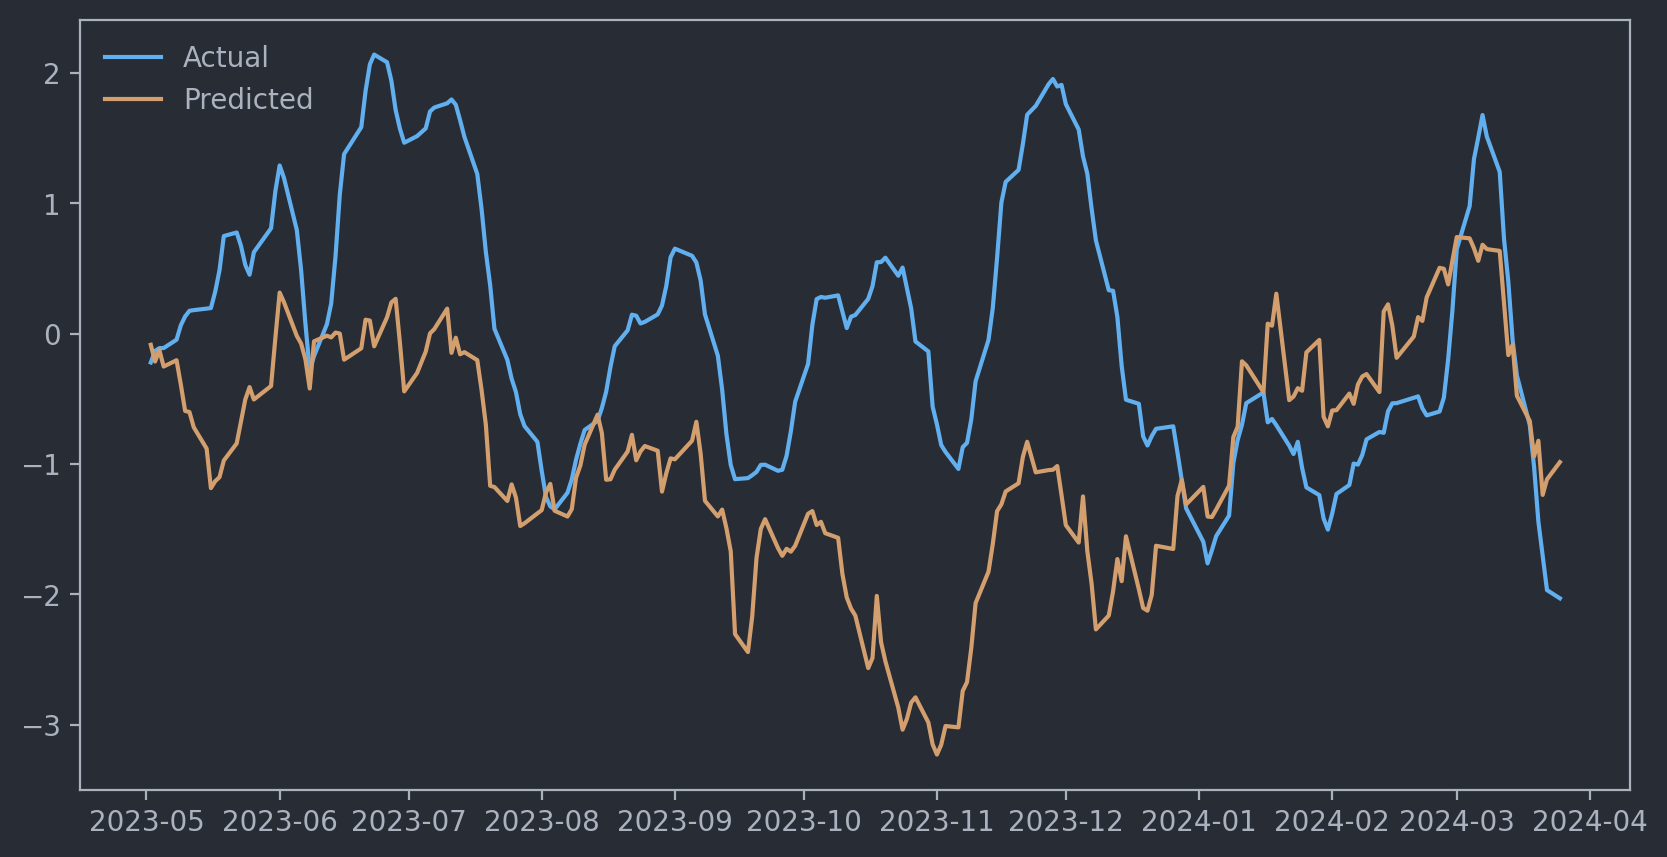

In [43]:
# ---- Model Training ----
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

y_pred = model_reg.predict(X_test)

model_results = {}
model_results['Vanilla Regression'] = calculate_metrics(y_test, y_pred)


fig = plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted")
plt.legend()

# get feature importance
feature_importance = model_reg.coef_
features = X_train.columns
feature_importance_df = pd.DataFrame({"feature": features, "importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values("importance", ascending=False)

In [49]:
print('Original Feature Dim:', feature_importance_df.shape[0])

# Can Change Thresholds, By no means are these the best thresholds
# Should use another method for feature selection, this was just for demonstration
low_importance_df = feature_importance_df[(feature_importance_df['importance'] < 1) & (feature_importance_df['importance'] > -1)]
print('Low Importance Feature Dim:', low_importance_df.shape[0])

low_importance_cols = low_importance_df.feature.to_list()
high_importance_df = feature_importance_df[(feature_importance_df['importance'] >= 1) | (feature_importance_df['importance'] <= -1)]

Original Feature Dim: 252
Low Importance Feature Dim: 200


### Train regression again with low importance columns removed

------Dataset Information------
Set      Size  Date Cutoff
-----  ------  -------------
Train     525  2023-05-02
Val       150  2023-08-21
Test       76  2023-12-05

R2: 0.72, MAE: 0.39, MAPE: 94.40%


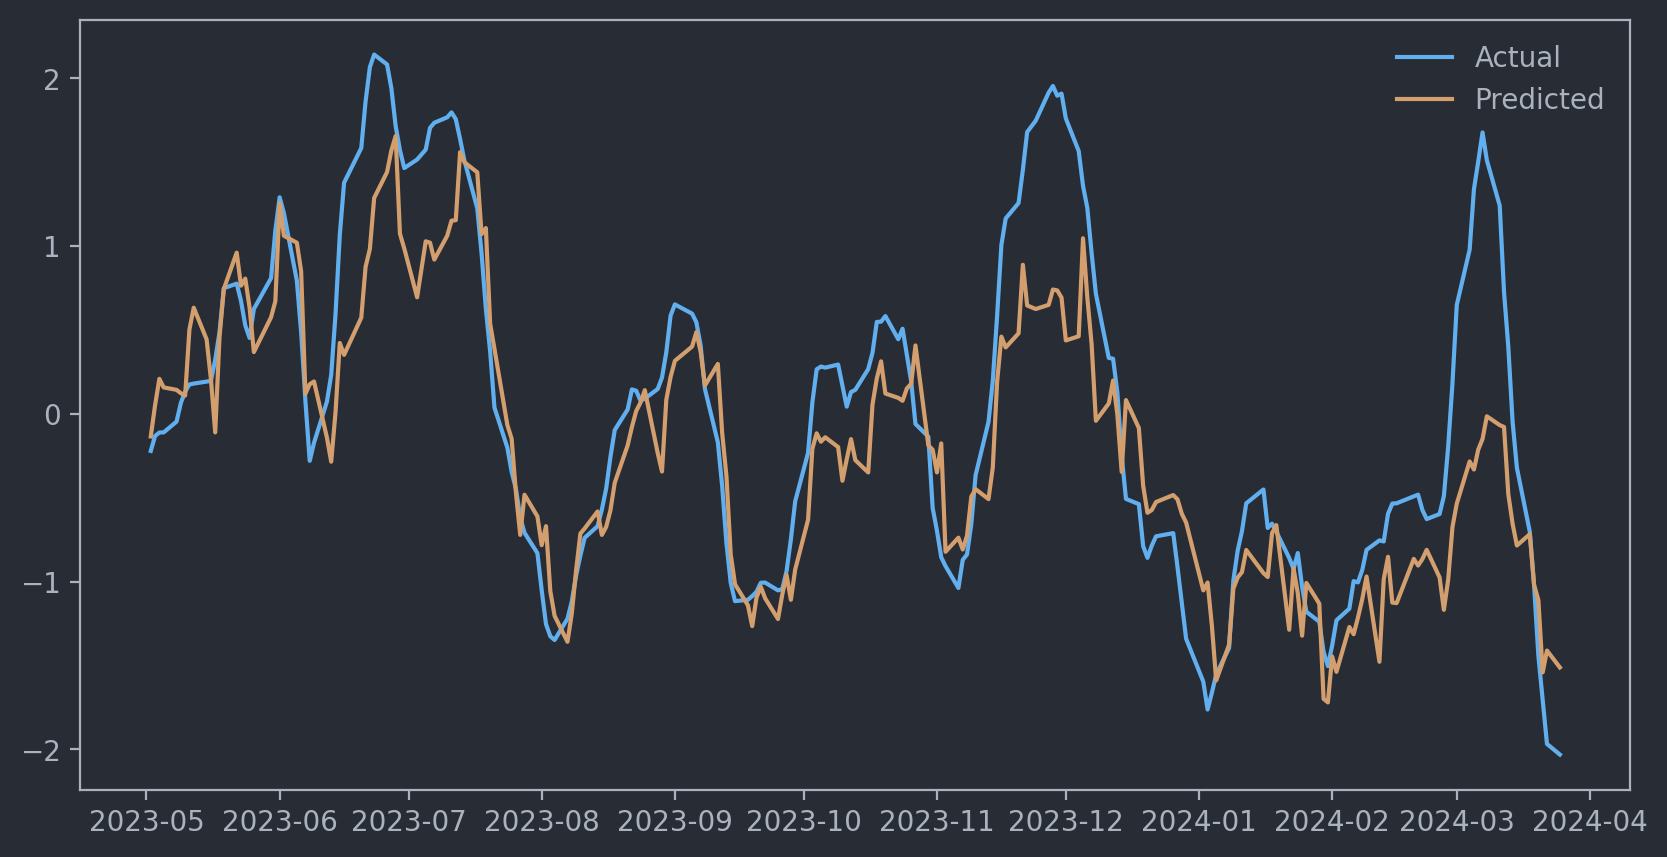

In [45]:

train_data, val_data, test_data = create_dataset(
    pair_df, 
    look_back=LOOK_BACK, 
    target_col="zscore_spread", 
    drop_cols=low_importance_cols
)

X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset(train_data, val_data, test_data)

# Combine val and test data since were not using Deep learning or hyper-param tuning 
X_test = pd.concat([X_val, X_test])
y_test = pd.concat([y_val, y_test])



model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

y_pred = model_reg.predict(X_test)


model_results['Regression with Feature Selection'] = calculate_metrics(y_test, y_pred)

fig = plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted")
plt.legend()

plt.show()

# General Setup

In [1]:
def add_moving_averages(df, moving_averages, columns):
    df = df.copy()
    for ma in moving_averages:
        for col in columns:
            new_col = f'{col}_ma{ma}'
            df[new_col] = df[col].rolling(window=ma).mean()
    # ffill na
    df.fillna(method='ffill', inplace=True)
    return df

# If window param is set, then spread is calculated on a rolling basis
def get_spread(S1, S2, window=None):
    s1_ols = sm.add_constant(S1)
    if window:
        spread_model = sm.regression.rolling.RollingOLS(S2, s1_ols, window=window).fit()
    else:
        spread_model = sm.OLS(S2, s1_ols).fit()
    beta = spread_model.params[S1.name]
    spread = S2 - beta * S1
    return spread


def norm_plot(df):
    df=df.copy()
    df = (df - df.mean()) / df.std()
    return df

from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error


def create_dataset(data, look_back, target_col="spread_close", split_sizes=[0.6, 0.1, 0.3], drop_cols: list = []):
    data = data.copy().dropna()
    y = data[target_col]
    y_shifted = y.shift(-look_back)

    data["target"] = y_shifted
    data = data.dropna().drop(drop_cols, axis=1)
    train_size = int(len(data) * split_sizes[0])
    val_size = int(len(data) * split_sizes[1])
    test_size = len(data) - train_size - val_size



    print("------Dataset Information------")
    print(tabulate([
                ["Train", train_size, data.index[train_size].date()],
                ["Val", val_size, data.index[-val_size].date()],
                ["Test", test_size, data.index[-test_size].date()]],
            ["Set", "Size", "Date Cutoff"]))

    train_data = data.iloc[:train_size]
    val_data = data.iloc[train_size : train_size + val_size]
    test_data = data.iloc[-test_size:]
    return train_data, val_data, test_data


def prepare_dataset(train_data, val_data, test_data):
    X_train, y_train = train_data.drop(columns=["target"]), train_data["target"]
    X_val, y_val = val_data.drop(columns=["target"]), val_data["target"]
    X_test, y_test = test_data.drop(columns=["target"]), test_data["target"]

    return X_train, y_train, X_val, y_val, X_test, y_test

def create_dataset_full(data, look_back, target_col="spread_close", split_sizes=[0.6, 0.1, 0.3], drop_cols: list = []):
    data = data.copy().dropna()
    y = data[target_col]
    y_shifted = y.shift(-look_back)

    data["target"] = y_shifted
    data = data.dropna().drop(drop_cols, axis=1)

    return data



In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS



data_dir = '../data/'
#price_history_dir = data_dir + f'{data_dir}price_history/'
#sentiment_dir = data_dir + f'{data_dir}sentiments/'
#ti_dir = data_dir + f'{data_dir}technical_indicators/'

price_history_dir = data_dir + f'{data_dir}price_history/'
sentiment_dir = data_dir + f'{data_dir}sentiments/'
ti_dir = data_dir + f'{data_dir}technical_indicators/'

import glob

# Load Ticker Pairs
tickers_list = [file.split('/')[-1].strip('.csv') for file in glob.glob(price_history_dir + '*.csv')]
tickers_list = [path.replace('\\', '/') for path in tickers_list]
tickers_list = [ticker.replace("price_history/", "") for ticker in tickers_list]
#pairs_df = pd.read_csv(data_dir + 'ranked_pairs_snp.csv')
pairs_df = pd.read_csv('ranked_pairs_snp.csv')
pairs = pairs_df[['ticker_0', 'ticker_1']].values
unique_pairs= pairs_df[['ticker_0', 'ticker_1']].drop_duplicates('ticker_0', keep='first').drop_duplicates('ticker_1', keep='first')


# Load Ticker History, Sentiment and Technical Indicators
data = {}
class TickerData:
    def __init__(self, ticker):
        self.ticker = ticker
        #self.history = pd.read_csv(price_history_dir + f'{ticker}.csv', index_col='Date', parse_dates=['Date'])
        #self.sentiment = pd.read_csv(sentiment_dir + f'{ticker}.csv', index_col='Date', parse_dates=['Date'])
        #self.ti = pd.read_csv(ti_dir + f'{ticker}.csv', index_col='Date', parse_dates=['Date'])
        self.history = pd.read_csv( f'{"price_history/"+ticker}.csv', index_col='Date', parse_dates=['Date'])
        self.sentiment = pd.read_csv( f'{"sentiments/"+ticker}.csv', index_col='Date', parse_dates=['Date'])
        self.ti = pd.read_csv(f'{"technical_indicators/"+ticker}.csv', index_col='Date', parse_dates=['Date'])
    def __repr__(self):
        return repr(self.history['Adj Close'])

class DATA:
    pass

for ticker in tickers_list:
    setattr(DATA, ticker, TickerData(ticker))

    data[ticker] = TickerData(ticker)



# Pair Selection
PAIR_IDX = 0
ADD_SENTIMENT_MA = False


pair = pairs[PAIR_IDX]
print(pair)

data = {key.replace('price_history/', ''): value for key, value in data.items()}

# Join Sentiment and add Sentiment Moving Averages if ADD_SENTIMENT_MA is True
pair_sentiment_df = pd.merge( data[pair[0]].sentiment, data[pair[1]].sentiment, left_index=True, right_index=True, suffixes=("_S1", "_S2"),)
if ADD_SENTIMENT_MA:
    pair_sentiment_df = add_moving_averages(pair_sentiment_df, [5, 10, 20, 40, 80], columns=pair_sentiment_df.columns)

# Join Technical Indicators
pair_ti_df = pd.merge( data[pair[0]].ti, data[pair[1]].ti, left_index=True, right_index=True, suffixes=("_S1", "_S2"))
pair_df = pd.merge(pair_ti_df, pair_sentiment_df, left_index=True, right_index=True, how="left")



# ---- Dataset Setup ----
# We want to predict the z-score of spread, to forecast deviations from the mean

# The Z-score of the spread will be used to determine when to buy and sell
# We use a low/high moving average to calculate the z-score. 
# This is so that the z-score is not affected by the spread increasing over time
# Can play around with the window sizes to see what works best

SPREAD_WINDOW = None
MA_HIGH = 60
MA_LOW = 5

spread = get_spread(pair_df['Adj Close_S1'], pair_df['Adj Close_S2'], window=SPREAD_WINDOW)
pair_df['spread'] = spread

# Calculate Moving Z score Calculation (Trading Signal)
ma_high = pair_df.spread.rolling(window=MA_HIGH).mean()
ma_low = pair_df.spread.rolling(window=MA_LOW).mean()
std_high = pair_df.spread.rolling(window=MA_HIGH).std()

moving_zscore = (ma_low - ma_high) / std_high
pair_df['zscore_spread'] = moving_zscore



# --- Feature Selection Setup ---

# Parameters
LOOK_BACK = 3
DROP_COLS = [
   
]


train_data, val_data, test_data = create_dataset(
    pair_df, 
    look_back=LOOK_BACK, 
    target_col="zscore_spread", 
    drop_cols=DROP_COLS
)

X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset(train_data, val_data, test_data)

# Combine val and test data since were not using Deep learning or hyper-param tuning 
X_test = pd.concat([X_val, X_test])
y_test = pd.concat([y_val, y_test])


pair_df



['GS' 'BLK']
------Dataset Information------
Set      Size  Date Cutoff
-----  ------  -------------
Train     450  2023-01-12
Val        75  2023-12-06
Test      226  2023-05-02


High_S1  Low_S1  Open_S1  Volume_S1  Adj Close_S1        P_S1  \
Date                                                                         
2021-01-04  267.5800  260.16   267.00  3572043.0        265.00  264.246667   
2021-01-05  273.5000  262.57   263.88  4207081.0        270.93  269.000000   
2021-01-06  288.3800  273.10   276.29  6383530.0        285.55  282.343333   
2021-01-07  295.8894  286.68   287.77  4009730.0        291.65  291.406467   
2021-01-08  292.2800  285.06   292.00  2800784.0        290.08  289.140000   
...              ...     ...      ...        ...           ...         ...   
2024-03-25  410.4600  403.86   406.87  1683977.0        404.94  406.420000   
2024-03-26  409.3300  404.52   406.09  1406974.0        406.18  406.676667   
2024-03-27  415.4900  408.37   409.62  2353629.0        415.25  413.036667   
2024-03-28  419.2000  414.98   416.21  2409718.0        417.69  417.290000   
2024-04-01  417.9500  412.00   416.68  1863918.0        413.51  414.486667   

                 R1_S1       R2_S1       R3_S1       S1_S1  ...  \
Date                                                        ...   
2021-01-04  267.081107  268.832227  271.666667  261.412227  ...   
2021-01-05  273.175260  275.754740  279.930000  264.824740  ...   
2021-01-06  288.180293  291.786373  297.623333  276.506373  ...   
2021-01-07  294.924457  297.097876  300.615867  287.888476  ...   
2021-01-08  291.898040  293.601960  296.360000  286.381960  ...   
...                ...         ...         ...         ...  ...   
2024-03-25  408.941200  410.498800  413.020000  403.898800  ...   
2024-03-26  408.514087  409.649247  411.486667  404.839247  ...   
2024-03-27  415.756507  417.436827  420.156667  410.316827  ...   
2024-03-28  418.902040  419.897960  421.510000  415.677960  ...   
2024-04-01  416.759567  418.163767  420.436667  412.213767  ...   

            others_dlr_S2  others_cr_S2  news_pos_sentiment_count_S1  \
Date                                                                   
2021-01-04       0.000000      0.000000                          1.0   
2021-01-05       0.527572      0.528967                          1.0   
2021-01-06       2.812112      3.396078                          3.0   
2021-01-07       2.081697      5.571031                          2.0   
2021-01-08       0.800339      6.419347                          2.0   
...                   ...           ...                          ...   
2024-03-25      -1.050563     14.826538                          2.0   
2024-03-26       0.487654     15.387862                          0.0   
2024-03-27       1.802721     17.486846                          0.0   
2024-03-28      -0.170180     17.287077                          2.0   
2024-04-01      -0.834708     16.312147                          NaN   

            news_sentiment_daily_avg_S1  twitter_pos_sentiment_count_S1  \
Date                                                                      
2021-01-04                       0.0288                             2.0   
2021-01-05                      -0.0050                             4.0   
2021-01-06                      -0.0136                            11.0   
2021-01-07                       0.0016                            13.0   
2021-01-08                       0.0033                            11.0   
...                                 ...                             ...   
2024-03-25                       0.0087                            15.0   
2024-03-26                      -0.0096                            18.0   
2024-03-27                      -0.0035                            17.0   
2024-03-28                       0.0147                            12.0   
2024-04-01                          NaN                             NaN   

            news_sentiment_daily_avg_S2  twitter_pos_sentiment_count_S2  \
Date                                                                      
2021-01-04                       0.0000                        

# Transformer
## get the sequence as the input to the transformer model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the training and testing input data into sequences
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 20 # Define sequence length
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_26628\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


### shape of the sequence

In [5]:
len(y_test)

301

In [6]:
len(y_test_seq)

281

In [7]:
X_train_seq.shape, y_train_seq.shape, X_test_seq.shape, y_test_seq.shape

((430, 20, 252), (430,), (281, 20, 252), (281,))

### build the model

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D

# change numbewr of features if needed
def build_transformer_model(input_shape, head_size=64, num_heads=8, ff_dim=252, num_transformer_blocks=4, mlp_units=[128], dropout=0.1, mlp_dropout=0.1):
    inputs = tf.keras.Input(shape=input_shape)
    x = inputs
    
    # Transformer blocks
    for _ in range(num_transformer_blocks):
        # Layer normalization 1
        x1 = LayerNormalization(epsilon=1e-6)(x)
        # Multi head attention
        attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(x1, x1)
        # Skip connection
        x2 = tf.keras.layers.Add()([attention_output, x])
        
        # Layer normalization 2
        x3 = LayerNormalization(epsilon=1e-6)(x2)
        # Feed forward network
        ff_output = Dense(ff_dim, activation="relu")(x3)
        ff_output = Dropout(mlp_dropout)(ff_output)
        # Skip connection
        x = tf.keras.layers.Add()([ff_output, x2])
    
    # Global average pooling
    x = GlobalAveragePooling1D()(x)
    # Final MLP layers
    for units in mlp_units:
        x = Dense(units, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)
    
    outputs = Dense(1)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Model parameters
#input_shape = X_train_seq.shape[1:]

# Build model
#model = build_transformer_model(input_shape, ff_dim=252)
#model.summary()


In [263]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_seq, y_test_seq, verbose=1)
print("Test Loss:", test_loss)
print("Test MAE:", test_mae)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 9.0034 - mean_absolute_error: 2.1835 - val_loss: 4.6428 - val_mean_absolute_error: 1.7983
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 1.6193 - mean_absolute_error: 0.9882 - val_loss: 1.2607 - val_mean_absolute_error: 1.0120
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - loss: 1.0953 - mean_absolute_error: 0.7866 - val_loss: 1.3562 - val_mean_absolute_error: 0.9890
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - loss: 0.6040 - mean_absolute_error: 0.6138 - val_loss: 1.5755 - val_mean_absolute_error: 1.1454
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 0.3169 - mean_absolute_error: 0.4412 - val_loss: 1.6415 - val_mean_absolute_error: 1.1931
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 0.2259 - mean_absolute_error: 0.3619 - val_loss: 1.8630 - val_mean_absolute_error: 1.2062
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - loss: 0.2235 - mean_absolute_error: 0.3

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step
R-squared: -0.41485549964161783


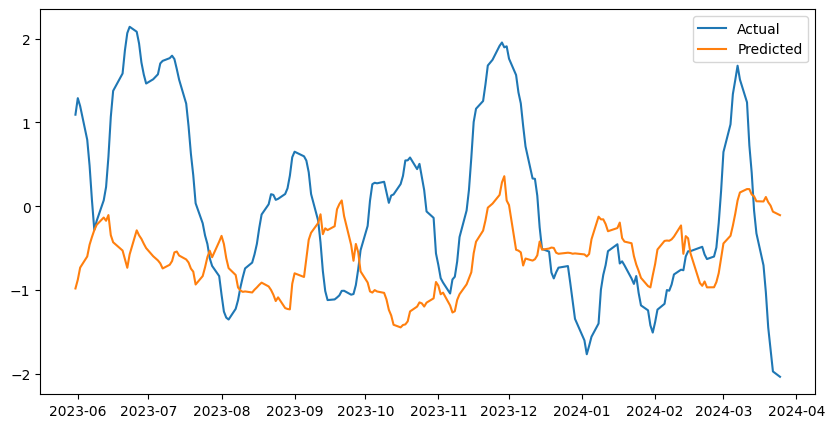

In [264]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
# Assuming `model` is your trained model and `X_test_seq` is your sequence data
y_pred = model.predict(X_test_seq)

y_pred = y_pred.flatten()

y_test_adjusted = y_test[-len(y_pred):] 

fig = plt.figure(figsize=(10, 5))
plt.plot(y_test_adjusted.index, y_test_adjusted, label="Actual")
plt.plot(y_test_adjusted.index, y_pred, label="Predicted")
plt.legend()

# Calculate R-squared
r2 = r2_score(y_test_adjusted, y_pred)
print("R-squared:", r2)

plt.show()


## Feature selection

In [271]:
# Locate the first Dense layer in the model
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Dense):
        input_layer_weights = layer.get_weights()[0]  # Weight matrix of the Dense layer
        break

# Calculate the absolute sum of the weights for each feature
feature_weights = np.abs(input_layer_weights).sum(axis=1)

# Sort the features based on their weights in descending order
sorted_features = np.argsort(feature_weights)[::-1]

# Select the top-k features
k = 100
selected_features = sorted_features[:k]


# Print the selected features
print("Selected Features:")
for feature_index in selected_features:
    print(f"Feature {feature_index};  {pair_df.columns[feature_index]}")


Selected Features:
Feature 100;  trend_psar_down_indicator_S1
Feature 93;  trend_visual_ichimoku_b_S1
Feature 43;  volume_vwap_S1
Feature 104;  momentum_stoch_rsi_d_S1
Feature 188;  volatility_ui_S2
Feature 238;  momentum_pvo_signal_S2
Feature 110;  momentum_ao_S1
Feature 79;  trend_dpo_S1
Feature 147;  ATR_S2
Feature 150;  Engulfing_Indication_S2
Feature 15;  MACDH_S1
Feature 5;  P_S1
Feature 175;  volatility_kcc_S2
Feature 244;  news_pos_sentiment_count_S1
Feature 95;  trend_aroon_down_S1
Feature 166;  volume_mfi_S2
Feature 198;  trend_vortex_ind_diff_S2
Feature 40;  volume_em_S1
Feature 227;  momentum_tsi_S2
Feature 248;  twitter_pos_sentiment_count_S2
Feature 251;  zscore_spread
Feature 136;  MACDS_S2
Feature 157;  EMA_30_S2
Feature 78;  trend_mass_index_S1
Feature 25;  ATR_S1
Feature 109;  momentum_wr_S1
Feature 134;  OBV_S2
Feature 172;  volatility_bbp_S2
Feature 124;  Open_S2
Feature 54;  volatility_kch_S1
Feature 191;  trend_macd_diff_S2
Feature 59;  volatility_kcli_S1
Feature 

In [284]:
# Determine the indices of features not selected
all_indices = set(range(pair_df.shape[1]))
selected_indices = set(selected_features)
dropped_indices = all_indices - selected_indices

# Collect the column names to be dropped
columns_to_drop = [pair_df.columns[i] for i in dropped_indices]

print("Columns to Drop:")
for column in columns_to_drop:
    print(column)

Columns to Drop:
High_S1
Low_S1
Adj Close_S1
R1_S1
R2_S1
S2_S1
S3_S1
OBV_S1
MACD_S1
MACDS_S1
LMA_S1
RSI_S1
SR_D_S1
SR_RSI_K_S1
HL_PCT_S1
PCT_CHG_S1
Engulfing_Indication_S1
EMA_30_S1
volume_adi_S1
volume_obv_S1
volume_fi_S1
volume_sma_em_S1
volume_mfi_S1
volume_nvi_S1
volatility_bbm_S1
volatility_bbh_S1
volatility_bbl_S1
volatility_bbw_S1
volatility_bbli_S1
volatility_kcc_S1
volatility_kcl_S1
volatility_kcp_S1
volatility_dcl_S1
volatility_dch_S1
volatility_dcm_S1
volatility_dcw_S1
volatility_dcp_S1
volatility_ui_S1
trend_macd_S1
trend_macd_signal_S1
trend_macd_diff_S1
trend_sma_fast_S1
trend_sma_slow_S1
trend_ema_fast_S1
trend_vortex_ind_pos_S1
trend_vortex_ind_neg_S1
trend_trix_S1
trend_kst_S1
trend_kst_sig_S1
trend_kst_diff_S1
trend_ichimoku_conv_S1
trend_ichimoku_a_S1
trend_ichimoku_b_S1
trend_stc_S1
trend_adx_S1
trend_adx_pos_S1
trend_adx_neg_S1
trend_cci_S1
trend_visual_ichimoku_a_S1
trend_aroon_up_S1
trend_psar_up_S1
trend_psar_down_S1
momentum_rsi_S1
momentum_stoch_rsi_k_S1
momen

In [274]:
# Filter the training and testing data to include only the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Convert the filtered data into sequences
X_train_seq_selected, y_train_seq_selected = create_sequences(X_train_selected, y_train, time_steps)
X_test_seq_selected, y_test_seq_selected = create_sequences(X_test_selected, y_test, time_steps)

# Build model with the filtered input shape
input_shape_selected = X_train_seq_selected.shape[1:]
model_selected = build_transformer_model(input_shape_selected, ff_dim=100)
model_selected.summary()

# Compile the model
model_selected.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history_selected = model_selected.fit(X_train_seq_selected, y_train_seq_selected, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 20, 100)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 20, 100)   │        200 │ input_layer_13[0… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 20, 100)   │    206,436 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_80 (Add)        │ (None, 20, 100)   │          0 │ multi_head_atten… │
│                     │                   │            │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 20, 100)   │        200 │ add_80[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_58 (Dense)    │ (None, 20, 100)   │     10,100 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_90          │ (None, 20, 100)   │          0 │ dense_58[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_81 (Add)        │ (None, 20, 100)   │          0 │ dropout_90[0][0], │
│                     │                   │            │ add_80[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 20, 100)   │        200 │ add_81[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 20, 100)   │    206,436 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_82 (Add)        │ (None, 20, 100)   │          0 │ multi_head_atten… │
│                     │                   │            │ add_81[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 20, 100)   │        200 │ add_82[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_59 (Dense)    │ (None, 20, 100)   │     10,100 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_92          │ (None, 20, 100)   │          0 │ dense_59[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_83 (Add)        │ (None, 20, 100)   │          0 │ dropout_92[0][0], │
│                     │                   │            │ add_82[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 20, 100)   │        200 │ add_83[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 20, 100)   │    206,436 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 880,801 (3.36 MB)

 Trainable params: 880,801 (3.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - loss: 7.8594 - mean_absolute_error: 2.0926 - val_loss: 1.5217 - val_mean_absolute_error: 1.1197
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 1.2400 - mean_absolute_error: 0.9010 - val_loss: 1.1324 - val_mean_absolute_error: 0.9375
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.6551 - mean_absolute_error: 0.6126 - val_loss: 0.8774 - val_mean_absolute_error: 0.8276
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.5062 - mean_absolute_error: 0.5746 - val_loss: 1.1068 - val_mean_absolute_error: 0.9592
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.3828 - mean_absolute_error: 0.4889 - val_loss: 0.7942 - val_mean_absolute_error: 0.8309
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.3763 - mean_absolute_error: 0.4915 - val_loss: 1.1214 - val_mean_absolute_error: 0.9323
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.2090 - mean_absolute_error: 0.3629 - v

In [276]:
# Evaluate the model
test_loss, test_mae = model_selected.evaluate(X_train_seq_selected, y_train_seq_selected, verbose=1)
print("Test Loss:", test_loss)
print("Test MAE:", test_mae)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0661 - mean_absolute_error: 0.1209
Test Loss: 0.27430155873298645
Test MAE: 0.25785478949546814


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R-squared: -0.3373362535272635
MAPE: 213.06878641667
MAE: 1.0363108320760117


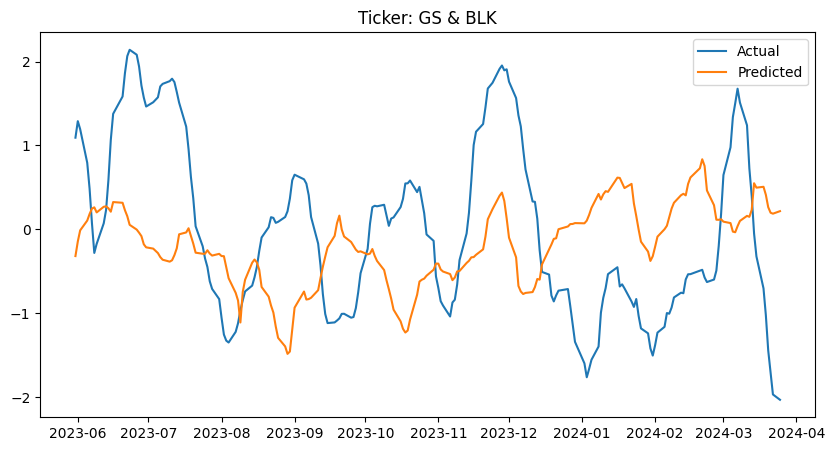

In [285]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error
# Assuming `model` is your trained model and `X_test_seq` is your sequence data
y_pred = model_selected.predict(X_test_seq_selected)

y_pred = y_pred.flatten()

y_test_seq_selected = y_test[-len(y_pred):] 

fig = plt.figure(figsize=(10, 5))
plt.plot(y_test_seq_selected.index, y_test_seq_selected, label="Actual")
plt.plot(y_test_seq_selected.index, y_pred, label="Predicted")
# Add the name of the ticker to the plot
plt.title("Ticker: " + pair[0] + " & " + pair[1])
plt.legend()

plt.legend()

# Calculate R-squared
r2 = r2_score(y_test_seq_selected , y_pred)
print("R-squared:", r2)

# Calculate MAPE
mape = np.mean(np.abs((y_test_seq_selected  - y_pred) / y_test_adjusted)) * 100
print("MAPE:", mape)

# Calculate MAE
mae = mean_absolute_error(y_test_seq_selected , y_pred)
print("MAE:", mae)

plt.show()

Try all tickers

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

pred_price = {}
test_price = {}

model_list = {}

metrics_result = {}


for ii in range(30):
    # Pair Selection
    PAIR_IDX = ii
    ADD_SENTIMENT_MA = False


    pair = pairs[PAIR_IDX]
    print(pair)

    data = {key.replace('price_history/', ''): value for key, value in data.items()}

    # Join Sentiment and add Sentiment Moving Averages if ADD_SENTIMENT_MA is True
    pair_sentiment_df = pd.merge( data[pair[0]].sentiment, data[pair[1]].sentiment, left_index=True, right_index=True, suffixes=("_S1", "_S2"),)
    if ADD_SENTIMENT_MA:
        pair_sentiment_df = add_moving_averages(pair_sentiment_df, [5, 10, 20], columns=pair_sentiment_df.columns)

    # Join Technical Indicators
    pair_ti_df = pd.merge( data[pair[0]].ti, data[pair[1]].ti, left_index=True, right_index=True, suffixes=("_S1", "_S2"))
    pair_df = pd.merge(pair_ti_df, pair_sentiment_df, left_index=True, right_index=True, how="left")



    # ---- Dataset Setup ----
    # We want to predict the z-score of spread, to forecast deviations from the mean

    # The Z-score of the spread will be used to determine when to buy and sell
    # We use a low/high moving average to calculate the z-score. 
    # This is so that the z-score is not affected by the spread increasing over time
    # Can play around with the window sizes to see what works best

    SPREAD_WINDOW = None
    MA_HIGH = 60
    MA_LOW = 5

    spread = get_spread(pair_df['Adj Close_S1'], pair_df['Adj Close_S2'], window=SPREAD_WINDOW)
    pair_df['spread'] = spread

    # Calculate Moving Z score Calculation (Trading Signal)
    ma_high = pair_df.spread.rolling(window=MA_HIGH).mean()
    ma_low = pair_df.spread.rolling(window=MA_LOW).mean()
    std_high = pair_df.spread.rolling(window=MA_HIGH).std()

    moving_zscore = (ma_low - ma_high) / std_high
    pair_df['zscore_spread'] = moving_zscore



    # --- Feature Selection Setup ---

    # Parameters
    LOOK_BACK = 3
    DROP_COLS = columns_to_drop

    train_data, val_data, test_data = create_dataset(
        pair_df, 
        look_back=LOOK_BACK, 
        target_col="zscore_spread", 
        drop_cols=DROP_COLS
    )

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset(train_data, val_data, test_data)

    # Combine val and test data since were not using Deep learning or hyper-param tuning 
    X_test = pd.concat([X_val, X_test])
    y_test = pd.concat([y_val, y_test])

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    time_steps = 20 # Define sequence length
    X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

    # Model parameters
    input_shape = X_train_seq.shape[1:]

    # Build model
    model = build_transformer_model(input_shape, ff_dim=X_train.shape[1])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

    # Train the model
    history = model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

    # save the model
    model_list[ii] = model

    # Evaluate the model
    test_loss, test_mae = model.evaluate(X_test_seq, y_test_seq, verbose=1)
    print("Test Loss:", test_loss)
    print("Test MAE:", test_mae)

    # Assuming `model` is your trained model and `X_test_seq` is your sequence data
    y_pred = model.predict(X_test_seq)

    y_pred = y_pred.flatten()

    results_price[ii] = y_pred

    y_test_adjusted = y_test[-len(y_pred):] 

    # Build linear regression model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Predict using the linear regression model
    y_pred_regression = regression_model.predict(X_test)
    y_pred_regression = y_pred_regression[-len(y_pred):] 
    fig = plt.figure(figsize=(10, 5))
    plt.plot(y_test_adjusted.index, y_test_adjusted, label="Actual")
    plt.plot(y_test_adjusted.index, y_pred, label="Predicted (Transformer)")
    # Add the predicted results to the graph
    plt.plot(y_test_adjusted.index, y_pred_regression, label="Predicted (Linear Regression)")
    plt.title("Ticker: " + pair[0] + " & " + pair[1])
    plt.legend()

    # Create a DataFrame to store the metrics
    metrics_df = pd.DataFrame(columns=['Model', 'R-squared', 'MAPE', 'MAE'])

    # Calculate metrics for the Transformer model
    r2_transformer = r2_score(y_test_adjusted, y_pred)
    mape_transformer = np.mean(np.abs((y_test_adjusted - y_pred) / y_test_adjusted)) * 100
    mae_transformer = mean_absolute_error(y_test_adjusted, y_pred)

    pred_price[ii] = y_pred
    test_price[ii] = y_test_adjusted
    
    # Calculate metrics for the Linear Regression model
    r2_regression = r2_score(y_test_adjusted, y_pred_regression)
    mape_regression = np.mean(np.abs((y_test_adjusted - y_pred_regression) / y_test_adjusted)) * 100
    mae_regression = mean_absolute_error(y_test_adjusted, y_pred_regression)

    # Add metrics to the DataFrame
    metrics_df.loc[0] = ['Transformer', r2_transformer, mape_transformer, mae_transformer]
    metrics_df.loc[1] = ['Linear Regression', r2_regression, mape_regression, mae_regression]

    # Display the metrics table
    print(metrics_df)

    metrics_result[ii] = metrics_df

    plt.show()
    y_test_adjusted = y_test_adjusted[-len(y_pred):]


## Grid Search

In [8]:
import pandas as pd 
from typing import DefaultDict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS



data_dir = '../data/'
#price_history_dir = data_dir + f'{data_dir}price_history/'
#sentiment_dir = data_dir + f'{data_dir}sentiments/'
#ti_dir = data_dir + f'{data_dir}technical_indicators/'

price_history_dir = data_dir + f'{data_dir}price_history/'
sentiment_dir = data_dir + f'{data_dir}sentiments/'
ti_dir = data_dir + f'{data_dir}technical_indicators/'

import glob

# Load Ticker Pairs
tickers_list = [file.split('/')[-1].strip('.csv') for file in glob.glob(price_history_dir + '*.csv')]
tickers_list = [path.replace('\\', '/') for path in tickers_list]
tickers_list = [ticker.replace("price_history/", "") for ticker in tickers_list]
#pairs_df = pd.read_csv(data_dir + 'ranked_pairs_snp.csv')
pairs_df = pd.read_csv('ranked_pairs_snp.csv')
pairs = pairs_df[['ticker_0', 'ticker_1']].values
unique_pairs= pairs_df[['ticker_0', 'ticker_1']].drop_duplicates('ticker_0', keep='first').drop_duplicates('ticker_1', keep='first')

def create_dataset(data, look_back, target_col="spread_close", split_sizes=[0.6, 0.2, 0.2], drop_cols: list = [], verbose=False):
    data = data.copy().dropna()
    y = data[target_col]
    y_shifted = y.shift(-look_back)

    data["target"] = y_shifted
    data = data.dropna().drop(drop_cols, axis=1)
    train_size = int(len(data) * split_sizes[0])
    val_size = int(len(data) * split_sizes[1])
    test_size = len(data) - train_size - val_size
    if verbose:
        print("\n------Dataset Information------")
        print(tabulate([
                ["Train", train_size, data.index[train_size].date()],
                ["Val", val_size, data.index[-val_size].date()],
                ["Test", test_size, data.index[-test_size].date()]],
            ["Set", "Size", "Date Cutoff"]))

    train_data = data.iloc[:train_size]
    val_data = data.iloc[train_size : train_size + val_size]
    test_data = data.iloc[-test_size:]
    return train_data, val_data, test_data

# Load Ticker History, Sentiment and Technical Indicators
data = {}
class TickerData:
    def __init__(self, ticker):
        self.ticker = ticker
        #self.history = pd.read_csv(price_history_dir + f'{ticker}.csv', index_col='Date', parse_dates=['Date'])
        #self.sentiment = pd.read_csv(sentiment_dir + f'{ticker}.csv', index_col='Date', parse_dates=['Date'])
        #self.ti = pd.read_csv(ti_dir + f'{ticker}.csv', index_col='Date', parse_dates=['Date'])
        self.history = pd.read_csv( f'{"price_history/"+ticker}.csv', index_col='Date', parse_dates=['Date'])
        self.sentiment = pd.read_csv( f'{"sentiments/"+ticker}.csv', index_col='Date', parse_dates=['Date'])
        self.ti = pd.read_csv(f'{"technical_indicators/"+ticker}.csv', index_col='Date', parse_dates=['Date'])
    def __repr__(self):
        return repr(self.history['Adj Close'])

class DATA:
    pass

for ticker in tickers_list:
    setattr(DATA, ticker, TickerData(ticker))

    data[ticker] = TickerData(ticker)



# Pair Selection
PAIR_IDX = 0
ADD_SENTIMENT_MA = False


pair = pairs[PAIR_IDX]
print(pair)

#data = {key.replace('price_history/', ''): value for key, value in data.items()}

# Functions for data processing
def join_sentiment(data, pair, add_sentiment_ma=DefaultDict()):
    pair_sentiment_df = pd.merge(data[pair[0]].sentiment, data[pair[1]].sentiment, left_index=True, right_index=True, suffixes=("_S1", "_S2"))
    if add_sentiment_ma.get('bool'):
        if not add_sentiment_ma.get('windows'):
            add_sentiment_ma['windows'] = [5, 10, 20, 40, 80]
        pair_sentiment_df = add_moving_averages(pair_sentiment_df, add_sentiment_ma.get('windows'), columns=pair_sentiment_df.columns)
    return pair_sentiment_df

def join_technical_indicators(data, pair):
    return pd.merge(data[pair[0]].ti, data[pair[1]].ti, left_index=True, right_index=True, suffixes=("_S1", "_S2"))

# If window param is set, then spread is calculated on a rolling basis
# Adjusted function to fit on the training set only
def get_spread(S1_train, S2_train, S1_all, S2_all, window=None):
    s1_ols_train = sm.add_constant(S1_train)
    s1_ols_all = sm.add_constant(S1_all)

    if window:
        spread_model = sm.regression.rolling.RollingOLS(S2_train, s1_ols_train, window=window).fit()
        spread_all = sm.regression.rolling.RollingOLS(S2_all, s1_ols_all, window=window).fit()
    else:
        spread_model = sm.OLS(S2_train, s1_ols_train).fit()
        beta_train = spread_model.params[S1_train.name]
        spread_all = S2_all - beta_train * S1_all

    return spread_all

# Adjust the calculate_spread function to use train data
def calculate_spread(pair_df, spread_window, ma_high, ma_low, train_end_idx):
    spread = get_spread(pair_df['Adj Close_S1'][:train_end_idx],
                        pair_df['Adj Close_S2'][:train_end_idx],
                        pair_df['Adj Close_S1'],
                        pair_df['Adj Close_S2'],
                        window=spread_window)
    pair_df['spread'] = spread

    ma_high_values = pair_df.spread.rolling(window=ma_high).mean()
    ma_low_values = pair_df.spread.rolling(window=ma_low).mean()
    std_high = pair_df.spread.rolling(window=ma_high).std()

    moving_zscore = (ma_low_values - ma_high_values) / std_high
    pair_df['zscore_spread'] = moving_zscore
    return pair_df



def setup_dataset(pair_df, look_back, drop_cols):
    train_data, val_data, test_data = create_dataset(pair_df, look_back=look_back, target_col="zscore_spread", drop_cols=drop_cols)
    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset(train_data, val_data, test_data)
    X_test = pd.concat([X_val, X_test])
    y_test = pd.concat([y_val, y_test])
    return X_train, y_train, X_test, y_test

def calculate_metrics(y_true, y_pred):
    metric_frame = {
        "mape": mean_absolute_percentage_error(y_true, y_pred),
        "mse": mean_squared_error(y_true, y_pred),
        "mae": mean_absolute_error(y_true, y_pred),
        "r2": r2_score(y_true, y_pred)
    }
    print(f"\nR2: {metric_frame['r2']:.2f}, MAE: {metric_frame['mae']:.2f}, MAPE: {metric_frame['mape']*100:.2f}%")
    return metric_frame


# Main function to execute different configurations
def build_configuration_single(config):
    pair = pairs[config['PAIR_IDX']]
    pair_sentiment_df = join_sentiment(data, pair, config['ADD_SENTIMENT_MA'])
    pair_ti_df = join_technical_indicators(data, pair)
    pair_df = pd.merge(pair_ti_df, pair_sentiment_df, left_index=True, right_index=True, how="left")

    pair_df = calculate_spread(pair_df, config['SPREAD_WINDOW'], config['MA_HIGH'], config['MA_LOW']).dropna()
    X_train, y_train, X_test, y_test = setup_dataset(pair_df, config['LOOK_BACK'], config['DROP_COLS'])

    return pair_df, X_train, y_train, X_test, y_test

class Config:
    def __init__(self, pair_df=None, X_train=None, y_train=None, X_test=None, y_test=None, model=None, y_pred=None):
        self.pair_df = pair_df
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.model = model
        self.y_pred = y_pred

    def update(self, **kwargs):
        for key, value in kwargs.items():
            setattr(self, key, value)


def build_configuration(config):
    pair = pairs[config['PAIR_IDX']]
    print(f"Building configuration for pair: {pair}")
    pair_sentiment_df = join_sentiment(data, pair, config['ADD_SENTIMENT_MA'])
    pair_ti_df = join_technical_indicators(data, pair)
    pair_df = pd.merge(pair_ti_df, pair_sentiment_df, left_index=True, right_index=True, how="left")

    train_end_idx = int(len(pair_df) * config.get('TRAIN_SPLIT') if config.get('TRAIN_SPLIT') else int(len(pair_df) * 0.5))
    pair_df = calculate_spread(pair_df, config['SPREAD_WINDOW'], config['MA_HIGH'], config['MA_LOW'], train_end_idx).dropna()

    X_train, y_train, X_test, y_test = setup_dataset(pair_df, config['LOOK_BACK'], config['DROP_COLS'])
    #plot_zscore(pair_df) if config['Verbose'] else None

    return Config(pair_df=pair_df, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

def plot_prediction(y_test, y_pred, model_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(y_test.index, y_test, label="Actual")
    ax.plot(y_test.index, y_pred, label=f"Predicted ({model_name})")
    ax.hlines(1.0, y_test.index[0], y_test.index[-1], color='red', linestyle='--', label='+1.0 std')
    ax.hlines(-1.0, y_test.index[0], y_test.index[-1], color='green', linestyle='--', label='-1.0 std')
    plt.title(f"Test Set Prediction: {model_name}")
    plt.xticks(rotation=25)
    ax.legend(['Actual', 'Predicted', '+1.0 std', '-1.0 std'])
    plt.show()


def train(model, config, plot=True):
    model.fit(config.X_train, config.y_train)
    config.y_pred = model.predict(config.X_test)
    config.model = model
    model_name = model.__class__.__name__
    print(f"\n{model_name}")
    metrics = calculate_metrics(config.y_test, config.y_pred)
    if plot:
        plot_prediction(config.y_test, config.y_pred, model_name)
    return metrics




current_config =  {
        'PAIR_IDX': 1,
        'ADD_SENTIMENT_MA': {'bool': True, 'windows': [5, 10, 20, 40, 80]},
        'SPREAD_WINDOW': None,
        'MA_HIGH': 60,
        'MA_LOW': 5,
        'LOOK_BACK': 3,
        'DROP_COLS': [],
        'Verbose': 1,
    }


built_config = build_configuration(current_config)






['GS' 'BLK']
Building configuration for pair: ['JPM' 'CRM']


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_26628\1876564370.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
%matplotlib inline

from datetime import datetime
from itertools import product
import pickle
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


MA_HIGH = [45, 60]
MA_LOW = [3, 5]
look_back = [1, 3, 5, 7]

save_mae = 10000000
for i in range(5):

    if i in [2, 3]:
        continue
    for ma_high, ma_low, lb in product(MA_HIGH, MA_LOW, look_back):
        current_config = {
            'PAIR_IDX': i,
            'ADD_SENTIMENT_MA': {'bool': False, 'windows': [5, 10, 20, 40, 80]},
            'SPREAD_WINDOW': None,
            'MA_HIGH': ma_high,
            'MA_LOW': ma_low,
            'LOOK_BACK': lb,
            'DROP_COLS': [],
            'Verbose': 0,
        }

        if current_config['PAIR_IDX']==2:
            continue;

        print(current_config)
        built_config = build_configuration(current_config)
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(built_config.X_train)
        X_test = scaler.transform(built_config.X_test)

        # Convert the filtered data into sequences
        X_train_seq_selected, y_train_seq_selected = create_sequences(X_train, built_config.y_train, time_steps)
        X_test_seq_selected, y_test_seq_selected = create_sequences(X_test, built_config.y_test, time_steps)

        # Build model with the filtered input shape
        input_shape_selected = X_train_seq_selected.shape[1:]
        model_selected = build_transformer_model(input_shape_selected, ff_dim=252)

        # Compile the model
        model_selected.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

        # Train the model
        history_selected = model_selected.fit(X_train_seq_selected, y_train_seq_selected, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
        
        # Evaluate the model
        test_loss, test_mae= model_selected.evaluate(X_test_seq_selected, y_test_seq_selected, verbose=0)
        print("Test Loss:", test_loss)
        print("Test MAE:", test_mae)

        if test_mae < save_mae:
            save_mae = test_mae
            best_config = current_config
            best_model = model_selected
            best_history = history_selected
            best_test_loss = test_loss
            best_test_mae = test_mae


In [20]:
best_config

{'PAIR_IDX': 1,
 'ADD_SENTIMENT_MA': {'bool': False, 'windows': [5, 10, 20, 40, 80]},
 'SPREAD_WINDOW': None,
 'MA_HIGH': 45,
 'MA_LOW': 5,
 'LOOK_BACK': 1,
 'DROP_COLS': [],
 'Verbose': 0}

## inference with the best configuration

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS



data_dir = '../data/'
#price_history_dir = data_dir + f'{data_dir}price_history/'
#sentiment_dir = data_dir + f'{data_dir}sentiments/'
#ti_dir = data_dir + f'{data_dir}technical_indicators/'

price_history_dir = data_dir + f'{data_dir}price_history/'
sentiment_dir = data_dir + f'{data_dir}sentiments/'
ti_dir = data_dir + f'{data_dir}technical_indicators/'

import glob

# Load Ticker Pairs
tickers_list = [file.split('/')[-1].strip('.csv') for file in glob.glob(price_history_dir + '*.csv')]
tickers_list = [path.replace('\\', '/') for path in tickers_list]
tickers_list = [ticker.replace("price_history/", "") for ticker in tickers_list]
#pairs_df = pd.read_csv(data_dir + 'ranked_pairs_snp.csv')
pairs_df = pd.read_csv('ranked_pairs_snp.csv')
pairs = pairs_df[['ticker_0', 'ticker_1']].values
unique_pairs= pairs_df[['ticker_0', 'ticker_1']].drop_duplicates('ticker_0', keep='first').drop_duplicates('ticker_1', keep='first')


# Load Ticker History, Sentiment and Technical Indicators
data = {}
class TickerData:
    def __init__(self, ticker):
        self.ticker = ticker
        #self.history = pd.read_csv(price_history_dir + f'{ticker}.csv', index_col='Date', parse_dates=['Date'])
        #self.sentiment = pd.read_csv(sentiment_dir + f'{ticker}.csv', index_col='Date', parse_dates=['Date'])
        #self.ti = pd.read_csv(ti_dir + f'{ticker}.csv', index_col='Date', parse_dates=['Date'])
        self.history = pd.read_csv( f'{"price_history/"+ticker}.csv', index_col='Date', parse_dates=['Date'])
        self.sentiment = pd.read_csv( f'{"sentiments/"+ticker}.csv', index_col='Date', parse_dates=['Date'])
        self.ti = pd.read_csv(f'{"technical_indicators/"+ticker}.csv', index_col='Date', parse_dates=['Date'])
    def __repr__(self):
        return repr(self.history['Adj Close'])

class DATA:
    pass

for ticker in tickers_list:
    setattr(DATA, ticker, TickerData(ticker))

    data[ticker] = TickerData(ticker)



# Pair Selection
PAIR_IDX = 0
ADD_SENTIMENT_MA = False


pair = pairs[PAIR_IDX]
print(pair)

data = {key.replace('price_history/', ''): value for key, value in data.items()}

# Join Sentiment and add Sentiment Moving Averages if ADD_SENTIMENT_MA is True
pair_sentiment_df = pd.merge( data[pair[0]].sentiment, data[pair[1]].sentiment, left_index=True, right_index=True, suffixes=("_S1", "_S2"),)
if ADD_SENTIMENT_MA:
    pair_sentiment_df = add_moving_averages(pair_sentiment_df, None, columns=pair_sentiment_df.columns)

# Join Technical Indicators
pair_ti_df = pd.merge( data[pair[0]].ti, data[pair[1]].ti, left_index=True, right_index=True, suffixes=("_S1", "_S2"))
pair_df = pd.merge(pair_ti_df, pair_sentiment_df, left_index=True, right_index=True, how="left")



# ---- Dataset Setup ----
# We want to predict the z-score of spread, to forecast deviations from the mean

# The Z-score of the spread will be used to determine when to buy and sell
# We use a low/high moving average to calculate the z-score. 
# This is so that the z-score is not affected by the spread increasing over time
# Can play around with the window sizes to see what works best

SPREAD_WINDOW = None
MA_HIGH = 45
MA_LOW = 5

def get_spread(S1_train, S2_train, S1_all, S2_all, window=None):
    s1_ols_train = sm.add_constant(S1_train)
    s1_ols_all = sm.add_constant(S1_all)

    if window:
        spread_model = sm.regression.rolling.RollingOLS(S2_train, s1_ols_train, window=window).fit()
        spread_all = sm.regression.rolling.RollingOLS(S2_all, s1_ols_all, window=window).fit()
    else:
        spread_model = sm.OLS(S2_train, s1_ols_train).fit()
        beta_train = spread_model.params[S1_train.name]
        spread_all = S2_all - beta_train * S1_all

    return spread_all

# Adjust the calculate_spread function to use train data
def calculate_spread(pair_df, spread_window, ma_high, ma_low, train_end_idx):
    spread = get_spread(pair_df['Adj Close_S1'][:train_end_idx],
                        pair_df['Adj Close_S2'][:train_end_idx],
                        pair_df['Adj Close_S1'],
                        pair_df['Adj Close_S2'],
                        window=spread_window)
    pair_df['spread'] = spread

    ma_high_values = pair_df.spread.rolling(window=ma_high).mean()
    ma_low_values = pair_df.spread.rolling(window=ma_low).mean()
    std_high = pair_df.spread.rolling(window=ma_high).std()

    moving_zscore = (ma_low_values - ma_high_values) / std_high
    pair_df['zscore_spread'] = moving_zscore
    return pair_df

pair_df = calculate_spread(pair_df, SPREAD_WINDOW, MA_HIGH, MA_LOW, int(len(pair_df)*0.6 )).dropna()

# --- Feature Selection Setup ---

# Parameters
LOOK_BACK = 2
DROP_COLS = [
   
]


train_data, val_data, test_data = create_dataset(
    pair_df, 
    look_back=LOOK_BACK, 
    target_col="zscore_spread", 
    drop_cols=DROP_COLS
)

X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset(train_data, val_data, test_data)

# Combine val and test data since were not using Deep learning or hyper-param tuning 
X_test = pd.concat([X_val, X_test])
y_test = pd.concat([y_val, y_test])


pair_df



['GS' 'BLK']
------Dataset Information------
Set      Size  Date Cutoff
-----  ------  -------------
Train     457  2023-01-09
Val        76  2023-12-06
Test      229  2023-04-28


High_S1    Low_S1  Open_S1  Volume_S1  Adj Close_S1        P_S1  \
Date                                                                          
2021-03-16   346.90  337.7500   345.28  2332558.0        341.71  342.120000   
2021-03-17   347.03  340.4001   344.62  2710906.0        344.95  344.126700   
2021-03-18   356.85  346.9900   350.75  3715240.0        348.00  350.613333   
2021-03-19   347.24  340.6300   346.42  3512961.0        344.20  344.023333   
2021-03-22   342.88  336.0000   341.06  2094548.0        339.33  339.403333   
...             ...       ...      ...        ...           ...         ...   
2024-03-22   416.76  405.7800   414.40  2190278.0        406.82  409.786667   
2024-03-25   410.46  403.8600   406.87  1683977.0        404.94  406.420000   
2024-03-26   409.33  404.5200   406.09  1406974.0        406.18  406.676667   
2024-03-27   415.49  408.3700   409.62  2353629.0        415.25  413.036667   
2024-03-28   419.20  414.9800   416.21  2409718.0        417.69  417.290000   

                 R1_S1       R2_S1       R3_S1       S1_S1  ...  \
Date                                                        ...   
2021-03-16  345.615300  347.774700  351.270000  338.624700  ...   
2021-03-17  346.659322  348.223978  350.756600  341.594078  ...   
2021-03-18  354.379853  356.706813  360.473333  346.846813  ...   
2021-03-19  346.548353  348.108313  350.633333  341.498313  ...   
2021-03-22  342.031493  343.655173  346.283333  336.775173  ...   
...                ...         ...         ...         ...  ...   
2024-03-22  413.981027  416.572307  420.766667  405.592307  ...   
2024-03-25  408.941200  410.498800  413.020000  403.898800  ...   
2024-03-26  408.514087  409.649247  411.486667  404.839247  ...   
2024-03-27  415.756507  417.436827  420.156667  410.316827  ...   
2024-03-28  418.902040  419.897960  421.510000  415.677960  ...   

            others_dlr_S2  others_cr_S2  news_pos_sentiment_count_S1  \
Date                                                                   
2021-03-16       0.563077      1.723362                          0.0   
2021-03-17       0.709716      2.447877                          0.0   
2021-03-18      -0.618481      1.816212                          0.0   
2021-03-19       0.813287      2.647646                          6.0   
2021-03-22       0.175275      2.827720                          0.0   
...                   ...           ...                          ...   
2024-03-22      -2.067397     16.039222                         14.0   
2024-03-25      -1.050563     14.826538                          2.0   
2024-03-26       0.487654     15.387862                          0.0   
2024-03-27       1.802721     17.486846                          0.0   
2024-03-28      -0.170180     17.287077                          2.0   

            news_sentiment_daily_avg_S1  twitter_pos_sentiment_count_S1  \
Date                                                                      
2021-03-16                      -0.0009                            10.0   
2021-03-17                       0.0000                             7.0   
2021-03-18                      -0.0117                             3.0   
2021-03-19                      -0.0085                            10.0   
2021-03-22                       0.0000                             9.0   
...                                 ...                             ...   
2024-03-22                       0.2668                            29.0   
2024-03-25                       0.0087                            15.0   
2024-03-26                      -0.0096                            18.0   
2024-03-27                      -0.0035                            17.0   
2024-03-28                       0.0147                            12.0   

            news_sentiment_daily_avg_S2  twitter_pos_sentiment_count_S2  \
Date                                                                      
2021-03-16                       0.0790          

In [29]:
X_test.to_csv('X_test.csv')

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

time_steps = 20 # Define sequence length
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

# Model parameters
input_shape = X_train_seq.shape[1:]

# Build model
model_grid = build_transformer_model(input_shape, ff_dim=252)
# Compile the model
model_grid.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model_grid.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_mae = model_grid.evaluate(X_test_seq, y_test_seq, verbose=1)
print("Test Loss:", test_loss)
print("Test MAE:", test_mae)

C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 11.1540 - mean_absolute_error: 2.4263 - val_loss: 6.4678 - val_mean_absolute_error: 2.0603
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 1.6657 - mean_absolute_error: 1.0207 - val_loss: 4.1981 - val_mean_absolute_error: 1.4909
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.8654 - mean_absolute_error: 0.7747 - val_loss: 2.1575 - val_mean_absolute_error: 1.1687
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.6614 - mean_absolute_error: 0.6332 - val_loss: 1.7016 - val_mean_absolute_error: 1.1516
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.4221 - mean_absolute_error: 0.5111 - val_loss: 1.1940 - val_mean_absolute_error: 0.8590
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.2277 - mean_absolute_error: 0.3655 - val_loss: 1.5311 - val_mean_absolute_error: 1.0426
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.2058 - mean_absolute_error: 0.3532 -

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
R-squared: -0.4887725114713508
MAPE: 473.7341773100777
MAE: 0.973530142226234


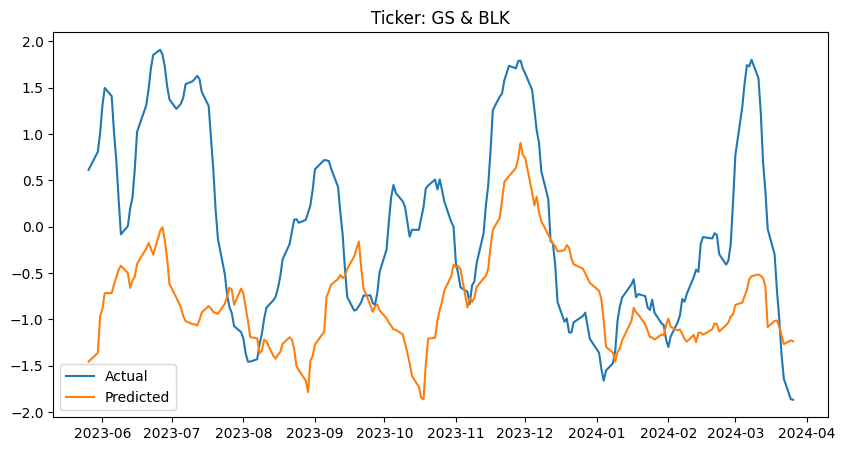

In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error
# Assuming `model` is your trained model and `X_test_seq` is your sequence data
y_pred = model_grid.predict(X_test_seq)

y_pred = y_pred.flatten()

y_test_seq = y_test[-len(y_pred):] 

fig = plt.figure(figsize=(10, 5))
plt.plot(y_test_seq.index, y_test_seq, label="Actual")
plt.plot(y_test_seq.index, y_pred, label="Predicted")
# Add the name of the ticker to the plot
plt.title("Ticker: " + pair[0] + " & " + pair[1])
plt.legend()

plt.legend()

# Calculate R-squared
r2 = r2_score(y_test_seq , y_pred)
print("R-squared:", r2)

# Calculate MAPE
mape = np.mean(np.abs((y_test_seq  - y_pred) / y_test_seq)) * 100
print("MAPE:", mape)

# Calculate MAE
mae = mean_absolute_error(y_test_seq, y_pred)
print("MAE:", mae)

plt.show()

In [ ]:
X_test["Adj Close_S1"][-len(y_pred):] 

Try all tickers with best configuration

['GS' 'BLK']
------Dataset Information------
Set      Size
-----  ------
Train     457
Val        76
Test      229


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


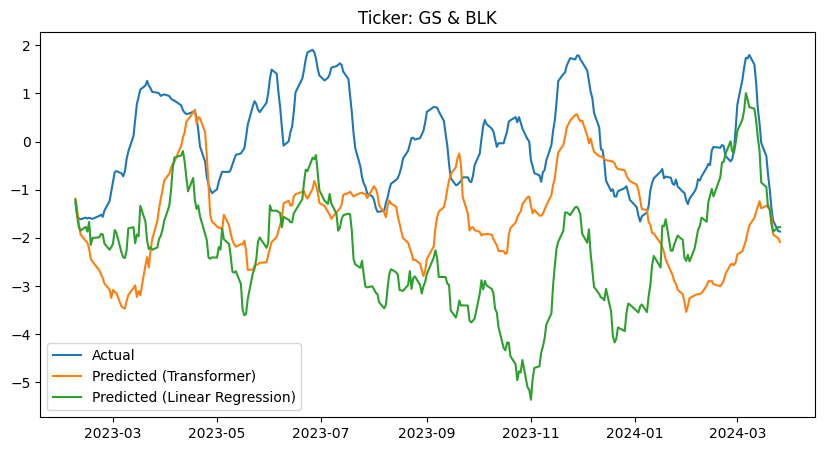

               Model  R-squared         MAPE       MAE
0        Transformer  -3.115060   793.216410  1.668923
1  Linear Regression  -5.721832  1764.020545  2.242046
['JPM' 'CRM']
------Dataset Information------
Set      Size
-----  ------
Train     451
Val        75
Test      227


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


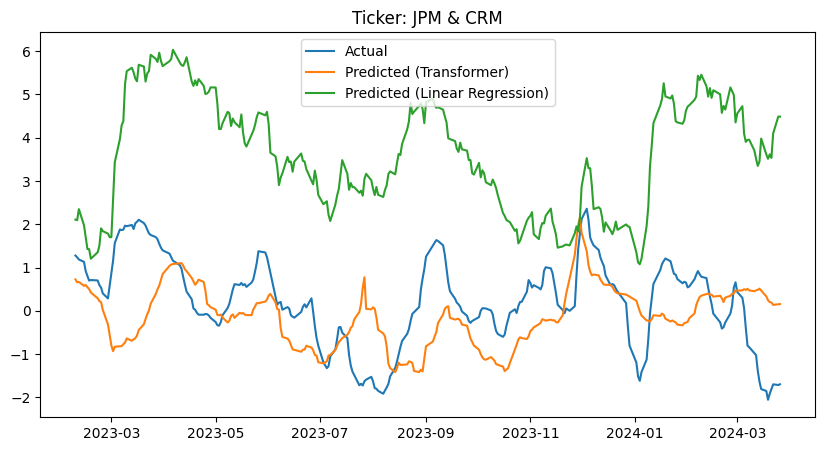

               Model  R-squared          MAPE       MAE
0        Transformer  -0.237063   6240.718371  0.900196
1  Linear Regression -12.105463  13712.126343  3.371235
['HON' 'GS']
------Dataset Information------
Set      Size
-----  ------
Train     447
Val        74
Test      224


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


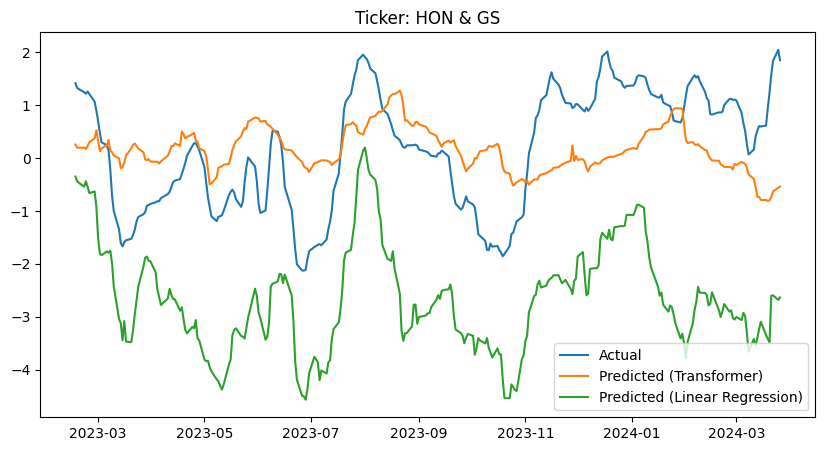

               Model  R-squared        MAPE       MAE
0        Transformer  -0.002726  150.282932  0.973409
1  Linear Regression  -6.049973  719.548410  2.837723
['HON' 'BLK']
------Dataset Information------
Set      Size
-----  ------
Train     447
Val        74
Test      224


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


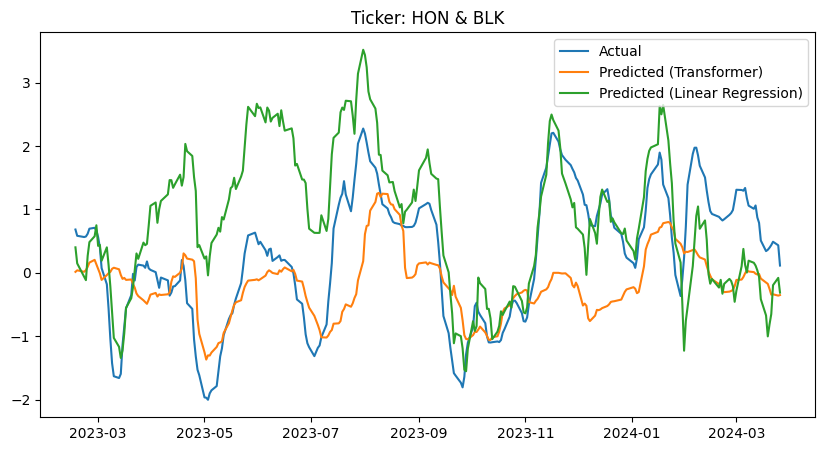

               Model  R-squared        MAPE       MAE
0        Transformer   0.103878  136.383783  0.769805
1  Linear Regression  -0.315409  386.410180  0.931739
['JPM' 'GS']
------Dataset Information------
Set      Size
-----  ------
Train     456
Val        76
Test      228


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


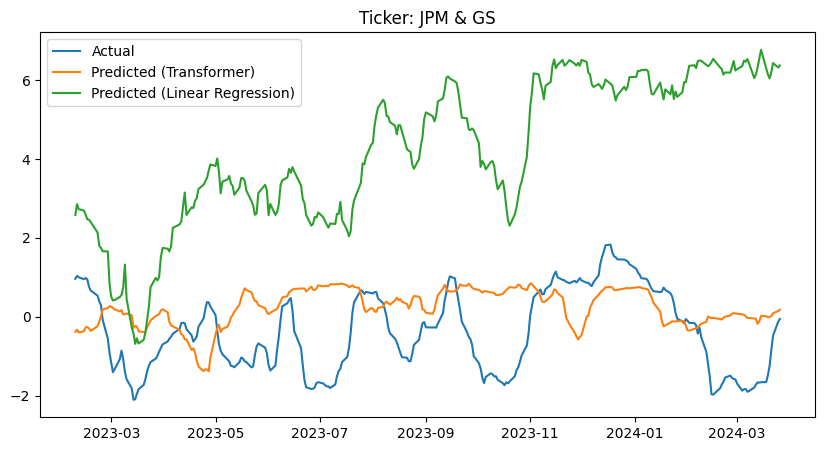

               Model  R-squared         MAPE       MAE
0        Transformer  -0.575583   188.541047  1.067243
1  Linear Regression -22.202571  1491.172330  4.574911
['WFC' 'AXP']
------Dataset Information------
Set      Size
-----  ------
Train     433
Val        72
Test      217


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


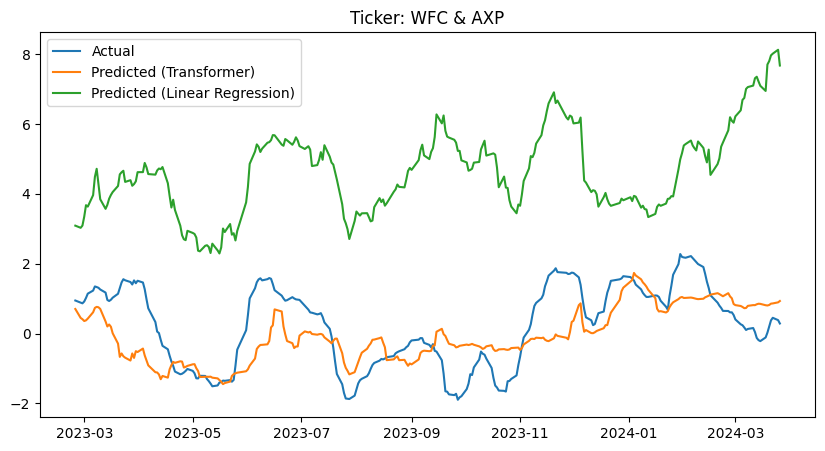

               Model  R-squared         MAPE       MAE
0        Transformer   0.326230   157.208892  0.767946
1  Linear Regression -15.207338  1113.530898  4.442778
['WFC' 'GS']
------Dataset Information------
Set      Size
-----  ------
Train     444
Val        74
Test      222


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


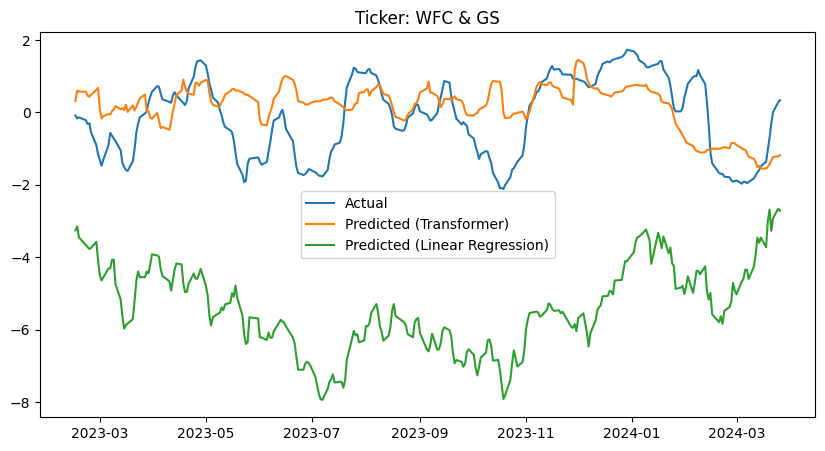

               Model  R-squared         MAPE       MAE
0        Transformer   0.029376   274.305827  0.870043
1  Linear Regression -23.973372  2173.052925  5.264551
['HON' 'C']
------Dataset Information------
Set      Size
-----  ------
Train     426
Val        71
Test      213


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


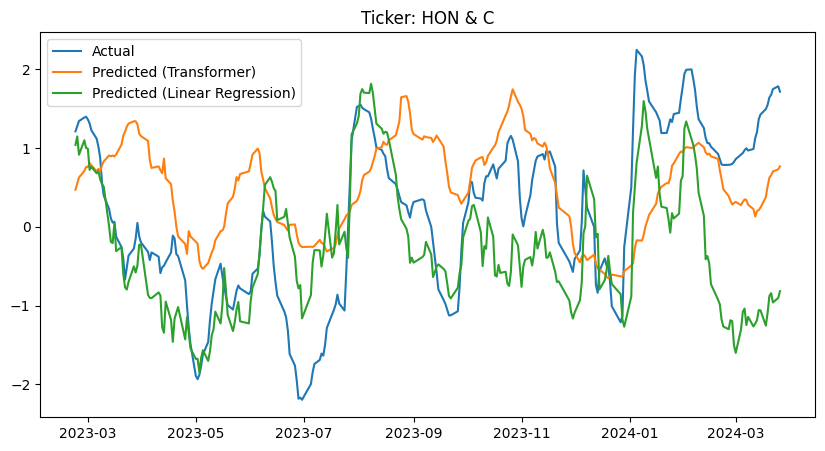

               Model  R-squared        MAPE       MAE
0        Transformer   0.072357  572.707771  0.852757
1  Linear Regression   0.017893  314.608152  0.795329
['UNP' 'AXP']
------Dataset Information------
Set      Size
-----  ------
Train     402
Val        67
Test      201


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


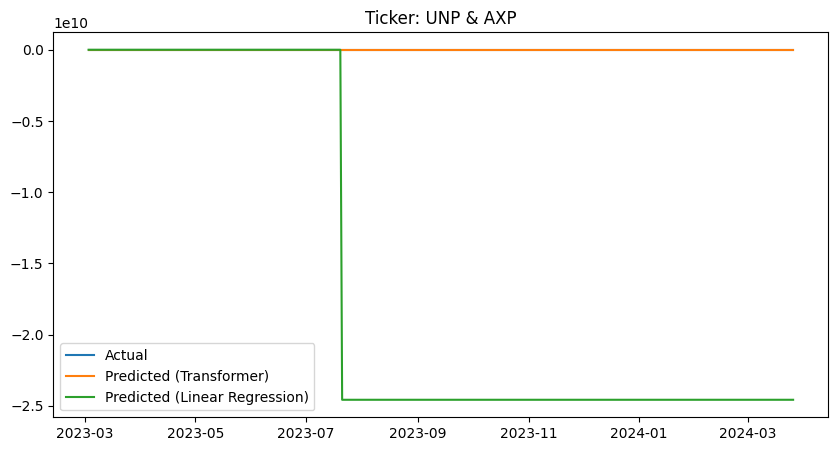

               Model     R-squared          MAPE           MAE
0        Transformer -3.328058e-01  1.705510e+02  1.170135e+00
1  Linear Regression -2.826895e+20  4.877908e+12  1.575899e+10
['WFC' 'MS']
------Dataset Information------
Set      Size
-----  ------
Train     324
Val        54
Test      162


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


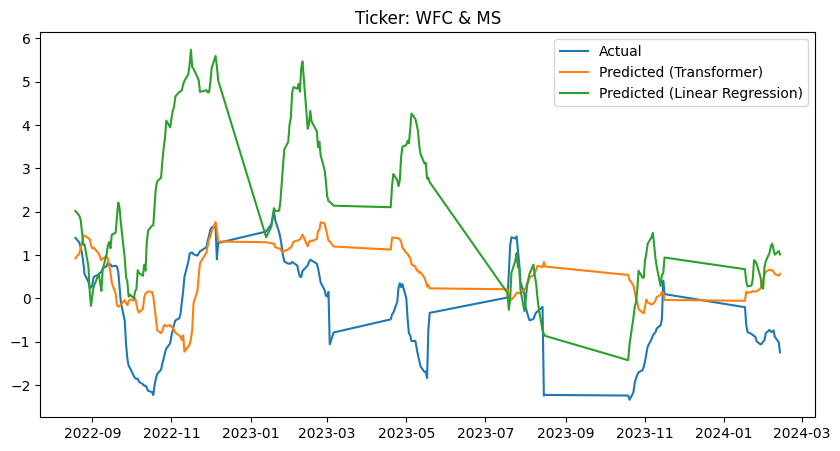

               Model  R-squared         MAPE       MAE
0        Transformer  -0.222844   360.904599  1.031184
1  Linear Regression  -5.619980  1035.158961  2.387633
['INTC' 'FDX']
------Dataset Information------
Set      Size
-----  ------
Train     427
Val        71
Test      214


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


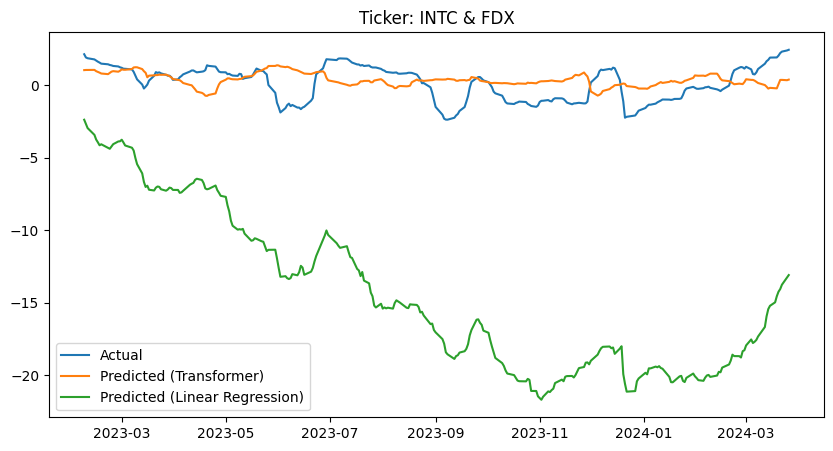

               Model   R-squared         MAPE        MAE
0        Transformer   -0.235454   166.007963   1.094407
1  Linear Regression -168.337705  3062.875360  14.550190
['JPM' 'GOOGL']
------Dataset Information------
Set      Size
-----  ------
Train     456
Val        76
Test      228


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


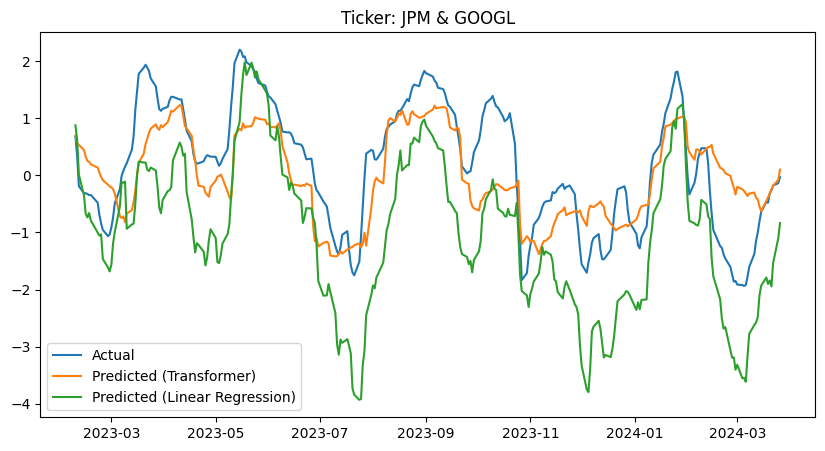

               Model  R-squared        MAPE       MAE
0        Transformer   0.498025  152.865893  0.618285
1  Linear Regression  -0.588817  301.590790  1.227004
['INTC' 'BLK']
------Dataset Information------
Set      Size
-----  ------
Train     457
Val        76
Test      229


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


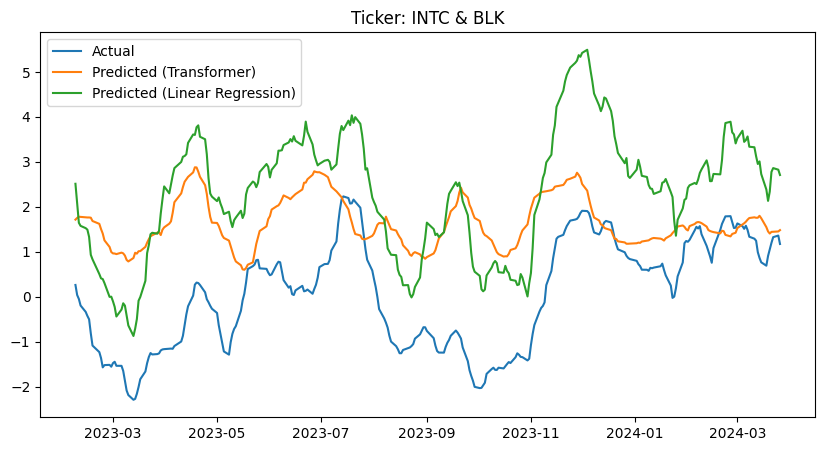

               Model  R-squared        MAPE       MAE
0        Transformer  -1.692691  678.308069  1.648845
1  Linear Regression  -2.896310  881.611670  2.263803
['MS' 'BLK']
------Dataset Information------
Set      Size
-----  ------
Train     334
Val        55
Test      169


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


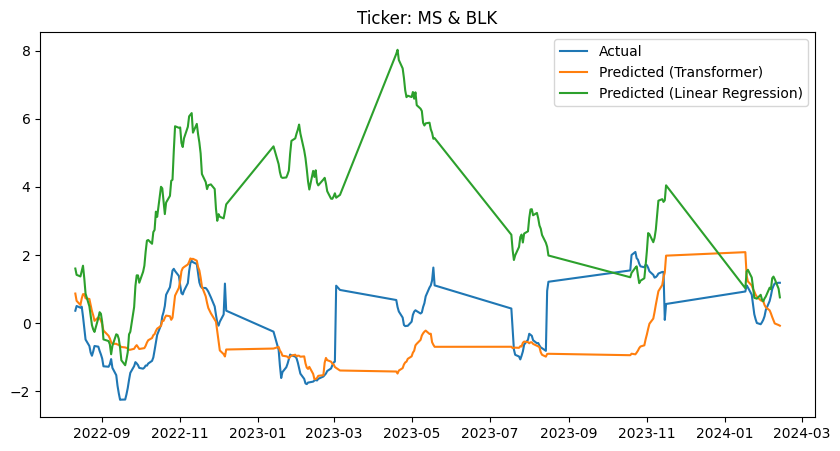

               Model  R-squared        MAPE       MAE
0        Transformer   0.205934  228.981715  0.774712
1  Linear Regression -10.123836  934.908448  3.180922
['MS' 'GS']
------Dataset Information------
Set      Size
-----  ------
Train     334
Val        55
Test      169


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


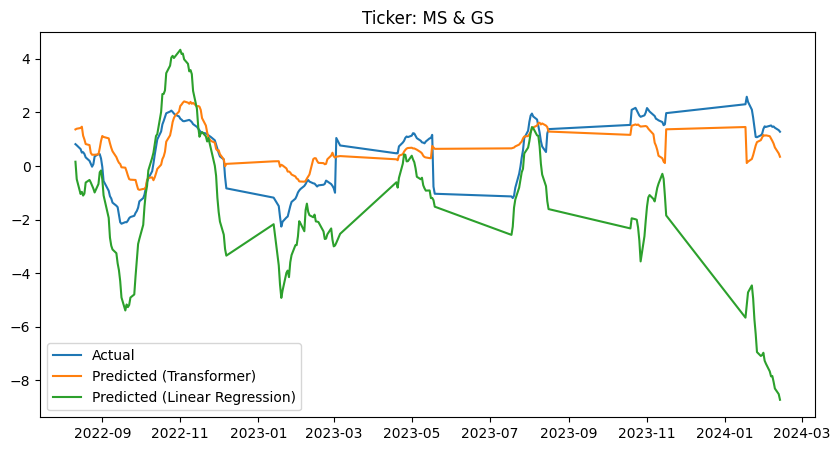

               Model  R-squared        MAPE       MAE
0        Transformer   0.426239  121.202025  0.785924
1  Linear Regression  -5.426160  238.536188  2.314003
['CRM' 'BLK']
------Dataset Information------
Set      Size
-----  ------
Train     453
Val        75
Test      227


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


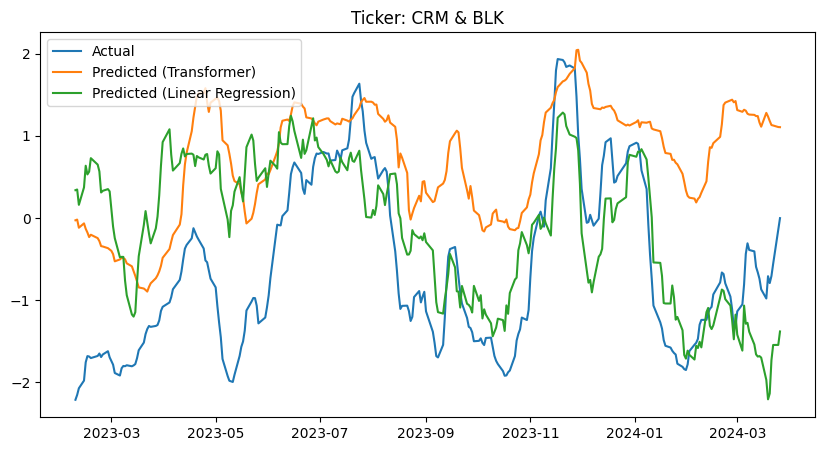

               Model  R-squared        MAPE       MAE
0        Transformer  -1.055491  643.203698  1.313988
1  Linear Regression  -0.024359  480.984545  0.835345
['GOOGL' 'CRM']
------Dataset Information------
Set      Size
-----  ------
Train     453
Val        75
Test      227


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


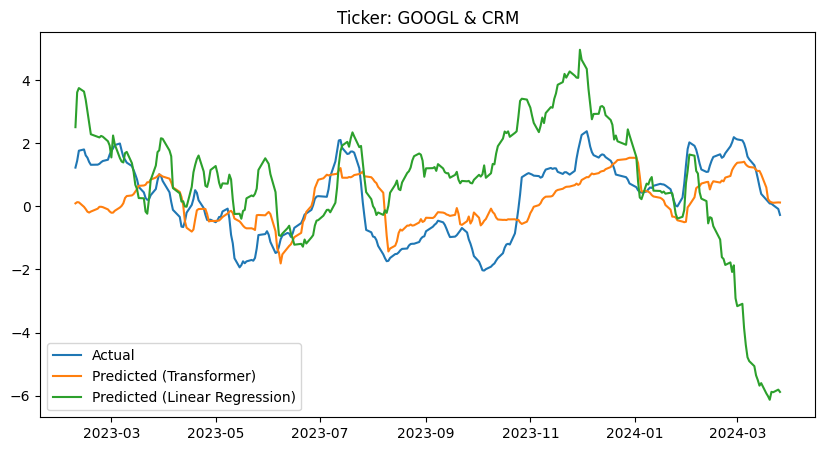

               Model  R-squared        MAPE       MAE
0        Transformer   0.440214  745.073754  0.739292
1  Linear Regression  -2.638546  939.905663  1.749254
['INTC' 'HON']
------Dataset Information------
Set      Size
-----  ------
Train     447
Val        74
Test      224


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


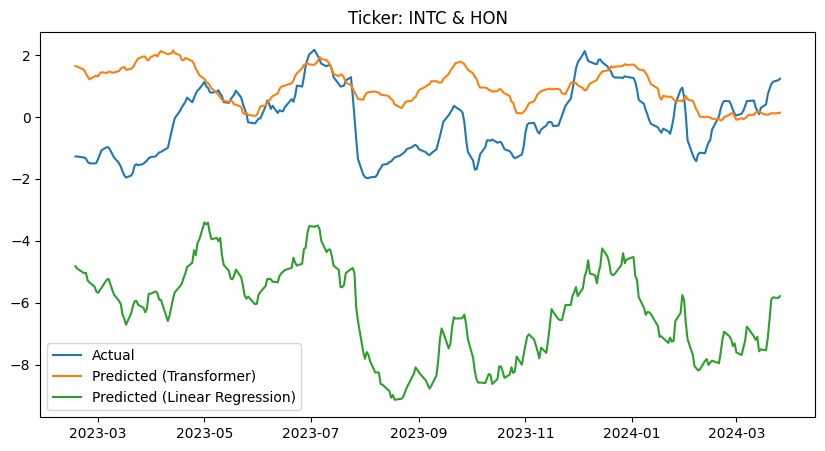

               Model  R-squared         MAPE       MAE
0        Transformer  -1.223752   261.622756  1.254755
1  Linear Regression -33.441283  1930.302415  6.229950
['GOOGL' 'AXP']
------Dataset Information------
Set      Size
-----  ------
Train     445
Val        74
Test      223


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


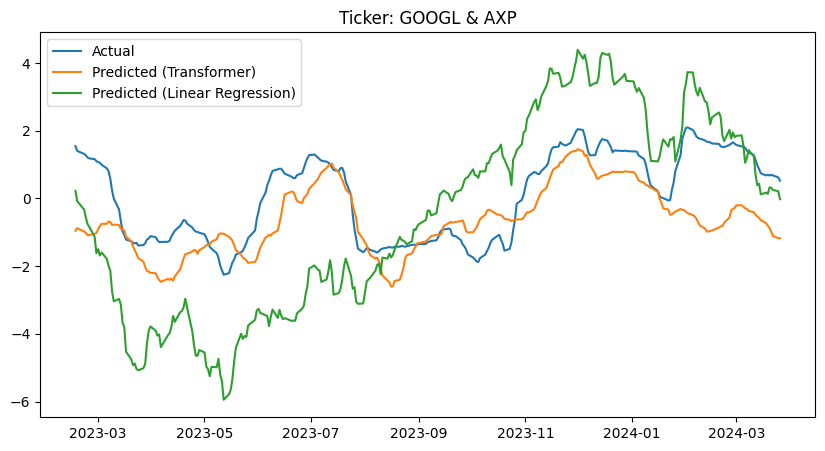

               Model  R-squared        MAPE       MAE
0        Transformer   0.202812  184.144755  0.907736
1  Linear Regression  -2.433670  633.643265  2.067852
['WFC' 'GOOGL']
------Dataset Information------
Set      Size
-----  ------
Train     444
Val        74
Test      222


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


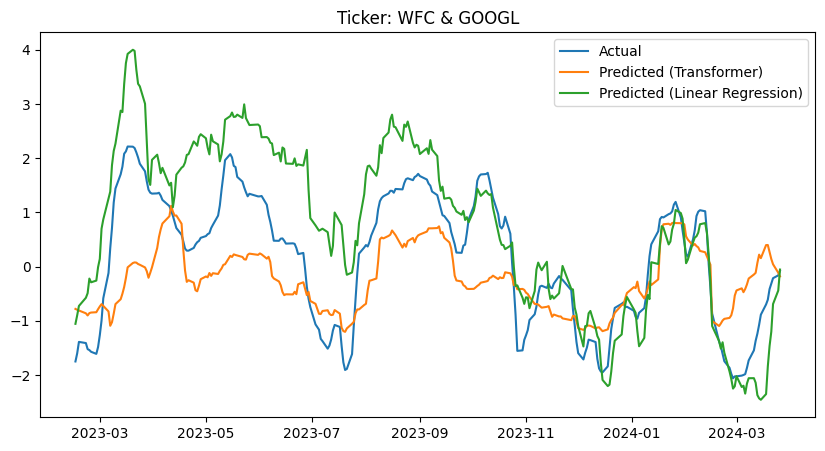

               Model  R-squared        MAPE       MAE
0        Transformer   0.334453   98.051430  0.808671
1  Linear Regression   0.270496  136.536075  0.831070
['GOOGL' 'BLK']
------Dataset Information------
Set      Size
-----  ------
Train     457
Val        76
Test      229


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


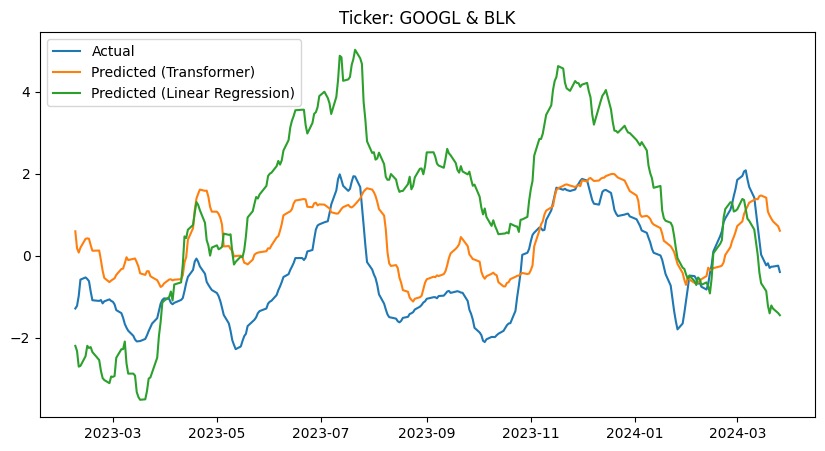

               Model  R-squared        MAPE       MAE
0        Transformer   0.145499  223.073665  0.948198
1  Linear Regression  -2.502309  434.724868  2.014695
['JPM' 'HON']
------Dataset Information------
Set      Size
-----  ------
Train     445
Val        74
Test      224


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


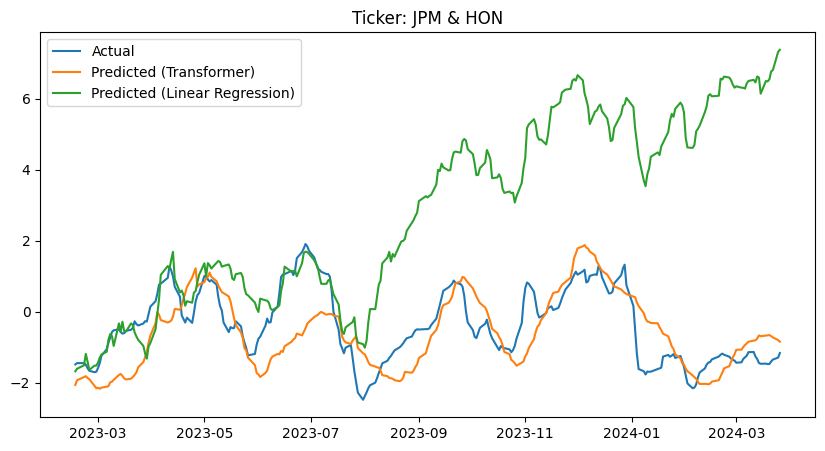

               Model  R-squared         MAPE       MAE
0        Transformer   0.224072   244.298340  0.720991
1  Linear Regression -16.391649  1158.294522  3.315719
['MS' 'HON']
------Dataset Information------
Set      Size
-----  ------
Train     324
Val        54
Test      163


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


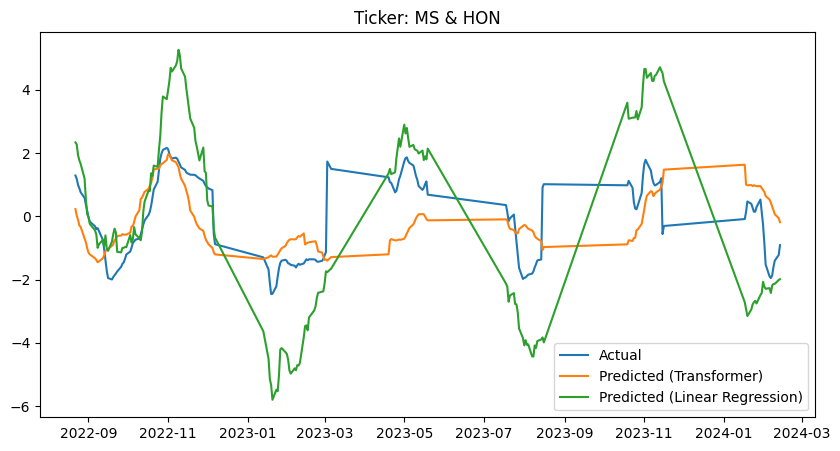

               Model  R-squared        MAPE       MAE
0        Transformer   0.204022  165.858818  0.988188
1  Linear Regression  -1.617243  299.490229  1.739683


In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error

resultsby_pair = {}
metric_pair = {}

for ii in range(30):
    resultsby_metric = {}
    # Pair Selection
    PAIR_IDX = ii
    ADD_SENTIMENT_MA = False

    if ii in [2, 3, 10, 13, 15, 25, 27]:
        continue

    pair = pairs[PAIR_IDX]
    print(pair)

    data = {key.replace('price_history/', ''): value for key, value in data.items()}

    # Join Sentiment and add Sentiment Moving Averages if ADD_SENTIMENT_MA is True
    pair_sentiment_df = pd.merge( data[pair[0]].sentiment, data[pair[1]].sentiment, left_index=True, right_index=True, suffixes=("_S1", "_S2"),)
    if ADD_SENTIMENT_MA:
        pair_sentiment_df = add_moving_averages(pair_sentiment_df, [5, 10, 20, 40], columns=pair_sentiment_df.columns)

    # Join Technical Indicators
    pair_ti_df = pd.merge( data[pair[0]].ti, data[pair[1]].ti, left_index=True, right_index=True, suffixes=("_S1", "_S2"))
    pair_df = pd.merge(pair_ti_df, pair_sentiment_df, left_index=True, right_index=True, how="left")


    SPREAD_WINDOW = None
    MA_HIGH = 45
    MA_LOW = 5

    pair_df = calculate_spread(pair_df, SPREAD_WINDOW, MA_HIGH, MA_LOW, int(len(pair_df)*0.6 )).dropna()

    # --- Feature Selection Setup ---

    # Parameters
    LOOK_BACK = 2
    DROP_COLS = [
    
    ]

    train_data, val_data, test_data = create_dataset(
        pair_df, 
        look_back=LOOK_BACK, 
        target_col="zscore_spread", 
        drop_cols=DROP_COLS
    )

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset(train_data, val_data, test_data)

    resultsby_metric["Adj Close_S1"] = X_test["Adj Close_S1"][-len(y_pred):] 
    resultsby_metric["Adj Close_S2"] = X_test["Adj Close_S2"][-len(y_pred):] 

    # Combine val and test data since were not using Deep learning or hyper-param tuning 
    X_test = pd.concat([X_val, X_test])
    y_test = pd.concat([y_val, y_test])

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    time_steps = 20 # Define sequence length
    X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

    # Model parameters
    input_shape = X_train_seq.shape[1:]

    # Build model
    model_grid = build_transformer_model(input_shape, ff_dim=X_train.shape[1])
    # Compile the model
    model_grid.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

    # Train the model
    history = model_grid.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

    # Assuming `model` is your trained model and `X_test_seq` is your sequence data
    y_pred = model_grid.predict(X_test_seq)

    y_pred = y_pred.flatten()

    y_test_seq = y_test[-len(y_pred):] 


    # Build linear regression model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Predict using the linear regression model
    y_pred_regression = regression_model.predict(X_test)
    y_pred_regression = y_pred_regression[-len(y_pred):] 

    fig = plt.figure(figsize=(10, 5))
    plt.plot(y_test_seq.index, y_test_seq, label="Actual")
    plt.plot(y_test_seq.index, y_pred, label="Predicted (Transformer)")
    # Add the predicted results to the graph
    plt.plot(y_test_seq.index, y_pred_regression, label="Predicted (Linear Regression)")
    plt.title("Ticker: " + pair[0] + " & " + pair[1])
    plt.legend()
    plt.show()

    # Create a DataFrame to store the metrics
    metrics_df = pd.DataFrame(columns=['Model', 'R-squared', 'MAPE', 'MAE'])

    # Calculate metrics for the Transformer model
    r2_transformer = r2_score(y_test_seq, y_pred)
    mape_transformer = np.mean(np.abs((y_test_seq - y_pred) /y_test_seq)) * 100
    mae_transformer = mean_absolute_error(y_test_seq, y_pred)

    resultsby_metric["Y_pred"] = y_pred
    resultsby_metric["Y_test"] = y_test_seq
        
        # Calculate metrics for the Linear Regression model
    r2_regression = r2_score(y_test_seq, y_pred_regression)
    mape_regression = np.mean(np.abs((y_test_seq - y_pred_regression) / y_test_seq)) * 100
    mae_regression = mean_absolute_error(y_test_seq, y_pred_regression)

        # Add metrics to the DataFrame
    metrics_df.loc[0] = ['Transformer', r2_transformer, mape_transformer, mae_transformer]
    metrics_df.loc[1] = ['Linear Regression', r2_regression, mape_regression, mae_regression]

        # Display the metrics table
    print(metrics_df)
    
    metric_pair[ii] = metrics_df
    resultsby_pair[ii] = resultsby_metric




['GS' 'BLK']
------Dataset Information------
Set      Size  Date Cutoff
-----  ------  -------------
Train     457  2023-01-09
Val        76  2023-12-06
Test      229  2023-04-28


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


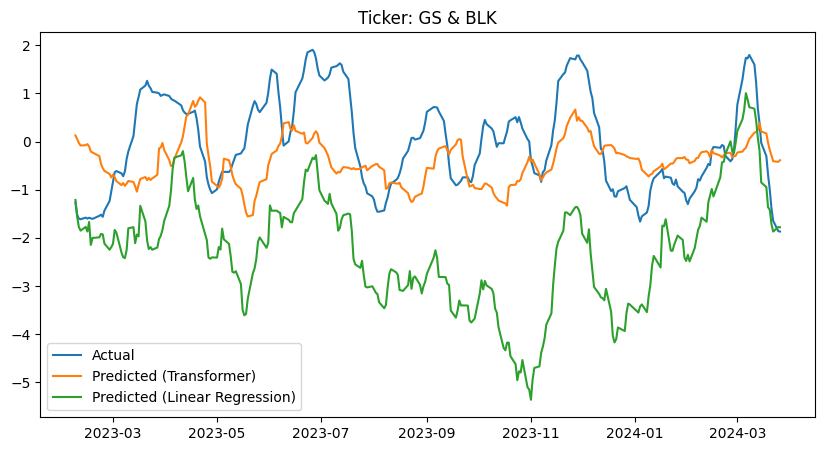

               Model  R-squared         MAPE       MAE
0        Transformer  -0.161624   300.258721  0.872016
1  Linear Regression  -5.721832  1764.020545  2.242046
['JPM' 'CRM']
------Dataset Information------
Set      Size  Date Cutoff
-----  ------  -------------
Train     451  2023-01-10
Val        75  2023-12-06
Test      227  2023-05-01


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


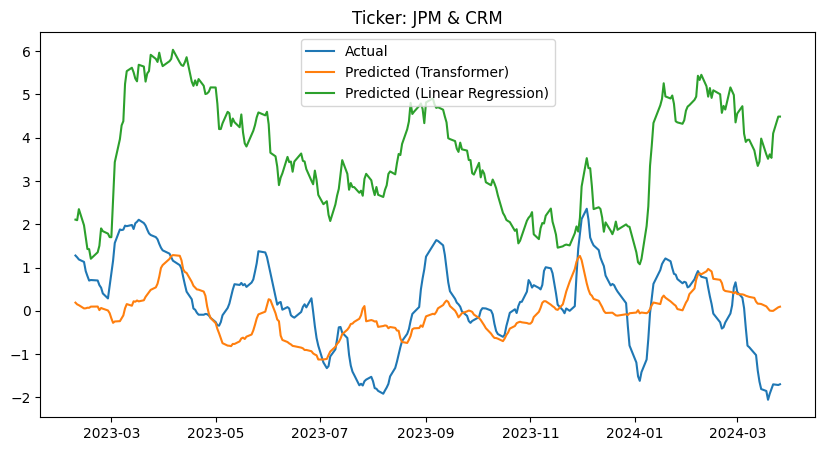

               Model  R-squared          MAPE       MAE
0        Transformer   0.088407   5452.588717  0.789817
1  Linear Regression -12.105463  13712.126343  3.371235
['HON' 'GS']
------Dataset Information------
Set      Size  Date Cutoff
-----  ------  -------------
Train     447  2023-01-19
Val        74  2023-12-08
Test      224  2023-05-05


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_23724\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


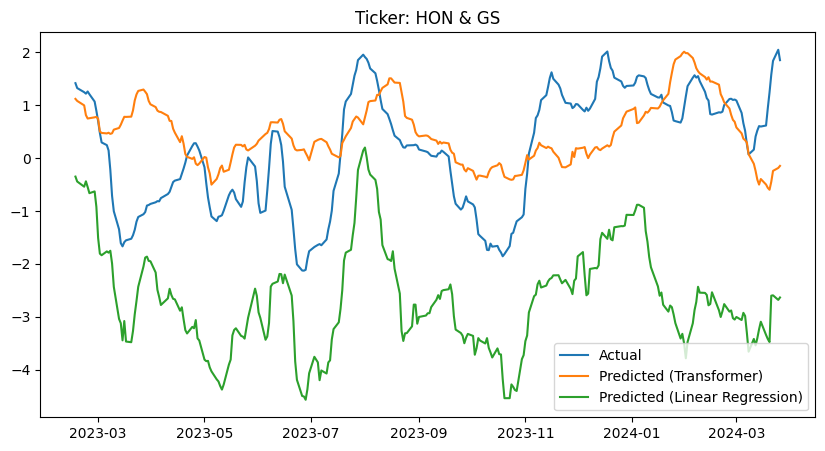

               Model  R-squared        MAPE       MAE
0        Transformer   0.045229  121.944122  0.892230
1  Linear Regression  -6.049973  719.548410  2.837723


In [40]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error

resultsby_pair = {}
metric_pair = {}

for ii in range(5):
    resultsby_metric = {}
    # Pair Selection
    PAIR_IDX = ii
    ADD_SENTIMENT_MA = False

    if ii in [2, 3, 10, 13, 15, 25, 27]:
        continue

    pair = pairs[PAIR_IDX]
    print(pair)

    data = {key.replace('price_history/', ''): value for key, value in data.items()}

    # Join Sentiment and add Sentiment Moving Averages if ADD_SENTIMENT_MA is True
    pair_sentiment_df = pd.merge( data[pair[0]].sentiment, data[pair[1]].sentiment, left_index=True, right_index=True, suffixes=("_S1", "_S2"),)
    if ADD_SENTIMENT_MA:
        pair_sentiment_df = add_moving_averages(pair_sentiment_df, [5, 10, 20, 40], columns=pair_sentiment_df.columns)

    # Join Technical Indicators
    pair_ti_df = pd.merge( data[pair[0]].ti, data[pair[1]].ti, left_index=True, right_index=True, suffixes=("_S1", "_S2"))
    pair_df = pd.merge(pair_ti_df, pair_sentiment_df, left_index=True, right_index=True, how="left")


    SPREAD_WINDOW = None
    MA_HIGH = 45
    MA_LOW = 5

    pair_df = calculate_spread(pair_df, SPREAD_WINDOW, MA_HIGH, MA_LOW, int(len(pair_df)*0.6 )).dropna()

    # --- Feature Selection Setup ---

    # Parameters
    LOOK_BACK = 2
    DROP_COLS = [
    
    ]

    train_data, val_data, test_data = create_dataset(
        pair_df, 
        look_back=LOOK_BACK, 
        target_col="zscore_spread", 
        drop_cols=DROP_COLS
    )

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset(train_data, val_data, test_data)

    resultsby_metric["Adj Close_S1"] = X_test["Adj Close_S1"][-len(y_pred):] 
    resultsby_metric["Adj Close_S2"] = X_test["Adj Close_S2"][-len(y_pred):] 

    # Combine val and test data since were not using Deep learning or hyper-param tuning 
    X_test = pd.concat([X_val, X_test])
    y_test = pd.concat([y_val, y_test])

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    time_steps = 20 # Define sequence length
    X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

    # Model parameters
    input_shape = X_train_seq.shape[1:]

    # Build model
    model_grid = build_transformer_model(input_shape, ff_dim=X_train.shape[1])
    # Compile the model
    model_grid.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

    # Train the model
    history = model_grid.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

    # Assuming `model` is your trained model and `X_test_seq` is your sequence data
    y_pred = model_grid.predict(X_test_seq)

    y_pred = y_pred.flatten()

    y_test_seq = y_test[-len(y_pred):] 


    # Build linear regression model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Predict using the linear regression model
    y_pred_regression = regression_model.predict(X_test)
    y_pred_regression = y_pred_regression[-len(y_pred):] 

    fig = plt.figure(figsize=(10, 5))
    plt.plot(y_test_seq.index, y_test_seq, label="Actual")
    plt.plot(y_test_seq.index, y_pred, label="Predicted (Transformer)")
    # Add the predicted results to the graph
    plt.plot(y_test_seq.index, y_pred_regression, label="Predicted (Linear Regression)")
    plt.title("Ticker: " + pair[0] + " & " + pair[1])
    plt.legend()
    plt.show()

    # Create a DataFrame to store the metrics
    metrics_df = pd.DataFrame(columns=['Model', 'R-squared', 'MAPE', 'MAE'])

    # Calculate metrics for the Transformer model
    r2_transformer = r2_score(y_test_seq, y_pred)
    mape_transformer = np.mean(np.abs((y_test_seq - y_pred) /y_test_seq)) * 100
    mae_transformer = mean_absolute_error(y_test_seq, y_pred)

    resultsby_metric["Y_pred"] = y_pred
    resultsby_metric["Y_test"] = y_test_seq
    resultsby_metric["X_test_seq"] = X_test_seq
    resultsby_metric["X_test"] = X_test
    resultsby_metric["Model"] = model_grid
        
        # Calculate metrics for the Linear Regression model
    r2_regression = r2_score(y_test_seq, y_pred_regression)
    mape_regression = np.mean(np.abs((y_test_seq - y_pred_regression) / y_test_seq)) * 100
    mae_regression = mean_absolute_error(y_test_seq, y_pred_regression)

        # Add metrics to the DataFrame
    metrics_df.loc[0] = ['Transformer', r2_transformer, mape_transformer, mae_transformer]
    metrics_df.loc[1] = ['Linear Regression', r2_regression, mape_regression, mae_regression]

        # Display the metrics table
    print(metrics_df)
    
    metric_pair[ii] = metrics_df
    resultsby_pair[ii] = resultsby_metric


In [37]:
import pickle
X_testby_pair
# Specify the file path to save the pickle file
pickle_file_path = 'X_testby_pair.pickle'

# Save X_testby_pair to the pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(X_testby_pair, file)


In [19]:
import pickle
resultsby_pair
# Specify the file path to save the pickle file
pickle_file_path = "resultsby_pair.pkl"

# Save the resultsby_pair dictionary to the pickle file
with open(pickle_file_path, "wb") as file:
    pickle.dump(resultsby_pair, file)


In [24]:
metric_pair
# Combine all individual DataFrames into a single DataFrame
all_data = pd.concat(metric_pair.values())

# Calculate average metrics for each model
average_metrics = all_data.groupby('Model').mean()

average_metrics

R-squared          MAPE           MAE
Model                                                      
Linear Regression -1.229085e+19  2.120830e+11  6.851737e+08
Transformer       -2.382765e-01  5.633702e+02  9.858971e-01

['HON' 'GS']
------Dataset Information------
Set      Size
-----  ------
Train     361
Val        60
Test      181


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step


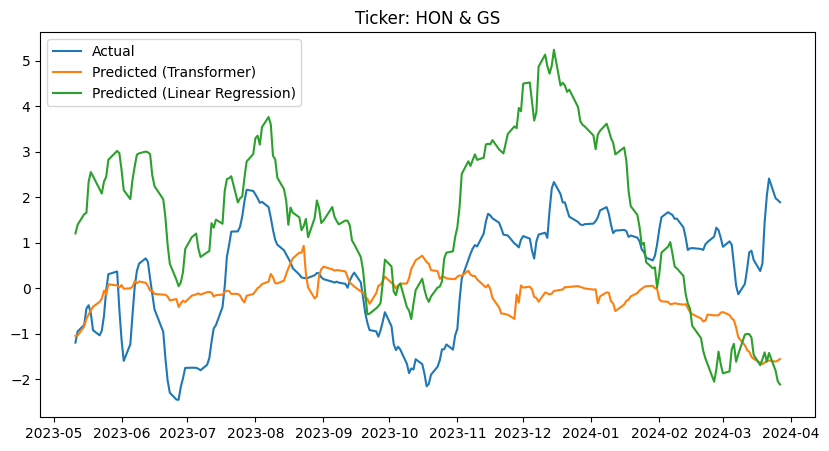

               Model  R-squared        MAPE       MAE
0        Transformer  -0.512712  146.162425  1.273964
1  Linear Regression  -2.035834  422.912228  1.916528
['HON' 'BLK']
------Dataset Information------
Set      Size
-----  ------
Train     361
Val        60
Test      181


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step


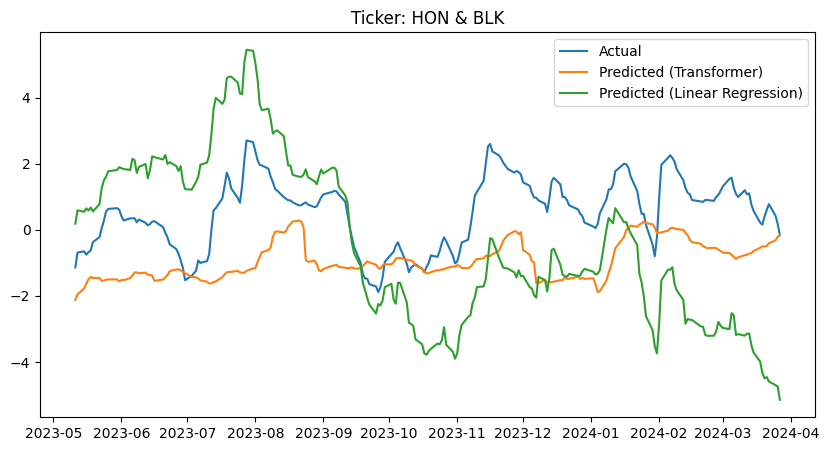

               Model  R-squared         MAPE       MAE
0        Transformer  -1.757720   887.280914  1.501835
1  Linear Regression  -5.198267  1537.848220  2.323882
['JPM' 'GS']
------Dataset Information------
Set      Size
-----  ------
Train     442
Val        73
Test      223


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step


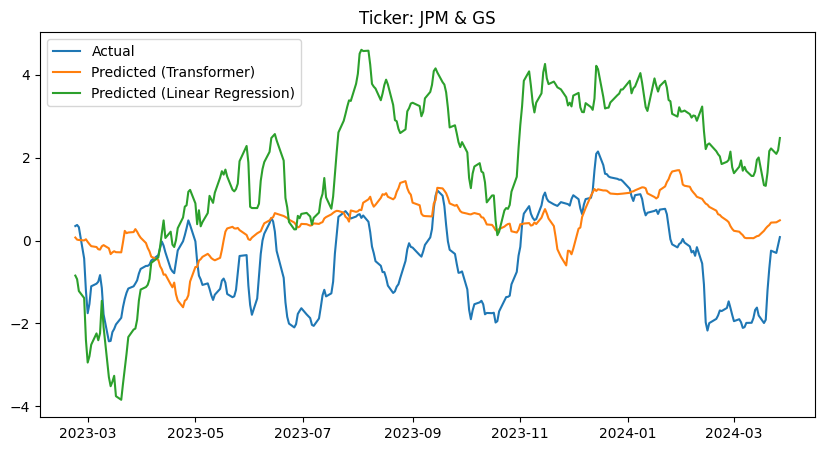

               Model  R-squared         MAPE       MAE
0        Transformer  -0.675933   409.117461  1.166300
1  Linear Regression  -5.360676  1239.874753  2.527253
['WFC' 'AXP']
------Dataset Information------
Set      Size
-----  ------
Train     347
Val        57
Test      175


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


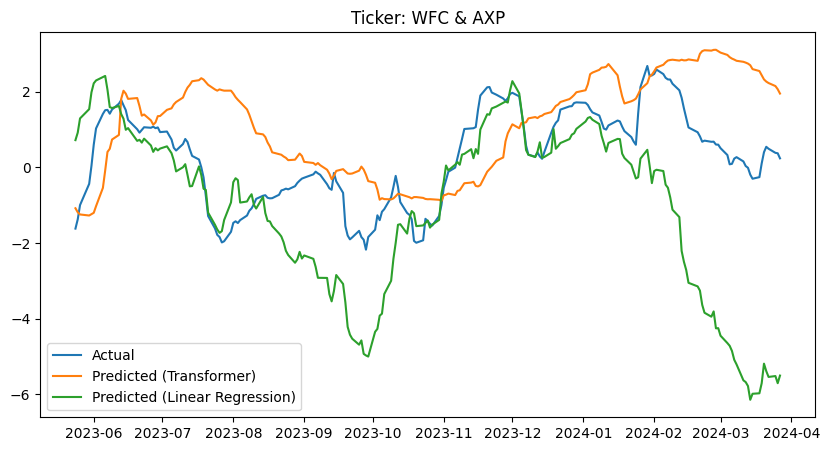

               Model  R-squared        MAPE       MAE
0        Transformer  -0.653093  620.788286  1.264477
1  Linear Regression  -2.716696  751.841721  1.631713
['WFC' 'GS']
------Dataset Information------
Set      Size
-----  ------
Train     347
Val        57
Test      175


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step


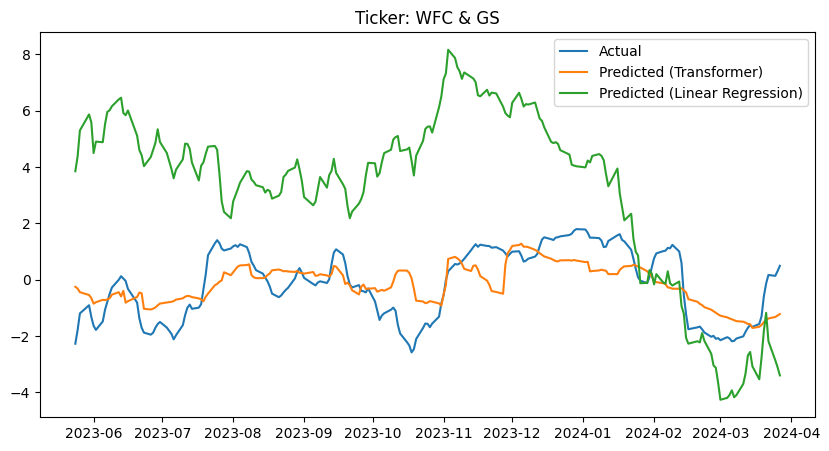

               Model  R-squared         MAPE       MAE
0        Transformer   0.469518   171.646075  0.741266
1  Linear Regression -11.973939  1812.257625  3.899142
['HON' 'C']
------Dataset Information------
Set      Size
-----  ------
Train       0
Val         0
Test        0


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].rolling(window=ma).mean()
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].rolling(window=ma).mean()
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

ValueError: Found array with 0 sample(s) (shape=(0, 378)) while a minimum of 1 is required by StandardScaler.

In [367]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error

for ii in range(4, 30):
    resultsby_metric = {}
    # Pair Selection
    PAIR_IDX = ii
    ADD_SENTIMENT_MA = True

    pair = pairs[PAIR_IDX]
    print(pair)

    data = {key.replace('price_history/', ''): value for key, value in data.items()}

    # Join Sentiment and add Sentiment Moving Averages if ADD_SENTIMENT_MA is True
    pair_sentiment_df = pd.merge( data[pair[0]].sentiment, data[pair[1]].sentiment, left_index=True, right_index=True, suffixes=("_S1", "_S2"),)
    if ADD_SENTIMENT_MA:
        pair_sentiment_df = add_moving_averages(pair_sentiment_df, [5, 10, 20, 40, 80], columns=pair_sentiment_df.columns)

    # Join Technical Indicators
    pair_ti_df = pd.merge( data[pair[0]].ti, data[pair[1]].ti, left_index=True, right_index=True, suffixes=("_S1", "_S2"))
    pair_df = pd.merge(pair_ti_df, pair_sentiment_df, left_index=True, right_index=True, how="left")


    SPREAD_WINDOW = None
    MA_HIGH = 45
    MA_LOW = 3

    pair_df = calculate_spread(pair_df, SPREAD_WINDOW, MA_HIGH, MA_LOW, int(len(pair_df)*0.6 )).dropna()

    # --- Feature Selection Setup ---

    # Parameters
    LOOK_BACK = 1
    DROP_COLS = [
    
    ]

    train_data, val_data, test_data = create_dataset(
        pair_df, 
        look_back=LOOK_BACK, 
        target_col="zscore_spread", 
        drop_cols=DROP_COLS
    )

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset(train_data, val_data, test_data)

    resultsby_metric["Adj Close_S1"] = X_test["Adj Close_S1"][-len(y_pred):] 
    resultsby_metric["Adj Close_S2"] = X_test["Adj Close_S2"][-len(y_pred):] 

    # Combine val and test data since were not using Deep learning or hyper-param tuning 
    X_test = pd.concat([X_val, X_test])
    y_test = pd.concat([y_val, y_test])

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    time_steps = 20 # Define sequence length
    X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

    # Model parameters
    input_shape = X_train_seq.shape[1:]

    # Build model
    model_grid = build_transformer_model(input_shape, ff_dim=282)
    # Compile the model
    model_grid.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

    # Train the model
    history = model_grid.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

    # Assuming `model` is your trained model and `X_test_seq` is your sequence data
    y_pred = model_grid.predict(X_test_seq)

    y_pred = y_pred.flatten()

    y_test_seq = y_test[-len(y_pred):] 

    

    # Build linear regression model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Predict using the linear regression model
    y_pred_regression = regression_model.predict(X_test)
    y_pred_regression = y_pred_regression[-len(y_pred):] 

    fig = plt.figure(figsize=(10, 5))
    plt.plot(y_test_seq.index, y_test_seq, label="Actual")
    plt.plot(y_test_seq.index, y_pred, label="Predicted (Transformer)")
    # Add the predicted results to the graph
    plt.plot(y_test_seq.index, y_pred_regression, label="Predicted (Linear Regression)")
    plt.title("Ticker: " + pair[0] + " & " + pair[1])
    plt.legend()
    plt.show()

    # Create a DataFrame to store the metrics
    metrics_df = pd.DataFrame(columns=['Model', 'R-squared', 'MAPE', 'MAE'])

    # Calculate metrics for the Transformer model
    r2_transformer = r2_score(y_test_seq, y_pred)
    mape_transformer = np.mean(np.abs((y_test_seq - y_pred) /y_test_seq)) * 100
    mae_transformer = mean_absolute_error(y_test_seq, y_pred)

    resultsby_metric["Y_pred"] = y_pred
    resultsby_metric["Y_test"] = y_test_seq
        
        # Calculate metrics for the Linear Regression model
    r2_regression = r2_score(y_test_seq, y_pred_regression)
    mape_regression = np.mean(np.abs((y_test_seq - y_pred_regression) / y_test_seq)) * 100
    mae_regression = mean_absolute_error(y_test_seq, y_pred_regression)

        # Add metrics to the DataFrame
    metrics_df.loc[0] = ['Transformer', r2_transformer, mape_transformer, mae_transformer]
    metrics_df.loc[1] = ['Linear Regression', r2_regression, mape_regression, mae_regression]

        # Display the metrics table
    print(metrics_df)

    resultsby_pair[ii] = resultsby_metric




['WFC' 'MS']
------Dataset Information------
Set      Size
-----  ------
Train     347
Val        57
Test      175


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step


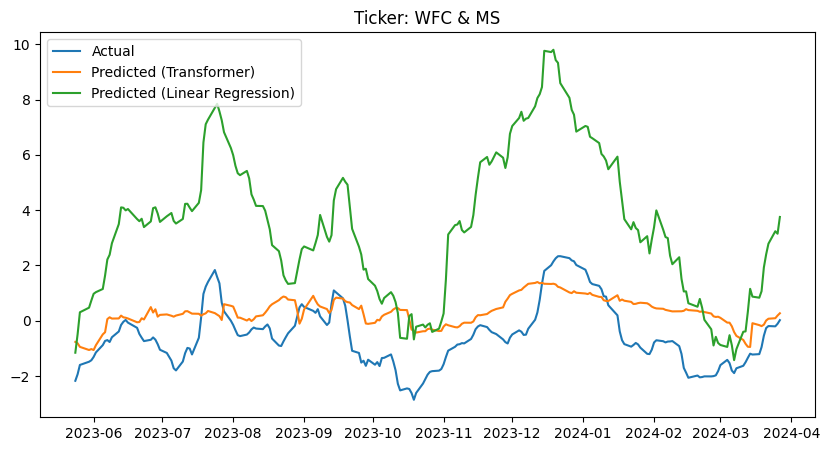

               Model  R-squared          MAPE       MAE
0        Transformer  -0.271543   1354.869827  1.075557
1  Linear Regression -14.315131  14806.531119  3.969031
['UNP' 'GOOGL']
------Dataset Information------
Set      Size
-----  ------
Train       0
Val         0
Test        0


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


ValueError: Found array with 0 sample(s) (shape=(0, 276)) while a minimum of 1 is required by StandardScaler.

In [370]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error

for ii in range(12, 30):
    resultsby_metric = {}
    # Pair Selection
    PAIR_IDX = ii
    ADD_SENTIMENT_MA = True

    pair = pairs[PAIR_IDX]
    print(pair)

    data = {key.replace('price_history/', ''): value for key, value in data.items()}

    # Join Sentiment and add Sentiment Moving Averages if ADD_SENTIMENT_MA is True
    pair_sentiment_df = pd.merge( data[pair[0]].sentiment, data[pair[1]].sentiment, left_index=True, right_index=True, suffixes=("_S1", "_S2"),)
    if ADD_SENTIMENT_MA:
        pair_sentiment_df = add_moving_averages(pair_sentiment_df, [5, 10, 20, 40, 80], columns=pair_sentiment_df.columns)

    # Join Technical Indicators
    pair_ti_df = pd.merge( data[pair[0]].ti, data[pair[1]].ti, left_index=True, right_index=True, suffixes=("_S1", "_S2"))
    pair_df = pd.merge(pair_ti_df, pair_sentiment_df, left_index=True, right_index=True, how="left")


    SPREAD_WINDOW = None
    MA_HIGH = 45
    MA_LOW = 3

    pair_df = calculate_spread(pair_df, SPREAD_WINDOW, MA_HIGH, MA_LOW, int(len(pair_df)*0.6 )).dropna()

    # --- Feature Selection Setup ---

    # Parameters
    LOOK_BACK = 1
    DROP_COLS = [
    
    ]

    train_data, val_data, test_data = create_dataset(
        pair_df, 
        look_back=LOOK_BACK, 
        target_col="zscore_spread", 
        drop_cols=DROP_COLS
    )

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset(train_data, val_data, test_data)

    resultsby_metric["Adj Close_S1"] = X_test["Adj Close_S1"][-len(y_pred):] 
    resultsby_metric["Adj Close_S2"] = X_test["Adj Close_S2"][-len(y_pred):] 

    # Combine val and test data since were not using Deep learning or hyper-param tuning 
    X_test = pd.concat([X_val, X_test])
    y_test = pd.concat([y_val, y_test])

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    time_steps = 20 # Define sequence length
    X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

    # Model parameters
    input_shape = X_train_seq.shape[1:]

    # Build model
    model_grid = build_transformer_model(input_shape, ff_dim=282)
    # Compile the model
    model_grid.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

    # Train the model
    history = model_grid.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

    # Assuming `model` is your trained model and `X_test_seq` is your sequence data
    y_pred = model_grid.predict(X_test_seq)

    y_pred = y_pred.flatten()

    y_test_seq = y_test[-len(y_pred):] 

    

    # Build linear regression model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Predict using the linear regression model
    y_pred_regression = regression_model.predict(X_test)
    y_pred_regression = y_pred_regression[-len(y_pred):] 

    fig = plt.figure(figsize=(10, 5))
    plt.plot(y_test_seq.index, y_test_seq, label="Actual")
    plt.plot(y_test_seq.index, y_pred, label="Predicted (Transformer)")
    # Add the predicted results to the graph
    plt.plot(y_test_seq.index, y_pred_regression, label="Predicted (Linear Regression)")
    plt.title("Ticker: " + pair[0] + " & " + pair[1])
    plt.legend()
    plt.show()

    # Create a DataFrame to store the metrics
    metrics_df = pd.DataFrame(columns=['Model', 'R-squared', 'MAPE', 'MAE'])

    # Calculate metrics for the Transformer model
    r2_transformer = r2_score(y_test_seq, y_pred)
    mape_transformer = np.mean(np.abs((y_test_seq - y_pred) /y_test_seq)) * 100
    mae_transformer = mean_absolute_error(y_test_seq, y_pred)

    resultsby_metric["Y_pred"] = y_pred
    resultsby_metric["Y_test"] = y_test_seq
        
        # Calculate metrics for the Linear Regression model
    r2_regression = r2_score(y_test_seq, y_pred_regression)
    mape_regression = np.mean(np.abs((y_test_seq - y_pred_regression) / y_test_seq)) * 100
    mae_regression = mean_absolute_error(y_test_seq, y_pred_regression)

        # Add metrics to the DataFrame
    metrics_df.loc[0] = ['Transformer', r2_transformer, mape_transformer, mae_transformer]
    metrics_df.loc[1] = ['Linear Regression', r2_regression, mape_regression, mae_regression]

        # Display the metrics table
    print(metrics_df)

    resultsby_pair[ii] = resultsby_metric




['JPM' 'GOOGL']
------Dataset Information------
Set      Size
-----  ------
Train     442
Val        73
Test      223


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step


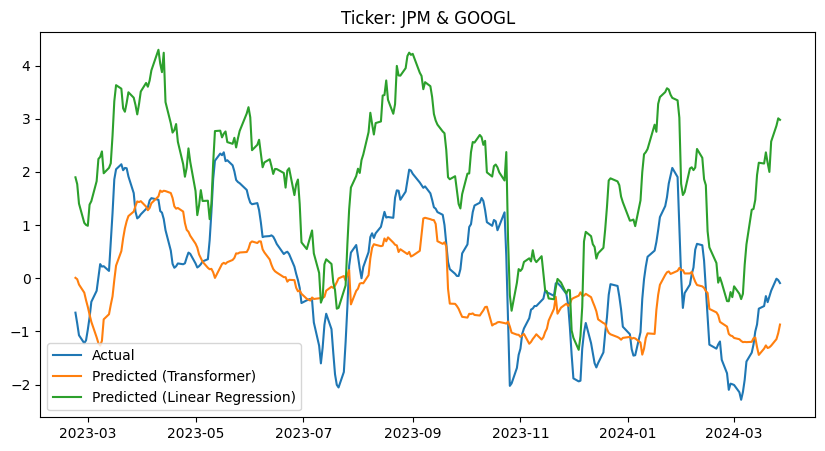

               Model  R-squared         MAPE       MAE
0        Transformer   0.284247   342.608216  0.820766
1  Linear Regression  -1.251409  2486.896953  1.638492
['INTC' 'BLK']
------Dataset Information------
Set      Size
-----  ------
Train     442
Val        73
Test      223


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step


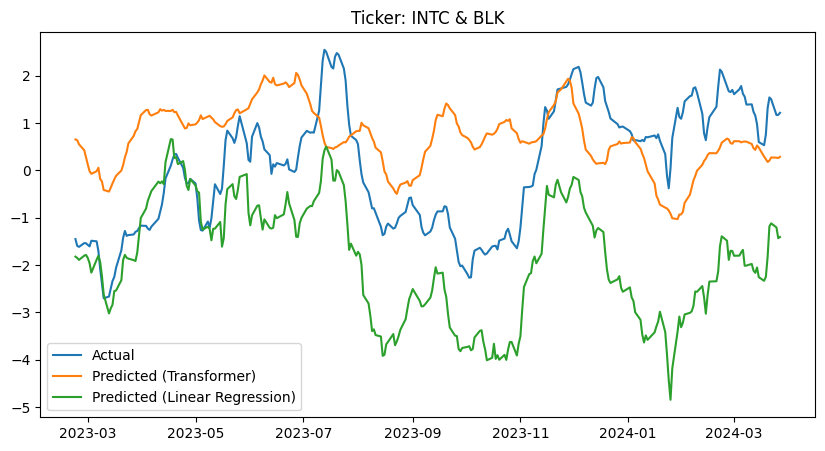

               Model  R-squared        MAPE       MAE
0        Transformer  -0.398333  308.156139  1.350886
1  Linear Regression  -2.292382  405.443050  2.031743
['MS' 'BLK']
------Dataset Information------
Set      Size
-----  ------
Train     442
Val        73
Test      223


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 578ms/step


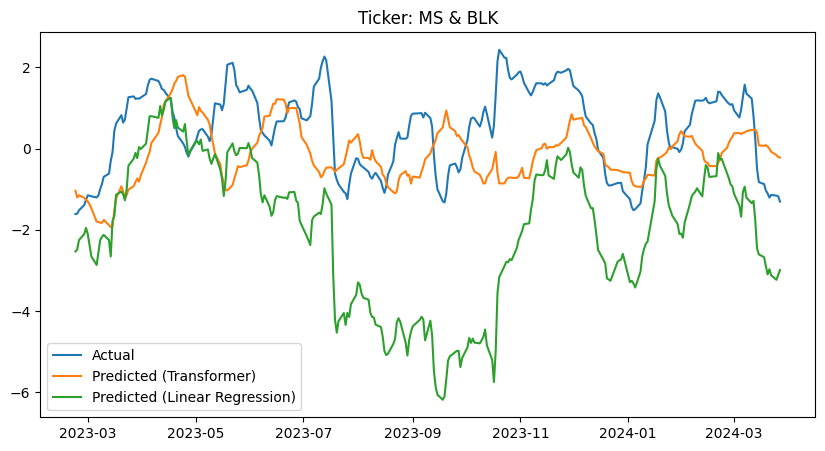

               Model  R-squared        MAPE       MAE
0        Transformer  -0.669857  186.552667  1.080960
1  Linear Regression  -7.301768  675.446885  2.528647
['MS' 'GS']
------Dataset Information------
Set      Size
-----  ------
Train     442
Val        73
Test      223


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step


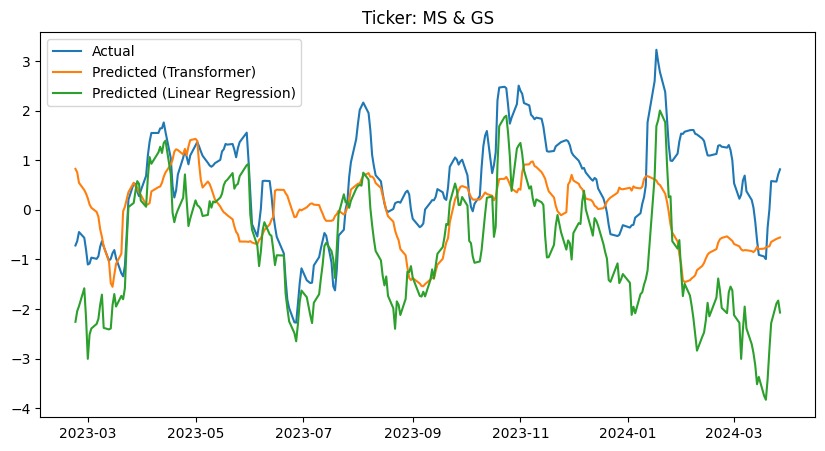

               Model  R-squared         MAPE       MAE
0        Transformer  -0.386813   437.887193  1.019747
1  Linear Regression  -1.372048  1879.217483  1.334404
['CRM' 'BLK']
------Dataset Information------
Set      Size
-----  ------
Train     339
Val        56
Test      171


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step


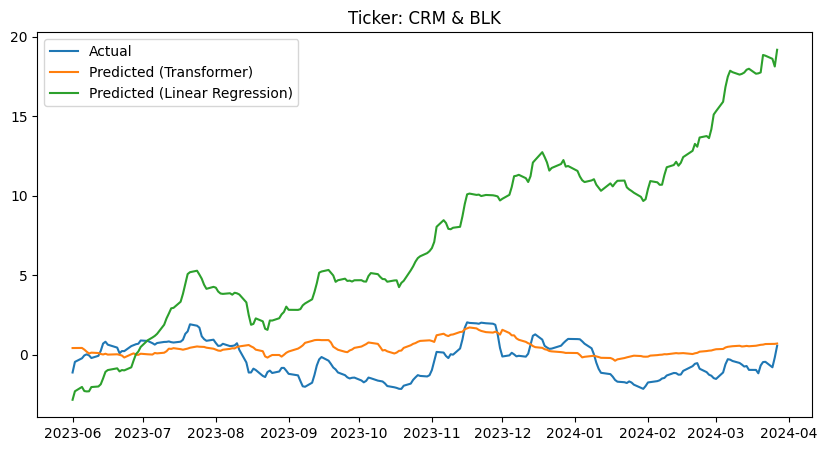

               Model  R-squared         MAPE       MAE
0        Transformer  -0.379643   381.579006  1.123656
1  Linear Regression -73.301599  3144.495723  8.045790
['GOOGL' 'CRM']
------Dataset Information------
Set      Size
-----  ------
Train     339
Val        56
Test      171


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step


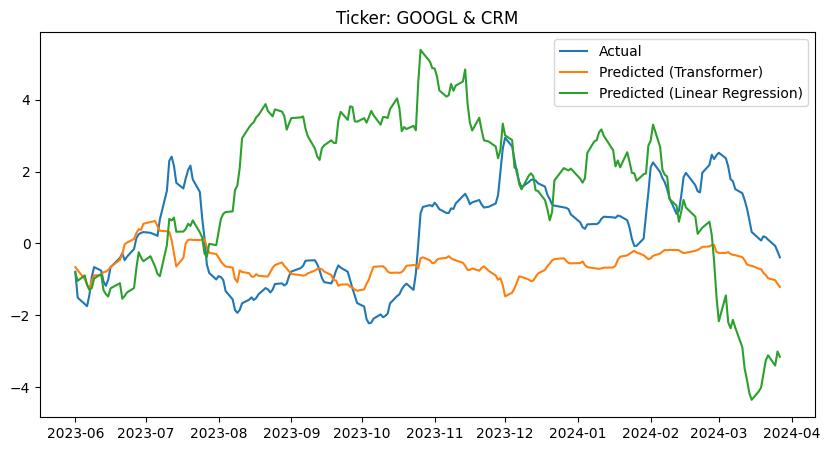

               Model  R-squared        MAPE       MAE
0        Transformer  -0.259511  134.574110  1.199184
1  Linear Regression  -4.254269  426.185923  2.471811
['INTC' 'HON']
------Dataset Information------
Set      Size
-----  ------
Train     361
Val        60
Test      181


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step


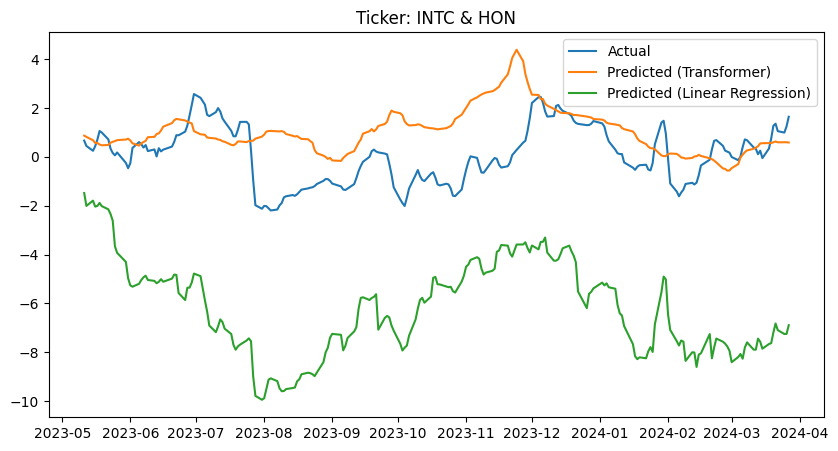

               Model  R-squared         MAPE       MAE
0        Transformer  -1.073789   614.623063  1.295918
1  Linear Regression -30.807140  3694.179235  6.273757
['GOOGL' 'AXP']
------Dataset Information------
Set      Size
-----  ------
Train     348
Val        58
Test      174


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step


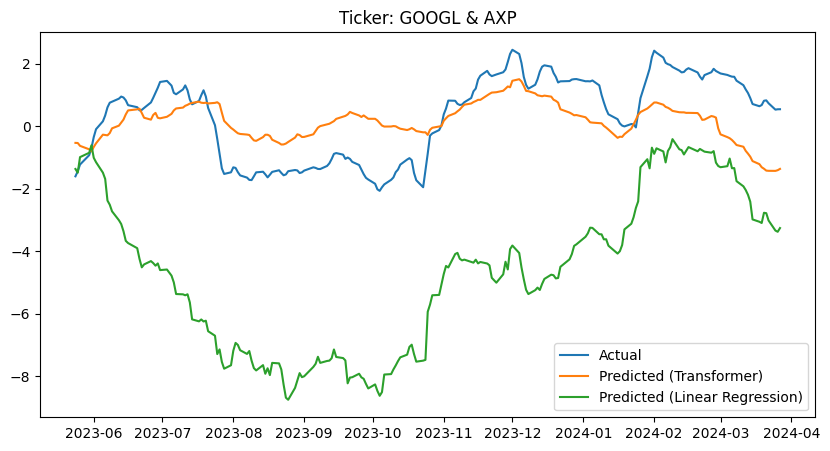

               Model  R-squared         MAPE       MAE
0        Transformer   0.200084   129.306236  1.027919
1  Linear Regression -15.071922  1065.410388  5.016210
['WFC' 'GOOGL']
------Dataset Information------
Set      Size
-----  ------
Train     347
Val        57
Test      175


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step


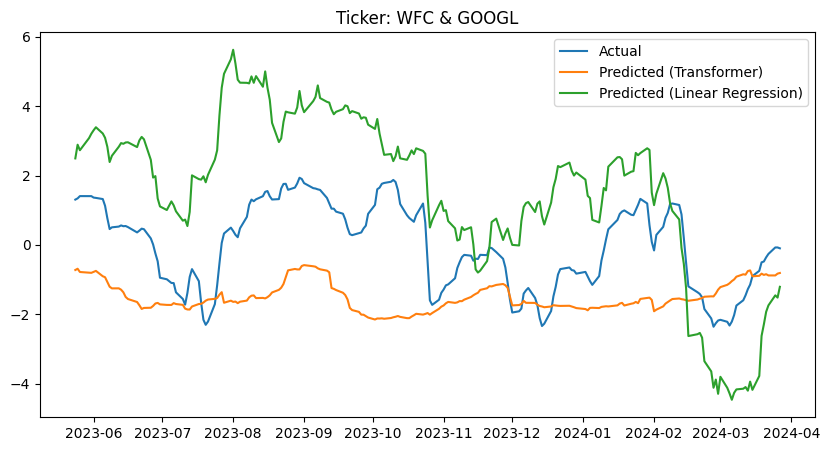

               Model  R-squared        MAPE       MAE
0        Transformer  -1.436040  339.759681  1.611884
1  Linear Regression  -2.817155  437.098804  2.167592
['GE' 'AAPL']
------Dataset Information------
Set      Size
-----  ------
Train       0
Val         0
Test        0


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


ValueError: Found array with 0 sample(s) (shape=(0, 306)) while a minimum of 1 is required by StandardScaler.

In [374]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error

for ii in range(16, 30):
    resultsby_metric = {}
    # Pair Selection
    PAIR_IDX = ii
    ADD_SENTIMENT_MA = True

    pair = pairs[PAIR_IDX]
    print(pair)

    data = {key.replace('price_history/', ''): value for key, value in data.items()}

    # Join Sentiment and add Sentiment Moving Averages if ADD_SENTIMENT_MA is True
    pair_sentiment_df = pd.merge( data[pair[0]].sentiment, data[pair[1]].sentiment, left_index=True, right_index=True, suffixes=("_S1", "_S2"),)
    if ADD_SENTIMENT_MA:
        pair_sentiment_df = add_moving_averages(pair_sentiment_df, [5, 10, 20, 40, 80], columns=pair_sentiment_df.columns)

    # Join Technical Indicators
    pair_ti_df = pd.merge( data[pair[0]].ti, data[pair[1]].ti, left_index=True, right_index=True, suffixes=("_S1", "_S2"))
    pair_df = pd.merge(pair_ti_df, pair_sentiment_df, left_index=True, right_index=True, how="left")


    SPREAD_WINDOW = None
    MA_HIGH = 45
    MA_LOW = 3

    pair_df = calculate_spread(pair_df, SPREAD_WINDOW, MA_HIGH, MA_LOW, int(len(pair_df)*0.6 )).dropna()

    # --- Feature Selection Setup ---

    # Parameters
    LOOK_BACK = 1
    DROP_COLS = [
    
    ]

    train_data, val_data, test_data = create_dataset(
        pair_df, 
        look_back=LOOK_BACK, 
        target_col="zscore_spread", 
        drop_cols=DROP_COLS
    )

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset(train_data, val_data, test_data)

    resultsby_metric["Adj Close_S1"] = X_test["Adj Close_S1"][-len(y_pred):] 
    resultsby_metric["Adj Close_S2"] = X_test["Adj Close_S2"][-len(y_pred):] 

    # Combine val and test data since were not using Deep learning or hyper-param tuning 
    X_test = pd.concat([X_val, X_test])
    y_test = pd.concat([y_val, y_test])

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    time_steps = 20 # Define sequence length
    X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

    # Model parameters
    input_shape = X_train_seq.shape[1:]

    # Build model
    model_grid = build_transformer_model(input_shape, ff_dim=X_train.shape[1])
    # Compile the model
    model_grid.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

    # Train the model
    history = model_grid.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

    # Assuming `model` is your trained model and `X_test_seq` is your sequence data
    y_pred = model_grid.predict(X_test_seq)

    y_pred = y_pred.flatten()

    y_test_seq = y_test[-len(y_pred):] 

    

    # Build linear regression model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Predict using the linear regression model
    y_pred_regression = regression_model.predict(X_test)
    y_pred_regression = y_pred_regression[-len(y_pred):] 

    fig = plt.figure(figsize=(10, 5))
    plt.plot(y_test_seq.index, y_test_seq, label="Actual")
    plt.plot(y_test_seq.index, y_pred, label="Predicted (Transformer)")
    # Add the predicted results to the graph
    plt.plot(y_test_seq.index, y_pred_regression, label="Predicted (Linear Regression)")
    plt.title("Ticker: " + pair[0] + " & " + pair[1])
    plt.legend()
    plt.show()

    # Create a DataFrame to store the metrics
    metrics_df = pd.DataFrame(columns=['Model', 'R-squared', 'MAPE', 'MAE'])

    # Calculate metrics for the Transformer model
    r2_transformer = r2_score(y_test_seq, y_pred)
    mape_transformer = np.mean(np.abs((y_test_seq - y_pred) /y_test_seq)) * 100
    mae_transformer = mean_absolute_error(y_test_seq, y_pred)

    resultsby_metric["Y_pred"] = y_pred
    resultsby_metric["Y_test"] = y_test_seq
        
        # Calculate metrics for the Linear Regression model
    r2_regression = r2_score(y_test_seq, y_pred_regression)
    mape_regression = np.mean(np.abs((y_test_seq - y_pred_regression) / y_test_seq)) * 100
    mae_regression = mean_absolute_error(y_test_seq, y_pred_regression)

        # Add metrics to the DataFrame
    metrics_df.loc[0] = ['Transformer', r2_transformer, mape_transformer, mae_transformer]
    metrics_df.loc[1] = ['Linear Regression', r2_regression, mape_regression, mae_regression]

        # Display the metrics table
    print(metrics_df)

    resultsby_pair[ii] = resultsby_metric




['GOOGL' 'BLK']
------Dataset Information------
Set      Size
-----  ------
Train     442
Val        73
Test      223


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step


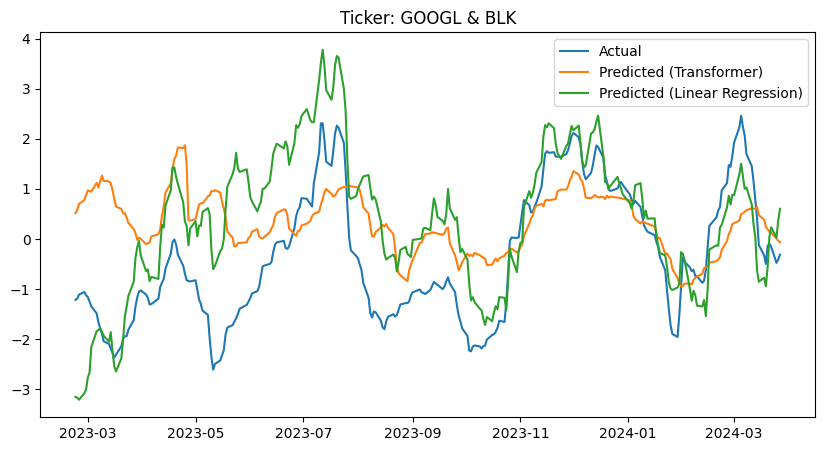

               Model  R-squared        MAPE       MAE
0        Transformer  -0.129171  219.343364  1.137567
1  Linear Regression   0.116841  252.819979  0.997374
['JPM' 'FDX']
------Dataset Information------
Set      Size
-----  ------
Train       0
Val         0
Test        0


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


ValueError: Found array with 0 sample(s) (shape=(0, 282)) while a minimum of 1 is required by StandardScaler.

In [378]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error

for ii in range(26, 30):
    resultsby_metric = {}
    # Pair Selection
    PAIR_IDX = ii
    ADD_SENTIMENT_MA = True

    pair = pairs[PAIR_IDX]
    print(pair)

    data = {key.replace('price_history/', ''): value for key, value in data.items()}

    # Join Sentiment and add Sentiment Moving Averages if ADD_SENTIMENT_MA is True
    pair_sentiment_df = pd.merge( data[pair[0]].sentiment, data[pair[1]].sentiment, left_index=True, right_index=True, suffixes=("_S1", "_S2"),)
    if ADD_SENTIMENT_MA:
        pair_sentiment_df = add_moving_averages(pair_sentiment_df, [5, 10, 20, 40, 80], columns=pair_sentiment_df.columns)

    # Join Technical Indicators
    pair_ti_df = pd.merge( data[pair[0]].ti, data[pair[1]].ti, left_index=True, right_index=True, suffixes=("_S1", "_S2"))
    pair_df = pd.merge(pair_ti_df, pair_sentiment_df, left_index=True, right_index=True, how="left")


    SPREAD_WINDOW = None
    MA_HIGH = 45
    MA_LOW = 3

    pair_df = calculate_spread(pair_df, SPREAD_WINDOW, MA_HIGH, MA_LOW, int(len(pair_df)*0.6 )).dropna()

    # --- Feature Selection Setup ---

    # Parameters
    LOOK_BACK = 1
    DROP_COLS = [
    
    ]

    train_data, val_data, test_data = create_dataset(
        pair_df, 
        look_back=LOOK_BACK, 
        target_col="zscore_spread", 
        drop_cols=DROP_COLS
    )

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset(train_data, val_data, test_data)

    resultsby_metric["Adj Close_S1"] = X_test["Adj Close_S1"][-len(y_pred):] 
    resultsby_metric["Adj Close_S2"] = X_test["Adj Close_S2"][-len(y_pred):] 

    # Combine val and test data since were not using Deep learning or hyper-param tuning 
    X_test = pd.concat([X_val, X_test])
    y_test = pd.concat([y_val, y_test])

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    time_steps = 20 # Define sequence length
    X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

    # Model parameters
    input_shape = X_train_seq.shape[1:]

    # Build model
    model_grid = build_transformer_model(input_shape, ff_dim=X_train.shape[1])
    # Compile the model
    model_grid.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

    # Train the model
    history = model_grid.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

    # Assuming `model` is your trained model and `X_test_seq` is your sequence data
    y_pred = model_grid.predict(X_test_seq)

    y_pred = y_pred.flatten()

    y_test_seq = y_test[-len(y_pred):] 

    

    # Build linear regression model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Predict using the linear regression model
    y_pred_regression = regression_model.predict(X_test)
    y_pred_regression = y_pred_regression[-len(y_pred):] 

    fig = plt.figure(figsize=(10, 5))
    plt.plot(y_test_seq.index, y_test_seq, label="Actual")
    plt.plot(y_test_seq.index, y_pred, label="Predicted (Transformer)")
    # Add the predicted results to the graph
    plt.plot(y_test_seq.index, y_pred_regression, label="Predicted (Linear Regression)")
    plt.title("Ticker: " + pair[0] + " & " + pair[1])
    plt.legend()
    plt.show()

    # Create a DataFrame to store the metrics
    metrics_df = pd.DataFrame(columns=['Model', 'R-squared', 'MAPE', 'MAE'])

    # Calculate metrics for the Transformer model
    r2_transformer = r2_score(y_test_seq, y_pred)
    mape_transformer = np.mean(np.abs((y_test_seq - y_pred) /y_test_seq)) * 100
    mae_transformer = mean_absolute_error(y_test_seq, y_pred)

    resultsby_metric["Y_pred"] = y_pred
    resultsby_metric["Y_test"] = y_test_seq
        
        # Calculate metrics for the Linear Regression model
    r2_regression = r2_score(y_test_seq, y_pred_regression)
    mape_regression = np.mean(np.abs((y_test_seq - y_pred_regression) / y_test_seq)) * 100
    mae_regression = mean_absolute_error(y_test_seq, y_pred_regression)

        # Add metrics to the DataFrame
    metrics_df.loc[0] = ['Transformer', r2_transformer, mape_transformer, mae_transformer]
    metrics_df.loc[1] = ['Linear Regression', r2_regression, mape_regression, mae_regression]

        # Display the metrics table
    print(metrics_df)

    resultsby_pair[ii] = resultsby_metric




['JPM' 'HON']
------Dataset Information------
Set      Size
-----  ------
Train     361
Val        60
Test      181


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step


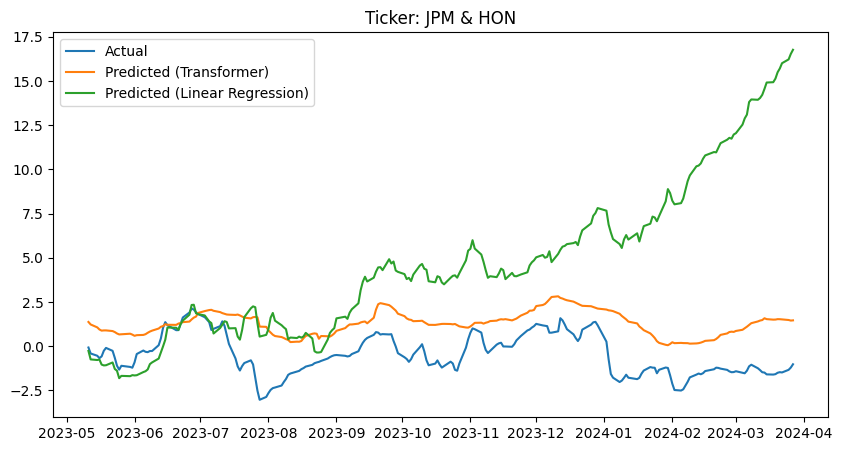

               Model  R-squared         MAPE       MAE
0        Transformer  -2.029578   450.904549  1.795122
1  Linear Regression -37.276699  1137.152893  5.299768
['MS' 'HON']
------Dataset Information------
Set      Size
-----  ------
Train     361
Val        60
Test      181


C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\3712075862.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_31296\859617486.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys.append(y[i + time_steps])


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step


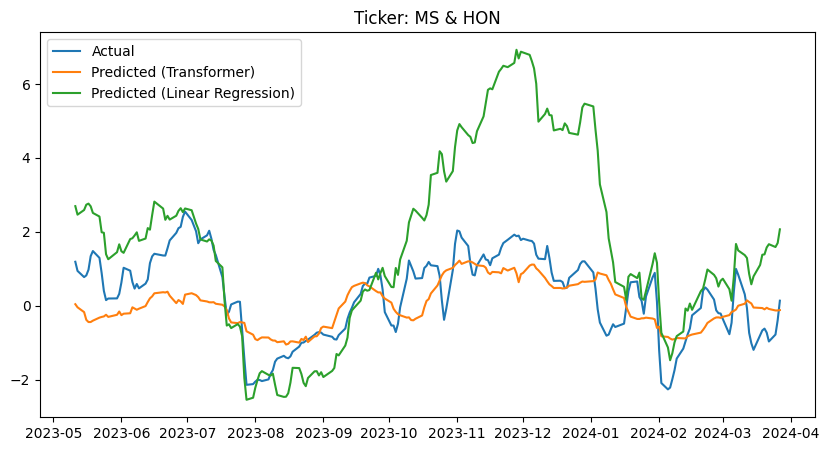

               Model  R-squared        MAPE       MAE
0        Transformer   0.383982  122.747018  0.725289
1  Linear Regression  -2.876000  294.484236  1.629892


In [379]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error

for ii in range(28, 30):
    resultsby_metric = {}
    # Pair Selection
    PAIR_IDX = ii
    ADD_SENTIMENT_MA = True

    pair = pairs[PAIR_IDX]
    print(pair)

    data = {key.replace('price_history/', ''): value for key, value in data.items()}

    # Join Sentiment and add Sentiment Moving Averages if ADD_SENTIMENT_MA is True
    pair_sentiment_df = pd.merge( data[pair[0]].sentiment, data[pair[1]].sentiment, left_index=True, right_index=True, suffixes=("_S1", "_S2"),)
    if ADD_SENTIMENT_MA:
        pair_sentiment_df = add_moving_averages(pair_sentiment_df, [5, 10, 20, 40, 80], columns=pair_sentiment_df.columns)

    # Join Technical Indicators
    pair_ti_df = pd.merge( data[pair[0]].ti, data[pair[1]].ti, left_index=True, right_index=True, suffixes=("_S1", "_S2"))
    pair_df = pd.merge(pair_ti_df, pair_sentiment_df, left_index=True, right_index=True, how="left")


    SPREAD_WINDOW = None
    MA_HIGH = 45
    MA_LOW = 3

    pair_df = calculate_spread(pair_df, SPREAD_WINDOW, MA_HIGH, MA_LOW, int(len(pair_df)*0.6 )).dropna()

    # --- Feature Selection Setup ---

    # Parameters
    LOOK_BACK = 1
    DROP_COLS = [
    
    ]

    train_data, val_data, test_data = create_dataset(
        pair_df, 
        look_back=LOOK_BACK, 
        target_col="zscore_spread", 
        drop_cols=DROP_COLS
    )

    X_train, y_train, X_val, y_val, X_test, y_test = prepare_dataset(train_data, val_data, test_data)

    resultsby_metric["Adj Close_S1"] = X_test["Adj Close_S1"][-len(y_pred):] 
    resultsby_metric["Adj Close_S2"] = X_test["Adj Close_S2"][-len(y_pred):] 

    # Combine val and test data since were not using Deep learning or hyper-param tuning 
    X_test = pd.concat([X_val, X_test])
    y_test = pd.concat([y_val, y_test])

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    time_steps = 20 # Define sequence length
    X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

    # Model parameters
    input_shape = X_train_seq.shape[1:]

    # Build model
    model_grid = build_transformer_model(input_shape, ff_dim=X_train.shape[1])
    # Compile the model
    model_grid.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

    # Train the model
    history = model_grid.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

    # Assuming `model` is your trained model and `X_test_seq` is your sequence data
    y_pred = model_grid.predict(X_test_seq)

    y_pred = y_pred.flatten()

    y_test_seq = y_test[-len(y_pred):] 

    

    # Build linear regression model
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Predict using the linear regression model
    y_pred_regression = regression_model.predict(X_test)
    y_pred_regression = y_pred_regression[-len(y_pred):] 

    fig = plt.figure(figsize=(10, 5))
    plt.plot(y_test_seq.index, y_test_seq, label="Actual")
    plt.plot(y_test_seq.index, y_pred, label="Predicted (Transformer)")
    # Add the predicted results to the graph
    plt.plot(y_test_seq.index, y_pred_regression, label="Predicted (Linear Regression)")
    plt.title("Ticker: " + pair[0] + " & " + pair[1])
    plt.legend()
    plt.show()

    # Create a DataFrame to store the metrics
    metrics_df = pd.DataFrame(columns=['Model', 'R-squared', 'MAPE', 'MAE'])

    # Calculate metrics for the Transformer model
    r2_transformer = r2_score(y_test_seq, y_pred)
    mape_transformer = np.mean(np.abs((y_test_seq - y_pred) /y_test_seq)) * 100
    mae_transformer = mean_absolute_error(y_test_seq, y_pred)

    resultsby_metric["Y_pred"] = y_pred
    resultsby_metric["Y_test"] = y_test_seq
        
        # Calculate metrics for the Linear Regression model
    r2_regression = r2_score(y_test_seq, y_pred_regression)
    mape_regression = np.mean(np.abs((y_test_seq - y_pred_regression) / y_test_seq)) * 100
    mae_regression = mean_absolute_error(y_test_seq, y_pred_regression)

        # Add metrics to the DataFrame
    metrics_df.loc[0] = ['Transformer', r2_transformer, mape_transformer, mae_transformer]
    metrics_df.loc[1] = ['Linear Regression', r2_regression, mape_regression, mae_regression]

        # Display the metrics table
    print(metrics_df)

    resultsby_pair[ii] = resultsby_metric




In [382]:
import pickle
resultsby_pair
# Specify the file path to save the pickle file
file_path = "resultsby_pair.pkl"

# Save the resultsby_pair variable to the pickle file
with open(file_path, "wb") as file:
    pickle.dump(resultsby_pair, file)


# Patch Time Series Transformation (fail)

In [81]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, NBEATS, PatchTST

from neuralforecast.losses.pytorch import MAE
from neuralforecast.losses.numpy import mae, mse

In [108]:
patch_df_target = pd.concat([y_val, y_train, y_test])

In [131]:
patch_df_target

Y_df = patch_df_target.reset_index()
Y_df = Y_df.rename(columns={'Date': 'ds', 'target': 'y'})
Y_df['unique_id'] = 0

Y_df


ds         y  unique_id
0   2023-05-03 -0.133184          0
1   2023-05-04 -0.112041          0
2   2023-05-05 -0.111425          0
3   2023-05-08 -0.047130          0
4   2023-05-09  0.064014          0
..         ...       ...        ...
898 2024-03-20 -1.442855          0
899 2024-03-21 -1.707300          0
900 2024-03-22 -1.967804          0
901 2024-03-25 -2.031132          0
902 2024-03-26 -2.074088          0

[903 rows x 3 columns]

In [141]:
horizon = 50

models = [
         PatchTST(h=horizon,
                 input_size=2*horizon,
                 max_steps=50)]

nf = NeuralForecast(models=models, freq='D')

preds_df = nf.cross_validation(df=Y_df, val_size=int(len(patch_df_target) * 0.1), test_size=int(len(patch_df_target) * 0.4), n_windows=None)

c:\Program Files\Python311\Lib\site-packages\pytorch_lightning\utilities\parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1
c:\Program Files\Python311\Lib\site-packages\neuralforecast\common\_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type              | Params
---------------------------------------------------
0 | loss         | MAE               | 0     
1 | padder_train | ConstantPad1d     | 0     
2 | scaler       | TemporalNorm      | 0     
3 | model        | PatchTST_backbone | 478 K 
---------------------------------------------------
478 K     Trainable par

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Program Files\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
c:\Program Files\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
c:\Program Files\Python311\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Program Files\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

c:\Program Files\Python311\Lib\site-packages\neuralforecast\core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


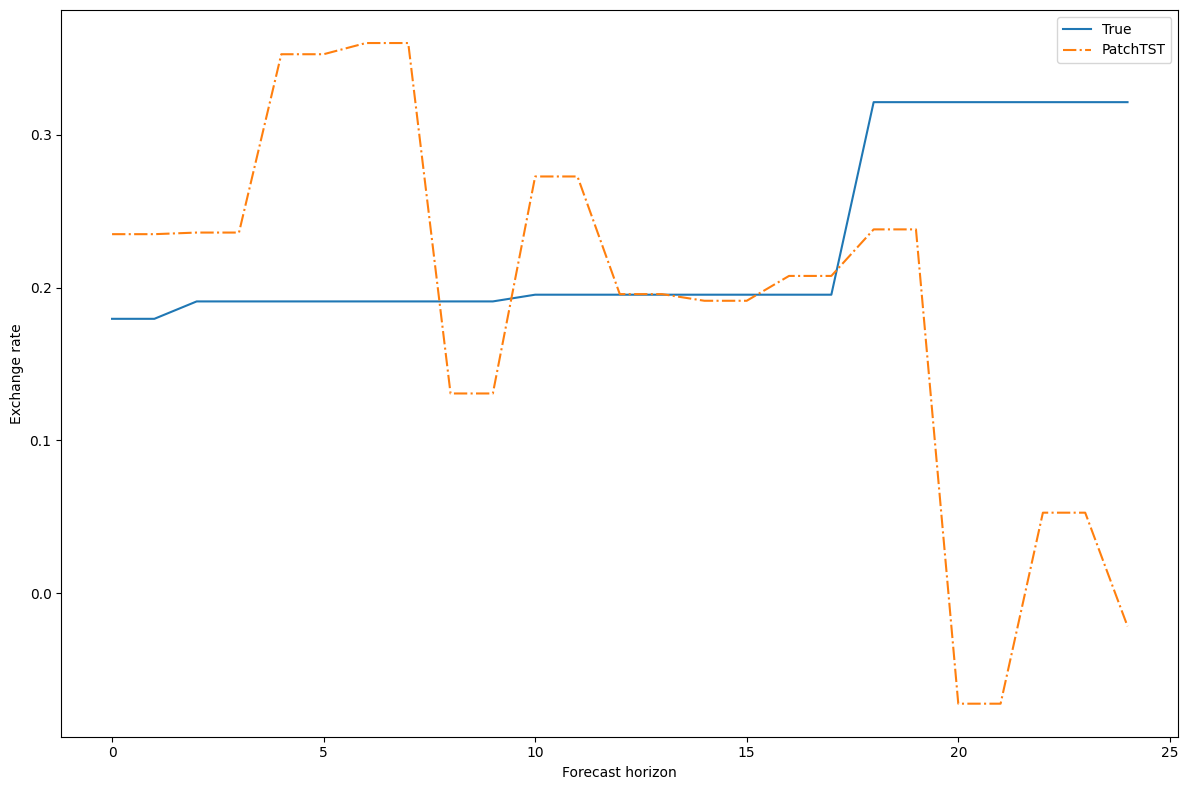

In [143]:
horizon = 25
y_true = preds_df['y'].values
y_pred_patchtst = preds_df['PatchTST'].values

n_series = len(Y_df['unique_id'].unique())

y_true = y_true.reshape(n_series, -1, horizon)
y_pred_patchtst = y_pred_patchtst.reshape(n_series, -1, horizon)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(y_true[0, 0, :], label='True')
ax.plot(y_pred_patchtst[0, 0, :], label='PatchTST', ls='-.')
ax.set_ylabel('Exchange rate')
ax.set_xlabel('Forecast horizon')
ax.legend(loc='best')

plt.tight_layout()

In [144]:
data = {
       'PatchTST': [mae(y_pred_patchtst, y_true), mse(y_pred_patchtst, y_true)]}

metrics_df = pd.DataFrame(data=data)
metrics_df.index = ['mae', 'mse']

metrics_df.style.highlight_min(color='lightgreen', axis=1)

In [3]:
import pandas as pd
dd = pd.read_csv("technical_indicators/AAPL.csv")
dd.shape[1]

123

# implementation 2

In [150]:
# Standard
import os

# Third Party
from transformers import (
    EarlyStoppingCallback,
    PatchTSTConfig,
    PatchTSTForPrediction,
    Trainer,
    TrainingArguments,
)
import numpy as np
import pandas as pd

# First Party
from tsfm_public.toolkit.dataset import ForecastDFDataset
from tsfm_public.toolkit.time_series_preprocessor import TimeSeriesPreprocessor
from tsfm_public.toolkit.util import select_by_index

In [151]:
from transformers import set_seed

set_seed(2023)

In [152]:
timestamp_column = "date"
id_columns = []

context_length = 512
forecast_horizon = 96
patch_length = 16
num_workers = 16  # Reduce this if you have low number of CPU cores
batch_size = 64  

In [153]:
data_patch = create_dataset_full(
    pair_df, 
    look_back=LOOK_BACK, 
    target_col="zscore_spread", 
    drop_cols=DROP_COLS
)

In [172]:
data_patch.to_csv('data_patch.csv')

In [159]:
temp_data = data_patch.reset_index()
timestamp_column = temp_data['Date']

In [182]:
forecast_columns = list(data_patch["target"])

# get split
num_train = int(len(data_patch) * 0.7)
num_test = int(len(data_patch) * 0.2)
num_valid = len(data_patch) - num_train - num_test
border1s = [
    0,
    num_train - context_length,
    len(data_patch) - num_test - context_length,
]
border2s = [num_train, num_train + num_valid, len(data_patch)]

train_start_index = border1s[0]  # None indicates beginning of dataset
train_end_index = border2s[0]



# we shift the start of the evaluation period back by context length so that
# the first evaluation timestamp is immediately following the training data
valid_start_index = border1s[1]
valid_end_index = border2s[1]

test_start_index = border1s[2]
test_end_index = border2s[2]

train_data = select_by_index(
    data_patch,
    id_columns=id_columns,
    start_index=train_start_index,
    end_index=train_end_index,
)
valid_data = select_by_index(
    data_patch,
    id_columns=id_columns,
    start_index=valid_start_index,
    end_index=valid_end_index,
)
test_data = select_by_index(
    data_patch,
    id_columns=id_columns,
    start_index=test_start_index,
    end_index=test_end_index,
)

time_series_preprocessor = TimeSeriesPreprocessor(
    timestamp_column=timestamp_column,
    id_columns=id_columns,
    input_columns=forecast_columns,
    output_columns=forecast_columns,
    scaling=True,
)
#time_series_preprocessor = time_series_preprocessor.train(train_data)

In [183]:
config = PatchTSTConfig(
    num_input_channels=len(forecast_columns),
    context_length=context_length,
    patch_length=patch_length,
    patch_stride=patch_length,
    prediction_length=forecast_horizon,
    random_mask_ratio=0.4,
    d_model=128,
    num_attention_heads=16,
    num_hidden_layers=3,
    ffn_dim=256,
    dropout=0.2,
    head_dropout=0.2,
    pooling_type=None,
    channel_attention=False,
    scaling="std",
    loss="mse",
    pre_norm=True,
    norm_type="batchnorm",
)
model = PatchTSTForPrediction(config)

In [184]:
training_args = TrainingArguments(
    output_dir="./checkpoint/patchtst/electricity/pretrain/output/",
    overwrite_output_dir=True,
    # learning_rate=0.001,
    num_train_epochs=100,
    do_eval=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    dataloader_num_workers=num_workers,
    save_strategy="epoch",
    logging_strategy="epoch",
    save_total_limit=3,
    logging_dir="./checkpoint/patchtst/electricity/pretrain/logs/",  # Make sure to specify a logging directory
    load_best_model_at_end=True,  # Load the best model when training ends
    metric_for_best_model="eval_loss",  # Metric to monitor for early stopping
    greater_is_better=False,  # For loss
    label_names=["future_values"],
)

# Create the early stopping callback
early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=10,  # Number of epochs with no improvement after which to stop
    early_stopping_threshold=0.0001,  # Minimum improvement required to consider as improvement
)

# define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    callbacks=[early_stopping_callback],
    # compute_metrics=compute_metrics,
)

# pretrain
trainer.train()

ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.21.0`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

# Time Series Transformer (Does not Work)

In [3]:
pair_df

High_S1  Low_S1  Open_S1  Volume_S1  Adj Close_S1        P_S1  \
Date                                                                         
2021-01-04  267.5800  260.16   267.00  3572043.0        265.00  264.246667   
2021-01-05  273.5000  262.57   263.88  4207081.0        270.93  269.000000   
2021-01-06  288.3800  273.10   276.29  6383530.0        285.55  282.343333   
2021-01-07  295.8894  286.68   287.77  4009730.0        291.65  291.406467   
2021-01-08  292.2800  285.06   292.00  2800784.0        290.08  289.140000   
...              ...     ...      ...        ...           ...         ...   
2024-03-25  410.4600  403.86   406.87  1683977.0        404.94  406.420000   
2024-03-26  409.3300  404.52   406.09  1406974.0        406.18  406.676667   
2024-03-27  415.4900  408.37   409.62  2353629.0        415.25  413.036667   
2024-03-28  419.2000  414.98   416.21  2409718.0        417.69  417.290000   
2024-04-01  417.9500  412.00   416.68  1863918.0        413.51  414.486667   

                 R1_S1       R2_S1       R3_S1       S1_S1  ...  \
Date                                                        ...   
2021-01-04  267.081107  268.832227  271.666667  261.412227  ...   
2021-01-05  273.175260  275.754740  279.930000  264.824740  ...   
2021-01-06  288.180293  291.786373  297.623333  276.506373  ...   
2021-01-07  294.924457  297.097876  300.615867  287.888476  ...   
2021-01-08  291.898040  293.601960  296.360000  286.381960  ...   
...                ...         ...         ...         ...  ...   
2024-03-25  408.941200  410.498800  413.020000  403.898800  ...   
2024-03-26  408.514087  409.649247  411.486667  404.839247  ...   
2024-03-27  415.756507  417.436827  420.156667  410.316827  ...   
2024-03-28  418.902040  419.897960  421.510000  415.677960  ...   
2024-04-01  416.759567  418.163767  420.436667  412.213767  ...   

            others_dlr_S2  others_cr_S2  news_pos_sentiment_count_S1  \
Date                                                                   
2021-01-04       0.000000      0.000000                          1.0   
2021-01-05       0.527572      0.528967                          1.0   
2021-01-06       2.812112      3.396078                          3.0   
2021-01-07       2.081697      5.571031                          2.0   
2021-01-08       0.800339      6.419347                          2.0   
...                   ...           ...                          ...   
2024-03-25      -1.050563     14.826538                          2.0   
2024-03-26       0.487654     15.387862                          0.0   
2024-03-27       1.802721     17.486846                          0.0   
2024-03-28      -0.170180     17.287077                          2.0   
2024-04-01      -0.834708     16.312147                          NaN   

            news_sentiment_daily_avg_S1  twitter_pos_sentiment_count_S1  \
Date                                                                      
2021-01-04                       0.0288                             2.0   
2021-01-05                      -0.0050                             4.0   
2021-01-06                      -0.0136                            11.0   
2021-01-07                       0.0016                            13.0   
2021-01-08                       0.0033                            11.0   
...                                 ...                             ...   
2024-03-25                       0.0087                            15.0   
2024-03-26                      -0.0096                            18.0   
2024-03-27                      -0.0035                            17.0   
2024-03-28                       0.0147                            12.0   
2024-04-01                          NaN                             NaN   

            news_sentiment_daily_avg_S2  twitter_pos_sentiment_count_S2  \
Date                                                                      
2021-01-04                       0.0000                        

In [74]:
# Format the data to resemble the target structure
data = pd.read_csv('pair_df.csv')
# Define the target sequence
data['target_sequence'] = data[['zscore_spread']].values

# Define the start column
data['start'] = pd.to_datetime(data['Date'])

# Assuming feat_dynamic_real includes all price and volume columns related to the stocks
dynamic_features = data[['High_S1_x', 'Low_S1_x', 'Open_S1_x', 'Volume_S1_x', 'Adj Close_S1_x',
                         'High_S2_x', 'Low_S2_x', 'Open_S2_x', 'Volume_S2_x', 'Adj Close_S2_x',
                         'High_S1_y', 'Low_S1_y', 'Open_S1_y', 'Volume_S1_y', 'Adj Close_S1_y',
                         'High_S2_y', 'Low_S2_y', 'Open_S2_y', 'Volume_S2_y', 'Adj Close_S2_y']].values.tolist()

data['feat_dynamic_real'] = dynamic_features

# As an example, use a single static category for all entries (since all data belongs to one time series)
data['feat_static_cat'] = 0

# Set a static item_id for the single time series
data['item_id'] = 'T1'

# Select relevant columns for the new data format
formatted_data = data[['start', 'target_sequence', 'feat_dynamic_real', 'feat_static_cat', 'item_id']]
formatted_data

start  target_sequence  \
0   2021-01-04              NaN   
1   2021-01-05              NaN   
2   2021-01-06              NaN   
3   2021-01-07              NaN   
4   2021-01-08              NaN   
..         ...              ...   
810 2024-03-25        -1.442855   
811 2024-03-26        -1.707300   
812 2024-03-27        -1.967804   
813 2024-03-28        -2.031132   
814 2024-04-01        -2.074088   

                                     feat_dynamic_real  feat_static_cat  \
0    [267.58, 260.16, 267.0, 3572043.0, 265.0, 730....                0   
1    [273.5, 262.57, 263.88, 4207081.0, 270.93, 717...                0   
2    [288.38, 273.1, 276.29, 6383530.0, 285.55, 744...                0   
3    [295.8894, 286.68, 287.77, 4009730.0, 291.65, ...                0   
4    [292.28, 285.06, 292.0, 2800784.0, 290.08, 759...                0   
..                                                 ...              ...   
810  [410.46, 403.86, 406.87, 1683977.0, 404.94, 82...                0   
811  [409.33, 404.52, 406.09, 1406974.0, 406.18, 82...                0   
812  [415.49, 408.37, 409.62, 2353629.0, 415.25, 83...                0   
813  [419.2, 414.98, 416.21, 2409718.0, 417.69, 838...                0   
814  [417.95, 412.0, 416.68, 1863918.0, 413.51, 835...                0   

    item_id  
0        T1  
1        T1  
2        T1  
3        T1  
4        T1  
..      ...  
810      T1  
811      T1  
812      T1  
813      T1  
814      T1  

[815 rows x 5 columns]

In [75]:
# Calculate split indices based on the specified ratios
total_rows = len(formatted_data)
train_end = int(0.6 * total_rows)
validation_end = train_end + int(0.1 * total_rows)

# Split the data into train, validation, and test sets
train_data = formatted_data.iloc[:train_end]
validation_data = formatted_data.iloc[train_end:validation_end]
test_data = formatted_data.iloc[validation_end:]

# Summary of each set
dataset_summary = {
    'train': {
        'features': train_data.columns.tolist(),
        'num_rows': len(train_data)
    },
    'validation': {
        'features': validation_data.columns.tolist(),
        'num_rows': len(validation_data)
    },
    'test': {
        'features': test_data.columns.tolist(),
        'num_rows': len(test_data)
    }
}

dataset_summary

{'train': {'features': ['start',
   'target_sequence',
   'feat_dynamic_real',
   'feat_static_cat',
   'item_id'],
  'num_rows': 489},
 'validation': {'features': ['start',
   'target_sequence',
   'feat_dynamic_real',
   'feat_static_cat',
   'item_id'],
  'num_rows': 81},
 'test': {'features': ['start',
   'target_sequence',
   'feat_dynamic_real',
   'feat_static_cat',
   'item_id'],
  'num_rows': 245}}

In [76]:
train_example = dataset_summary['train']["features"]
train_example

['start', 'target_sequence', 'feat_dynamic_real', 'feat_static_cat', 'item_id']

In [17]:
freq = "1M"
prediction_length = 24

assert len(train_data) + prediction_length == len(
    len(validation_data)
)

TypeError: object of type 'int' has no len()

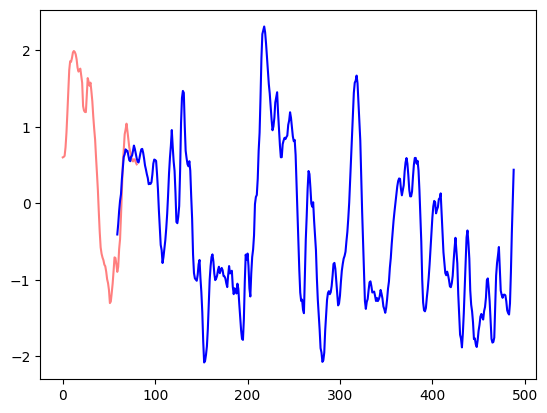

In [77]:
import numpy as np

figure, axes = plt.subplots()
axes.plot(np.array(validation_data["target_sequence"]), color="red", alpha=0.5)
axes.plot(np.array(train_data["target_sequence"]), color="blue")

plt.show()

In [78]:
from functools import lru_cache

import pandas as pd
import numpy as np


def convert_to_pandas_period(date, freq):
    return pd.Period(date, freq)

def transform_start_field(batch, freq):
    batch["start"] = [convert_to_pandas_period(date, freq) for date in batch["start"]]
    return batch

In [79]:
import pandas as pd

def convert_to_pandas_period(date, freq):
    return pd.Period(date, freq=freq)

# Define the transformation function that operates on the DataFrame
def transform_start_field(df, freq):
    df['start'] = df['start'].apply(lambda x: convert_to_pandas_period(x, freq))
    return df

# Assume your frequency is 'M' (monthly periods)
freq = 'D'

# Assuming 'train_data' and 'test_data' are your DataFrames
train_data = transform_start_field(train_data, freq)
test_data = transform_start_field(test_data, freq)

C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_21776\779421513.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start'] = df['start'].apply(lambda x: convert_to_pandas_period(x, freq))
C:\Users\MingyangWang\AppData\Local\Temp\ipykernel_21776\779421513.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start'] = df['start'].apply(lambda x: convert_to_pandas_period(x, freq))


In [80]:
from gluonts.time_feature import get_lags_for_frequency

lags_sequence = get_lags_for_frequency(freq)
print(lags_sequence)


[1, 2, 3, 4, 5, 6, 7, 8, 13, 14, 15, 20, 21, 22, 27, 28, 29, 30, 31, 56, 84, 363, 364, 365, 727, 728, 729, 1091, 1092, 1093]


In [81]:
from gluonts.time_feature import time_features_from_frequency_str

time_features = time_features_from_frequency_str(freq)
print(time_features)

[<function day_of_week at 0x000001D0627763E0>, <function day_of_month at 0x000001D062776520>, <function day_of_year at 0x000001D062776660>]


In [82]:
from transformers import TimeSeriesTransformerConfig, TimeSeriesTransformerForPrediction

prediction_length = len(test_data)
config = TimeSeriesTransformerConfig(
    prediction_length=prediction_length,
    # context length:
    context_length=prediction_length * 2,
    # lags coming from helper given the freq:
    lags_sequence=lags_sequence,
    # we'll add 2 time features ("month of year" and "age", see further):
    num_time_features=len(time_features) + 252,
    # we have a single static categorical feature, namely time series ID:
    num_static_categorical_features=1,
    # it has 366 possible values:
    cardinality=[len(train_data)],
    # the model will learn an embedding of size 2 for each of the 366 possible values:
    embedding_dimension=[2],
    
    # transformer params:
    encoder_layers=4,
    decoder_layers=4,
    d_model=32,
)

model = TimeSeriesTransformerForPrediction(config)

In [83]:
model.config.distribution_output

'student_t'

In [84]:
from gluonts.time_feature import (
    time_features_from_frequency_str,
    TimeFeature,
    get_lags_for_frequency,
)
from gluonts.dataset.field_names import FieldName
from gluonts.transform import (
    AddAgeFeature,
    AddObservedValuesIndicator,
    AddTimeFeatures,
    AsNumpyArray,
    Chain,
    ExpectedNumInstanceSampler,
    InstanceSplitter,
    RemoveFields,
    SelectFields,
    SetField,
    TestSplitSampler,
    Transformation,
    ValidationSplitSampler,
    VstackFeatures,
    RenameFields,
)

In [93]:
from gluonts.transform import (
    RemoveFields, Chain, AsNumpyArray, AddObservedValuesIndicator, 
    AddTimeFeatures, AddAgeFeature, VstackFeatures, RenameFields
)
from gluonts.time_feature import time_features_from_frequency_str
from gluonts.field_names import FieldName

def create_transformation(freq: str, config: PretrainedConfig) -> Transformation:
    # Manage fields based on config settings
    remove_field_names = []
    if config.num_static_real_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_REAL)
    if config.num_dynamic_real_features == 0:
        remove_field_names.append(FieldName.FEAT_DYNAMIC_REAL)
    if config.num_static_categorical_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_CAT)

    transformation_steps = [RemoveFields(field_names=remove_field_names)]
    if config.num_static_categorical_features > 0:
        transformation_steps.append(AsNumpyArray(
            field=FieldName.FEAT_STATIC_CAT, expected_ndim=1, dtype=int))
    if config.num_static_real_features > 0:
        transformation_steps.append(AsNumpyArray(
            field=FieldName.FEAT_STATIC_REAL, expected_ndim=1))
    
    # Further transformation steps
    transformation_steps += [
        AsNumpyArray(
            field=FieldName.TARGET, expected_ndim=1 if config.input_size == 1 else 2),
        AddObservedValuesIndicator(
            target_field=FieldName.TARGET, output_field=FieldName.OBSERVED_VALUES),
        AddTimeFeatures(
            start_field=FieldName.START, target_field=FieldName.TARGET,
            output_field=FieldName.FEAT_TIME,
            time_features=time_features_from_frequency_str(freq),
            pred_length=config.prediction_length),
        AddAgeFeature(
            target_field=FieldName.TARGET, output_field=FieldName.FEAT_AGE,
            pred_length=config.prediction_length, log_scale=True),
        VstackFeatures(
            output_field=FieldName.FEAT_TIME,
            input_fields=[FieldName.FEAT_TIME, FieldName.FEAT_AGE] +
            ([FieldName.FEAT_DYNAMIC_REAL] if config.num_dynamic_real_features > 0 else [])),
        RenameFields(
            mapping={
                FieldName.FEAT_STATIC_CAT: "static_categorical_features",
                FieldName.FEAT_STATIC_REAL: "static_real_features",
                FieldName.FEAT_TIME: "time_features",
                FieldName.TARGET: "values",
                FieldName.OBSERVED_VALUES: "observed_mask",
            }
        )
    ]

    return Chain(transformation_steps)



ModuleNotFoundError: No module named 'gluonts.field_names'

In [87]:
from gluonts.transform.sampler import InstanceSampler
from typing import Optional

def create_instance_splitter(
    config: PretrainedConfig,
    mode: str,
    train_sampler: Optional[InstanceSampler] = None,
    validation_sampler: Optional[InstanceSampler] = None,
) -> Transformation:
    assert mode in ["train", "validation", "test"]

    instance_sampler = {
        "train": train_sampler
        or ExpectedNumInstanceSampler(
            num_instances=1.0, min_future=config.prediction_length
        ),
        "validation": validation_sampler
        or ValidationSplitSampler(min_future=config.prediction_length),
        "test": TestSplitSampler(),
    }[mode]

    return InstanceSplitter(
        target_field="values",
        is_pad_field=FieldName.IS_PAD,
        start_field=FieldName.START,
        forecast_start_field=FieldName.FORECAST_START,
        instance_sampler=instance_sampler,
        past_length=config.context_length + max(config.lags_sequence),
        future_length=config.prediction_length,
        time_series_fields=["time_features", "observed_mask"],
    )


In [88]:
from typing import Iterable

import torch
from gluonts.itertools import Cached, Cyclic
from gluonts.dataset.loader import as_stacked_batches


def create_train_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    num_batches_per_epoch: int,
    shuffle_buffer_length: Optional[int] = None,
    cache_data: bool = True,
    **kwargs,
) -> Iterable:
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    TRAINING_INPUT_NAMES = PREDICTION_INPUT_NAMES + [
        "future_values",
        "future_observed_mask",
    ]

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=True)
    if cache_data:
        transformed_data = Cached(transformed_data)

    # we initialize a Training instance
    instance_splitter = create_instance_splitter(config, "train")

    # the instance splitter will sample a window of
    # context length + lags + prediction length (from the 366 possible transformed time series)
    # randomly from within the target time series and return an iterator.
    stream = Cyclic(transformed_data).stream()
    training_instances = instance_splitter.apply(stream)
    
    return as_stacked_batches(
        training_instances,
        batch_size=batch_size,
        shuffle_buffer_length=shuffle_buffer_length,
        field_names=TRAINING_INPUT_NAMES,
        output_type=torch.tensor,
        num_batches_per_epoch=num_batches_per_epoch,
    )


In [89]:
def create_backtest_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    **kwargs,
):
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data)

    # we create a Validation Instance splitter which will sample the very last
    # context window seen during training only for the encoder.
    instance_sampler = create_instance_splitter(config, "validation")

    # we apply the transformations in train mode
    testing_instances = instance_sampler.apply(transformed_data, is_train=True)
    
    return as_stacked_batches(
        testing_instances,
        batch_size=batch_size,
        output_type=torch.tensor,
        field_names=PREDICTION_INPUT_NAMES,
    )


In [90]:
def create_test_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    **kwargs,
):
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=False)

    # We create a test Instance splitter to sample the very last
    # context window from the dataset provided.
    instance_sampler = create_instance_splitter(config, "test")

    # We apply the transformations in test mode
    testing_instances = instance_sampler.apply(transformed_data, is_train=False)
    
    return as_stacked_batches(
        testing_instances,
        batch_size=batch_size,
        output_type=torch.tensor,
        field_names=PREDICTION_INPUT_NAMES,
    )


In [95]:
train_dataloader = create_train_dataloader(
    config=config,
    freq=freq,
    data=train_data,
    batch_size=32,
    num_batches_per_epoch=100,
)

test_dataloader = create_backtest_dataloader(
    config=config,
    freq=freq,
    data=test_data,
    batch_size=32,
)


In [96]:
next(iter(train_dataloader))

AttributeError: 'str' object has no attribute 'copy'

In [97]:
batch = next(iter(train_dataloader))
for k, v in batch.items():
    print(k, v.shape, v.type())

StopIteration: 

In [99]:
# perform forward pass
outputs = model(
    past_values=next(iter(train_dataloader))["past_values"],
    past_time_features=batch["past_time_features"],
    past_observed_mask=batch["past_observed_mask"],
    static_categorical_features=batch["static_categorical_features"]
    if config.num_static_categorical_features > 0
    else None,
    static_real_features=batch["static_real_features"]
    if config.num_static_real_features > 0
    else None,
    future_values=batch["future_values"],
    future_time_features=batch["future_time_features"],
    future_observed_mask=batch["future_observed_mask"],
    output_hidden_states=True,
)


StopIteration: 